In [808]:
import pandas as pd
from lohia_utilities.create_corr_network import rank

In [809]:
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [1159]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as plticker
from matplotlib.colors import LogNorm


def plots_with_1_level(group_x):

    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 1
    ncol = 3
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow),sharex=True,sharey=True) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()),axes.flatten()):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        #given_group2 = given_group_level_1.groupby(['order_diff', 'category']).mean().groupby(level=2)['exp'].plot(ax=ax)
        given_group2 = given_group_level_1.groupby([group_x]).mean()['exp'].plot(ax=ax)
        given_group2 = given_group_level_1.groupby([group_x]).mean()['exp (GK)'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP063477'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP026208'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP115956'].plot(ax=ax)

        ax.axhline(y=0.5, color='r', linestyle='-')
        #ax.set_xlim([0, 2000])
        ax.legend()
        rects = ax.patches  
        ax.set_title('%s' %(key_level_1))
        #ax.set_ylabel('%Population')
        ax.set_xlabel('Distance between gene pairs (MB)')
        ax.set_ylabel('Co-expression')
        

def plots_with_2_groups(group_2='None', group_3_x='category'):   
    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    change_group_level_2 = df_2_or_uniq.groupby([group_2])
    nrow = len(change_group_level_1.groups.keys())
    ncol = len(change_group_level_2.groups.keys())
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(8*ncol, 8*nrow),sharey=True) 

    for key_level_1,ax_row in zip(sorted_nicely(change_group_level_1.groups.keys()) ,axes):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        change_group = given_group_level_1.groupby([group_2])
        for key,ax in zip(change_group.groups.keys(),ax_row):
            given_group = change_group.get_group(key)
            #given_group2 = given_group.groupby([group_3_x, 'category']).mean().groupby(level=1)['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp_georg'].plot(ax=ax)
            ax.legend()
            rects = ax.patches  
            ax.set_title('%s, %s' %(key_level_1,key))
            ax.axhline(y=0.5, color='r', linestyle='-')
            ax.set_ylabel('%Population')
            ax.set_ylim([0.3, 0.9])
            
            
def plots_with_2_groups_same_plot(group_2='None', group_3_x='category'):   
    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    change_group_level_2 = df_2_or_uniq.groupby([group_2])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 1
    ncol = 3
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow),sharey=True, sharex=True) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()) ,axes.flatten()):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        change_group = given_group_level_1.groupby([group_2])
        for key in change_group.groups.keys():
            given_group = change_group.get_group(key)
            #given_group2 = given_group.groupby([group_3_x, 'category']).mean().groupby(level=1)['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp'].plot(ax=ax)
            #given_group2 = given_group.groupby([group_3_x]).mean()['exp_georg'].plot(ax=ax)
            #ax.legend()
            rects = ax.patches  
            ax.set_title('%s, %s' %(key_level_1,key))
            ax.axhline(y=0.5, color='r', linestyle='-')
    ax.set_ylabel('Co-expression')
    ax.set_xlabel('Distance between gene pairs (MB)')
    #ax.set_ylim([0.3, 0.9])
            

def plots_with_1_level_3d(df, group_x):
    change_group_level_1 = df.groupby(['chrom_x'])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 2
    ncol = 1
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow)) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()),axes.flatten()):
            given_group_level_1 = change_group_level_1.get_group(key_level_1)
            H = given_group_level_1.pivot_table(index='gene_order_tss_x', columns='gene_order_tss_y', values=group_x)
            #print (H)
            #print ((H - H.T).max().max())
            #H.mask(H < 0, inplace=True)
            #elix.reset_index(drop=True, inplace=True)
            #print (H.max())
            vmax= 1
            cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'red'), (1./2, 'white'), (vmax / vmax, 'blue')])
            #cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'white'), (vmax / vmax, 'blue')])
            current_cmap = cmap
            current_cmap.set_bad(color='grey')
            #      vmax= 1000000
            #      current_cmap = LinearSegmentedColormap.from_list('mycmap', [ (0/ vmax, 'white'), (vmax / vmax, 'blue')])
            #      imgp = ax.imshow(H.T,origin='low', aspect='auto' , cmap=current_cmap, norm=LogNorm(vmin=1, vmax=vmax))
            
            imgp = ax.imshow(H,origin='low', aspect='auto' , vmin=0.0, vmax=vmax, cmap=current_cmap)
            #imgp = ax.imshow(H,origin='low', aspect='auto' , norm=LogNorm(), cmap=current_cmap)
            #sns.heatmap(H, annot = False) 
            ax.set_title('%s' %(key_level_1))
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_xlabel("Genes in chromosome order")
            ax.set_ylabel("Genes in chromosome order")
            
    #cbar = ax.figure.colorbar(imgp, ax=ax)

In [316]:
df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/11_dist_with_georg_hic_sub_median_hic_100.h5')

In [252]:
df_2_or

tss_tss       exp  exp_georg  hi-c-rao strand_x  gene_order_tss_x  \
0                0  1.000000   0.851248       0.0        +              2806   
1          5904646  0.525548        NaN       0.0        -              2943   
3         26341905  0.971394        NaN       0.0        -              2344   
4        105765008  0.316229        NaN       0.0        +               370   
5         46940649  0.924419        NaN       0.0        -              1719   
...            ...       ...        ...       ...      ...               ...   
1679611     949262  0.973835   0.825583       0.0        +              1656   
1679612   53896373  0.748772        NaN       0.0        -              3004   
1679613   28597041  0.608216        NaN       0.0        -              2526   
1679614     246237  0.952863   0.892779       1.0        -              1701   
1679615          0  1.000000   0.851248       0.0        -              1731   

         gene_order_tes_x Gene stable ID_x     Gene type_x Uniprot_dc_x  ...  \
0                    2810  ENSG00000150768  protein_coding       P10515  ...   
1                    2943  ENSG00000137747  protein_coding       Q9BYE2  ...   
3                    2344  ENSG00000137504  protein_coding       E9PIM0  ...   
4                     370  ENSG00000110148  protein_coding       P32239  ...   
5                    1719  ENSG00000146670  protein_coding       B5MBX0  ...   
...                   ...              ...             ...          ...  ...   
1679611              1656  ENSG00000168439  protein_coding       P31948  ...   
1679612              3003  ENSG00000137700  protein_coding       U3KQS2  ...   
1679613              2527  ENSG00000202314             NaN          NaN  ...   
1679614              1700  ENSG00000110047  protein_coding   A0A024R571  ...   
1679615              1729  ENSG00000162298  protein_coding       Q86TM6  ...   

         chrom_x  strand_y gene_order_tss_y gene_order_tes_y  \
0          chr11         +             2806             2810   
1          chr11         +             2806             2810   
3          chr11         +             2806             2810   
4          chr11         +             2806             2810   
5          chr11         +             2806             2810   
...          ...       ...              ...              ...   
1679611    chr11         -             1731             1729   
1679612    chr11         -             1731             1729   
1679613    chr11         -             1731             1729   
1679614    chr11         -             1731             1729   
1679615    chr11         -             1731             1729   

         Gene stable ID_y     Gene type_y Uniprot_dc_y      dc_y seq_length_y  \
0         ENSG00000150768  protein_coding       P10515  0.142195        647.0   
1         ENSG00000150768  protein_coding       P10515  0.142195        647.0   
3         ENSG00000150768  protein_coding       P10515  0.142195        647.0   
4         ENSG00000150768  protein_coding       P10515  0.142195        647.0   
5         ENSG00000150768  protein_coding       P10515  0.142195        647.0   
...                   ...             ...          ...       ...          ...   
1679611   ENSG00000162298  protein_coding       Q86TM6  0.296596        617.0   
1679612   ENSG00000162298  protein_coding       Q86TM6  0.296596        617.0   
1679613   ENSG00000162298  protein_coding       Q86TM6  0.296596        617.0   
1679614   ENSG00000162298  protein_coding       Q86TM6  0.296596        617.0   
1679615   ENSG00000162298  protein_coding       Q86TM6  0.296596        617.0   

         chrom_y  
0          chr11  
1          chr11  
3          chr11  
4          chr11  
5          chr11  
...          ...  
1679611    chr11  
1679612    chr11  
1679613    chr11  
1679614    chr11  
1679615    chr11  

[1008016 rows x 22 columns]

In [499]:
df_2_or = df_2_or[df_2_or['exp_georg'] >= 0] 

In [1303]:
df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/1_dist_with_georg_hic_sub_median_hic_100.h5')
#df_2_or = df_2_or[df_2_or['hi-c-rao'] >= 0] 
df_2_or = df_2_or[df_2_or['Gene stable ID_x'] != df_2_or['Gene stable ID_y']]
#ranked_matirx = rank(df_2_or['exp'])
#df_2_or['exp'] = ranked_matirx

In [1305]:
df_2_or = df_2_or[df_2_or['hi-c-rao'] > 0] 

In [1306]:
df_2_or

tss_tss       exp  exp_georg  hi-c-rao  hi-c-rao-common_elements  \
1         46314345  0.123001        NaN      19.0                       4.0   
2          6584564  0.012744        NaN      36.0                       4.0   
3        161693279  0.322285        NaN       5.0                       4.0   
4          6874843  0.596209        NaN      29.0                       4.0   
5        147541962  0.510483        NaN       4.0                       4.0   
...            ...       ...        ...       ...                       ...   
3261630   31166650  0.664873        NaN      57.0                       4.0   
3261631   93982079  0.721234        NaN      19.0                       4.0   
3261632   37876831  0.581958        NaN      36.0                       4.0   
3261633  107749002  0.522654        NaN      28.0                       4.0   
3261634   60786691  0.593672        NaN      47.0                       4.0   

           tes_tes strand_x  gene_order_tss_x  gene_order_tes_x  \
1         46307573        +              2763              2763   
2          6592705        -              3479              3480   
3        161703073        -               106               106   
4          6864006        +              3464              3464   
5        147484423        +               511               515   
...            ...      ...               ...               ...   
3261630   31134827        +              2930              2930   
3261631   93903102        -              4591              4590   
3261632   37822394        -              3210              3210   
3261633  107876083        -               236               236   
3261634   60890691        -              1687              1686   

        Gene stable ID_x  ... strand_y gene_order_tss_y  gene_order_tes_y  \
1        ENSG00000116824  ...        +             3745              3745   
2        ENSG00000206651  ...        +             3745              3745   
3        ENSG00000175756  ...        +             3745              3745   
4        ENSG00000160785  ...        +             3745              3745   
5        ENSG00000116138  ...        +             3745              3745   
...                  ...  ...      ...              ...               ...   
3261630  ENSG00000215784  ...        +             2697              2698   
3261631  ENSG00000174059  ...        +             2697              2698   
3261632  ENSG00000213171  ...        +             2697              2698   
3261633  ENSG00000116254  ...        +             2697              2698   
3261634  ENSG00000162383  ...        +             2697              2698   

         Gene stable ID_y     Gene type_y  Uniprot_dc_y      dc_y  \
1         ENSG00000117152  protein_coding        P49798  0.000000   
2         ENSG00000117152  protein_coding        P49798  0.000000   
3         ENSG00000117152  protein_coding        P49798  0.000000   
4         ENSG00000117152  protein_coding        P49798  0.000000   
5         ENSG00000117152  protein_coding        P49798  0.000000   
...                   ...             ...           ...       ...   
3261630   ENSG00000163349  protein_coding        Q86Z02  0.109091   
3261631   ENSG00000163349  protein_coding        Q86Z02  0.109091   
3261632   ENSG00000163349  protein_coding        Q86Z02  0.109091   
3261633   ENSG00000163349  protein_coding        Q86Z02  0.109091   
3261634   ENSG00000163349  protein_coding        Q86Z02  0.109091   

         seq_length_y  chrom_y gene_occurence_frequency_y  
1               205.0     chr1                       4523  
2               205.0     chr1                       4523  
3               205.0     chr1                       4523  
4               205.0     chr1                       4523  
5               205.0     chr1                       4523  
...               ...      ...                        ...  
3261630        1210.0     chr1                       4526  
3261631        1210.0  

In [1289]:
df_2_or = df_2_or[df_2_or['Gene stable ID_x'] == 'ENSG00000175756']

In [ ]:
df_2_or = df_2_or[df_2_or['Gene stable ID_x'] == 'ENSG00000175756']

In [1290]:
df_2_or.head()

tss_tss       exp  exp_georg  hi-c-rao  hi-c-rao-common_elements  \
3     161693279  0.322285        NaN       5.0                       4.0   
1809  115378934  0.572002        NaN      19.0                       4.0   
3615  155108715  0.150153        NaN      38.0                       4.0   
5421          0  1.000000        NaN       0.0                       0.0   
7227  154818436  0.962509        NaN      65.0                       4.0   

        tes_tes strand_x  gene_order_tss_x  gene_order_tes_x Gene stable ID_x  \
3     161703073        -               106               106  ENSG00000175756   
1809  115395500        -               106               106  ENSG00000175756   
3615  155110368        -               106               106  ENSG00000175756   
5421          0        -               106               106  ENSG00000175756   
7227  154839067        -               106               106  ENSG00000175756   

      ... strand_y gene_order_tss_y  gene_order_tes_y  Gene stable ID_y  \
3     ...        +             3745              3745   ENSG00000117152   
1809  ...        +             2763              2763   ENSG00000116824   
3615  ...        -             3479              3480   ENSG00000206651   
5421  ...        -              106               106   ENSG00000175756   
7227  ...        +             3464              3464   ENSG00000160785   

         Gene type_y  Uniprot_dc_y      dc_y  seq_length_y  chrom_y  \
3     protein_coding        P49798  0.000000         205.0     chr1   
1809  protein_coding        P06729  0.327635         351.0     chr1   
3615             NaN           NaN       NaN           NaN     chr1   
5421  protein_coding        Q9NWT8  0.000000         199.0     chr1   
7227  protein_coding        E9PGQ0  0.000000         322.0     chr1   

     gene_occurence_frequency_y  
3                          4523  
1809                       4527  
3615                       4515  
5421                       4427  
7227                       4491  

[5 rows x 26 columns]

In [1263]:
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(df_2_or.head(100), 'Gene stable ID_x', 'Gene stable ID_y', ['hi-c-rao'])

In [1257]:
G

KeyError: 'length'

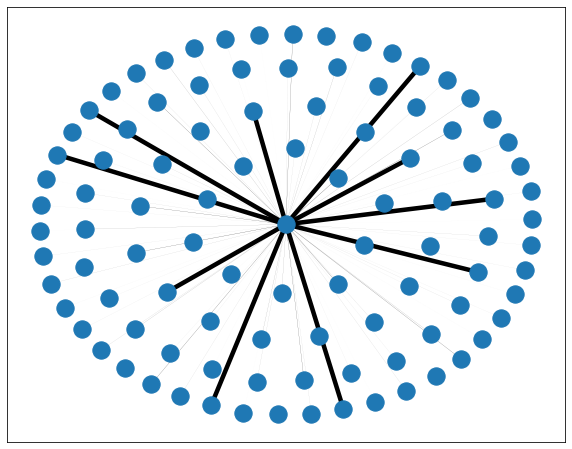

In [1272]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))

layout = nx.kamada_kawai_layout(G,weight='weight',scale=0.5)

nx.draw_networkx_nodes(G, 
                       layout)
nx.draw_networkx_edges(G, layout,  width=df_2_or['hi-c-rao'].head(10)*.001)
#nx.draw_networkx_edges(G, layout,  width=df_2_or['exp'].head(10)*.01)
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in G.edges(data=True)])

In [1177]:
df_2_or = df_2_or[df_2_or['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization

In [1179]:
df_2_or = df_2_or[df_2_or['hi-c-rao']<=0]

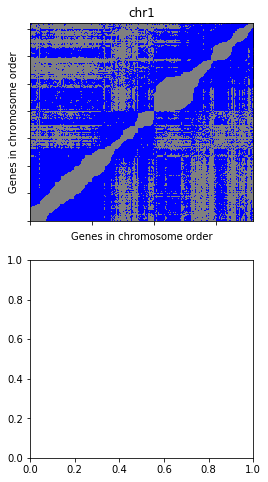

In [1164]:
plots_with_1_level_3d(df_2_or, 'hi-c-rao')

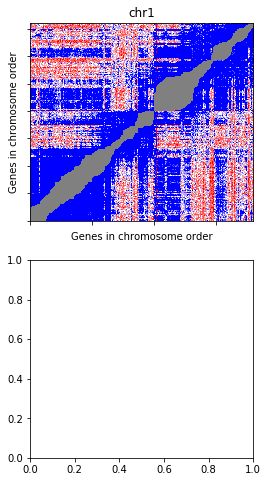

In [1152]:
plots_with_1_level_3d(df_2_or, 'hi-c-rao')

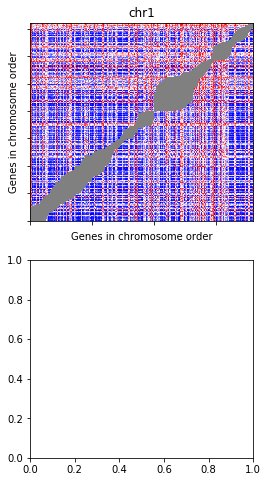

In [1178]:
plots_with_1_level_3d(df_2_or, 'exp')

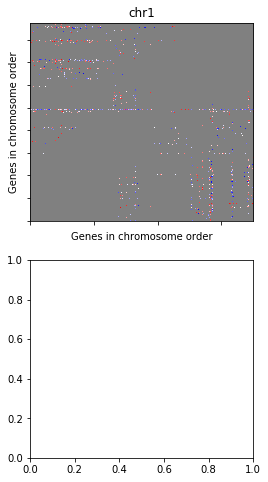

In [1180]:
plots_with_1_level_3d(df_2_or, 'exp')

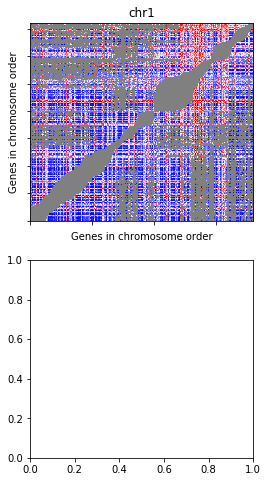

In [1165]:
plots_with_1_level_3d(df_2_or, 'exp')

0.0
gene_order_tss_y
6       130.0
9       130.0
11      164.0
12      164.0
14      164.0
        ...  
3345    202.0
3347    235.0
3348    235.0
3349    235.0
3355    242.0
Length: 1004, dtype: float64


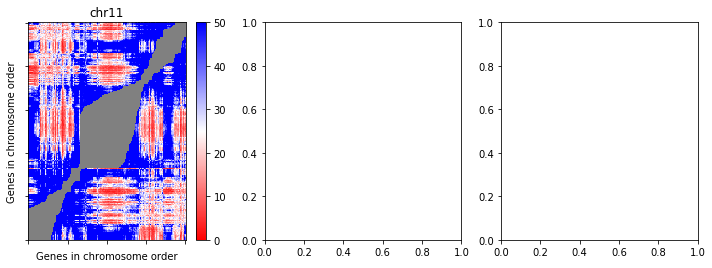

In [471]:
plots_with_1_level_3d(df_2_or, 'hi-c-rao')

0.0
gene_order_tss_y
6       18171.0
9       18171.0
11      14490.0
12      14490.0
14      14490.0
         ...   
3345     6781.0
3347     6746.0
3348     6746.0
3349     6746.0
3355     5279.0
Length: 1004, dtype: float64


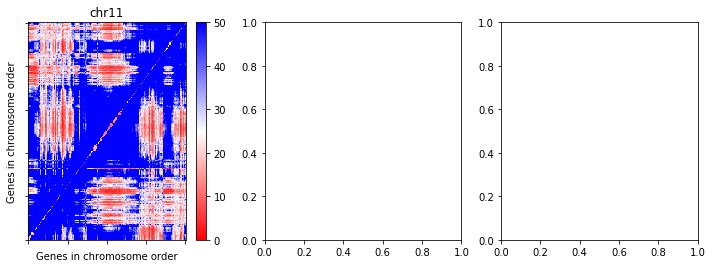

In [190]:
plots_with_1_level_3d(df_2_or, 'hi-c-rao')

0.0
gene_order_tss_y
6       0.999614
9       0.999614
11      0.999614
12      0.999614
14      0.999614
          ...   
3345    0.999614
3347    0.999614
3348    0.999614
3349    0.999614
3355    0.999614
Length: 1296, dtype: float64


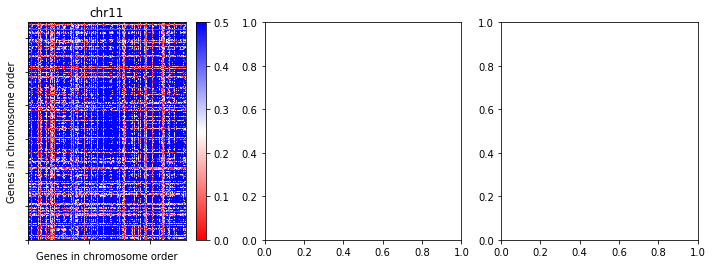

In [287]:
ranked_matirx = rank(df_2_or['exp'])
df_2_or['exp'] = ranked_matirx
plots_with_1_level_3d(df_2_or,'exp')

0.0
gene_order_tss_y
6       0.999614
9       0.999614
11      0.999614
12      0.999614
14      0.999614
          ...   
3345    0.999614
3347    0.999614
3348    0.999614
3349    0.999614
3355    0.999614
Length: 1296, dtype: float64


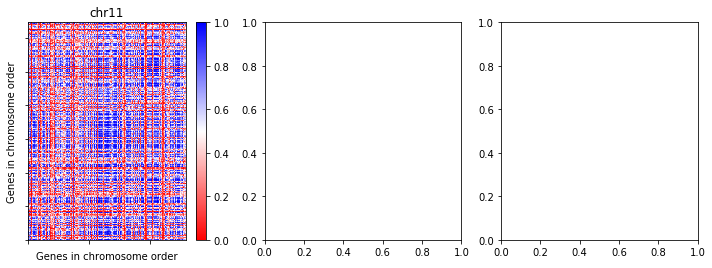

In [291]:
ranked_matirx = rank(df_2_or['exp'])
df_2_or['exp'] = ranked_matirx
plots_with_1_level_3d(df_2_or,'exp')

In [192]:
ranked_matirx = rank(df_2_or['exp'])
df_2_or['exp'] = ranked_matirx
plots_with_1_level_3d(df_2_or,'exp')

NameError: name 'rank' is not defined

0.0
gene_order_tss_y
6       0.883556
9       0.883556
11      0.883556
12      0.883556
14      0.883556
          ...   
3345    0.943445
3347    0.943445
3348    0.943445
3349    0.943445
3355    0.943445
Length: 1293, dtype: float64


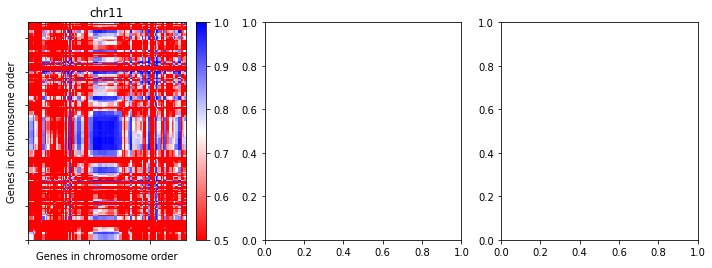

In [592]:
ranked_matirx = rank(df_2_or['exp_median'])
df_2_or['exp_median'] = ranked_matirx
plots_with_1_level_3d(df_2_or,'exp_median')

In [608]:
df_2_or_median = df_2_or

In [862]:
df_2_or = pd.read_csv('/data/lohia/gene_distance_expresseion/gene_contact_map_rao/processed_hi_c_files_one_buffer/chr10_tss_tss_1000.csv')

In [875]:
df_2_or = pd.read_csv('/data/lohia/gene_distance_expresseion/gene_contact_map_rao/processed_hi_c_files_one_buffer_manulal_resolution/chr10_tss_tss_10.csv')

In [819]:
df_2_or

ENSG00000173876  ENSG00000015171  ENSG00000151240  \
Gene stable ID                                                       
ENSG00000173876                0                1               36   
ENSG00000015171                1                0               39   
ENSG00000151240               36               39                0   
ENSG00000201861               80                1               48   
ENSG00000263511               37               40                1   
...                          ...              ...              ...   
ENSG00000254536                3                2                1   
ENSG00000214279                3                2                1   
ENSG00000130649                5                3                2   
ENSG00000171772                6                4                2   
ENSG00000225899                6                4                2   

                 ENSG00000201861  ENSG00000263511  ENSG00000180525  \
Gene stable ID                                                       
ENSG00000173876               80               37               37   
ENSG00000015171                1               40               40   
ENSG00000151240               48                1                1   
ENSG00000201861                0               51               49   
ENSG00000263511               51                0                1   
...                          ...              ...              ...   
ENSG00000254536                1                1                1   
ENSG00000214279                2                1                1   
ENSG00000130649                2                2                2   
ENSG00000171772                2                2                2   
ENSG00000225899                2                2                2   

                 ENSG00000107929  ENSG00000107937  ENSG00000148377  \
Gene stable ID                                                       
ENSG00000173876               22               19               18   
ENSG00000015171               26               25               24   
ENSG00000151240               45               38               38   
ENSG00000201861               28               26               25   
ENSG00000263511               38               35               35   
...                          ...              ...              ...   
ENSG00000254536                1                1                1   
ENSG00000214279                1                1                1   
ENSG00000130649                1                1                1   
ENSG00000171772                1                1                1   
ENSG00000225899                1                1                1   

                 ENSG00000067064  ...  ENSG00000127884  ENSG00000265395  \
Gene stable ID                    ...                                     
ENSG00000173876               18  ...                3                3   
ENSG00000015171               22  ...                2                2   
ENSG00000151240               39  ...                1                1   
ENSG00000201861               24  ...                1                1   
ENSG00000263511               36  ...                1                1   
...                          ...  ...              ...              ...   
ENSG00000254536                1  ...                1                1   
ENSG00000214279                1  ...                1                1   
ENSG00000130649                1  ...                1                1   
ENSG00000171772                1  ...              100              100   
ENSG00000225899                1  ...               71               71   

                 ENSG00000148832  ENSG00000203772  ENSG00000148824  \
Gene stable ID                                                       
ENSG00000173876                3                3                3   
ENSG00000015171                2                2                2   
ENSG00000151240             

In [877]:
df_2_or.set_index('Gene stable ID', inplace=True)

In [815]:
ranked_matirx = rank(df_2_or['exp'])
df_2_or['exp'] = ranked_matirx

KeyError: 'exp'

(0, 20)

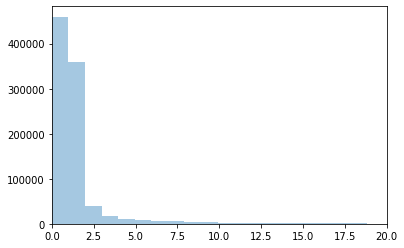

In [878]:
import seaborn as sns
ax = sns.distplot(df_2_or, bins=101, hist=True, kde=False, hist_kws={"range":(0, 100)})
ax.set_xlim(0, 20)

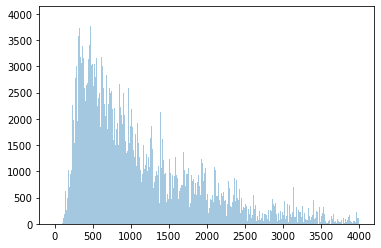

In [861]:
import seaborn as sns
ax = sns.distplot(df_2_or, bins=1001, hist=True, kde=False, hist_kws={"range":(0, 4000)})
#ax.set_xlim(0, 10)
#ax.set_xlim(0, 1)

In [ ]:
# import numpy as np
import pandas as pd
import warnings
from lohia_utilities.calculate_auc import *
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from lohia_utilities.create_corr_network import rank

def calc_auc_hic(resoulution_in_kb, case='simple', dist_tp='exp', prediction='hi-c-rao'):

    df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/17_dist_with_georg_hic_sub_median_hic_%s.h5' %resoulution_in_kb)

    #df_2_or = df_2_or[df_2_or['exp_georg'] >= 0] # liming the matrix to only chosen values for rank standerization
    df_2_or = df_2_or[df_2_or['hi-c-rao'] >= 0] # liming the matrix to only chosen values for rank standerization
    df_2_or_u = df_2_or[df_2_or['Gene stable ID_x'] != df_2_or['Gene stable ID_y']]
    #ranked_matirx = rank(df_2_or['exp_georg'])
    #df_2_or['exp_georg'] = ranked_matirx
    #df_2_or.rename(columns={"exp_georg": "exp (GK)"}, inplace=True)

    ranked_matirx = rank(df_2_or['exp'])
    df_2_or['exp'] = ranked_matirx
    df_2_or['gene_freq'] = df_2_or['gene_occurence_frequency_y'] + df_2_or['gene_occurence_frequency_x']

    #ranked_matirx = rank(df_2_or['hi-c-rao'])
    #df_2_or['hi-c-rao'] = ranked_matirx
    m_l = []
    change_group_level_1 = df_2_or.groupby(['chrom_x'])
    for chrm in change_group_level_1.groups.keys():
        df = change_group_level_1.get_group(chrm)
        num_pairs = df['Gene stable ID_x'].nunique()

        prot_list_sp = np.array_split(df, num_pairs, axis=0)
        #for i in range(0,num_pairs):
        for i in range(0,10):

            long_form_top = prot_list_sp[int(i)]
            long_form_top['dist'] = long_form_top[dist_tp]
            long_form_top = long_form_top[long_form_top['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization

            long_form_top = long_form_top[long_form_top['Gene stable ID_x'] != long_form_top['Gene stable ID_y']] # remove all the self pairs from each set

            mp =  long_form_top['Gene stable ID_y'].values[0]
            #print (long_form_top.shape)
            
            exp_median = long_form_top['exp'].median()
            exp_mean = long_form_top['exp'].mean()
            exp_var = long_form_top['exp'].var()

            long_form_top = long_form_top.reset_index()
            sns.relplot(y="exp", x="hi-c-rao", kind="line", data=long_form_top, ci='sd');
            if exp_median >=0:
        
           

                for dist_thresh in [0,1,10,100]:
                #for dist_thresh in [0.5,0.8]:
                #for dist_thresh in [100000,1000000,10000000,100000000]:
                #for dist_thresh in [4000]:
                #for dist_thresh in [df_2_or_u["hi-c-rao"].min(), df_2_or["hi-c-rao"].max()-1, df_2_or["hi-c-rao"].mean(), df_2_or["hi-c-rao"].median()]:
                    if case == 'simple':
                        long_form_top["True_sim"] = [1 if score > dist_thresh else 0 for score in long_form_top["dist"]]
                    elif case == 'tp':
                    
                        long_form_top = long_form_top.sort_values(by=['dist'], ascending=False) 
                        long_form_top["True_sim"] = [0 if score > dist_thresh else 0 for score in long_form_top["dist"]]  
                        for ind_val in long_form_top.index.values[0:dist_thresh]:
                            long_form_top.at[ind_val, 'True_sim'] = 1
                    else:    
                        long_form_top = long_form_top.sort_values(by=['dist'], ascending=True) 
                        long_form_top["True_sim"] = [1 if score > dist_thresh else 1 for score in long_form_top["dist"]]  
                        for ind_val in long_form_top.index.values[0:dist_thresh]:
                            long_form_top.at[ind_val, 'True_sim'] = 0
                    #
                    #long_form_top["True_sim"] = [1 if score <= dist_thresh else 0 for score in long_form_top["dist"]] 
                    #long_form_top["True_sim"] = [1 if score >= dist_thresh else 1 if score2 <= 1000 else 0 for score, score2 in zip(long_form_top["dist"],long_form_top["tss_tss"])]    
                    long_form_top["true_pos"] = [score for score in long_form_top["True_sim"]]
                    long_form_top["true_neg"] = [1 if score==0 else 0 for score in long_form_top["True_sim"]]
                    long_form_top["predicted_sim_from_exp"] = [score for score in long_form_top[prediction]]
                    ca = calc_auroc (long_form_top,predicted_score='predicted_sim_from_exp')
                    m_curve = calc_auc_curve (long_form_top,predicted_score='predicted_sim_from_exp')
                    pr_curve = prec_recall (long_form_top,predicted_score='predicted_sim_from_exp')

                    tpd = pd.DataFrame(m_curve)
                    if m_curve:
                        tpd[0] =  tpd[0].astype(float).round(2)
                        tpd = tpd.groupby([0]).mean()
                        m_curve  = dict(zip(tpd.index, tpd[1]))
                    else:
                        m_curve  = {}
                    tpd = pd.DataFrame(pr_curve)
                    if pr_curve:
                        tpd[0] =  tpd[0].astype(float).round(2)
                        tpd = tpd.groupby([0]).mean()
                        pr_curve  = dict(zip(tpd.index, tpd[1]))
                    else:
                        pr_curve  = {}
                    m_l.append((chrm, num_pairs,dist_thresh, ca, m_curve, pr_curve, long_form_top["true_pos"].sum(), long_form_top["true_neg"].sum(), exp_median, exp_mean, exp_var, mp))
            else:
                pass

    df_scores = pd.DataFrame(m_l, columns =['chrm', 'num_pairs','dist_thresh',  'auc', 'plot', 'pr_curve', 'true_pos', 'true_neg', 'exp_median', 'exp_mean', 'exp_var', 'Gene stable ID'])
    df_scores.to_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_%s_%s_%s.h5' %(resoulution_in_kb, case, dist_tp), key='df', mode='w')    
    return df_scores

In [1281]:
df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/1_dist_with_georg_hic_sub_median_hic_50.h5')
df_2_or = df_2_or[df_2_or['hi-c-rao'] >= 0] 
df_2_or = df_2_or[df_2_or['Gene stable ID_x'] != df_2_or['Gene stable ID_y']]
ranked_matirx = rank(df_2_or['exp'])
df_2_or['exp'] = ranked_matirx
df_2_or['gene_freq'] = df_2_or['gene_occurence_frequency_y'] + df_2_or['gene_occurence_frequency_x']
df_2_or = df_2_or[df_2_or['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization

In [1285]:
df_2_or = df_2_or[df_2_or['Gene type_x'] != df_2_or['Gene type_x']]

In [1278]:
df_2_or = df_2_or[df_2_or['strand_y'] == 'protein_coding']

In [1109]:
df_2_or[df_2_or['hi-c-rao']<2].shape[0] / df_2_or.shape[0]

0.10454046487339219

In [1114]:
df_2_or[(df_2_or['hi-c-rao']>3) & (df_2_or['hi-c-rao']<15)].shape[0] / df_2_or.shape[0]

0.5222033571607262

(0, 20000)

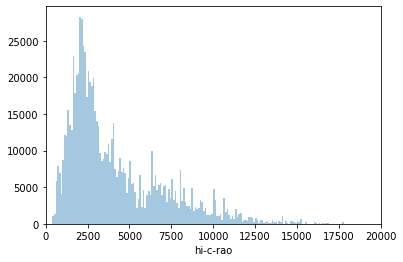

In [856]:
import seaborn as sns
ax = sns.distplot(df_2_or['hi-c-rao'], bins=1000, hist=True, kde=False, hist_kws={"range":(1, 100000)})
ax.set_xlim(0, 20000)
#ax.set_xlim(0, 10)

(0, 15)

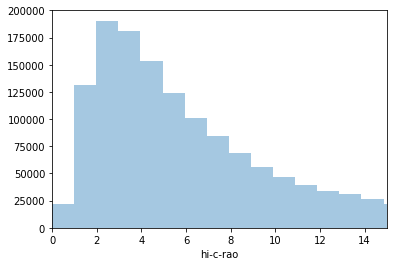

In [1283]:
import seaborn as sns
ax = sns.distplot(df_2_or['hi-c-rao'], bins=101, hist=True, kde=False, hist_kws={"range":(0, 100)})
ax.set_xlim(0, 15)
#ax.set_ylim(0, 20000)

Text(0, 0.5, 'AUC')

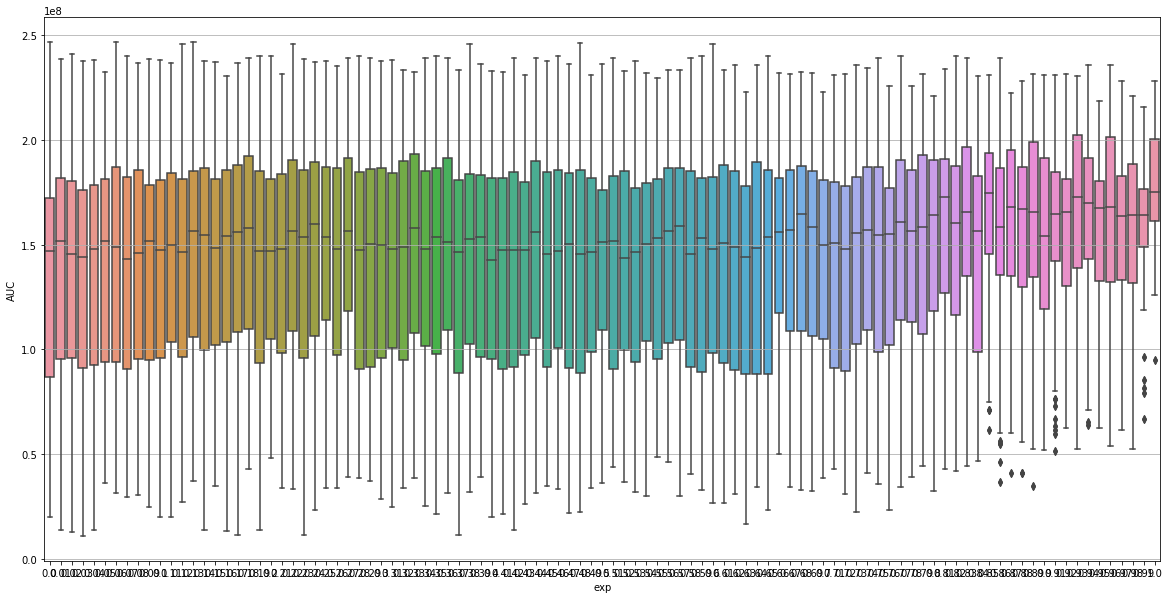

In [1171]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#p = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='tss_tss', x='exp', 
                 data=df_2_or[df_2_or['hi-c-rao']<=0] 
                 #,palette="colorblind"
                 #,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
#axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

Text(0, 0.5, 'AUC')

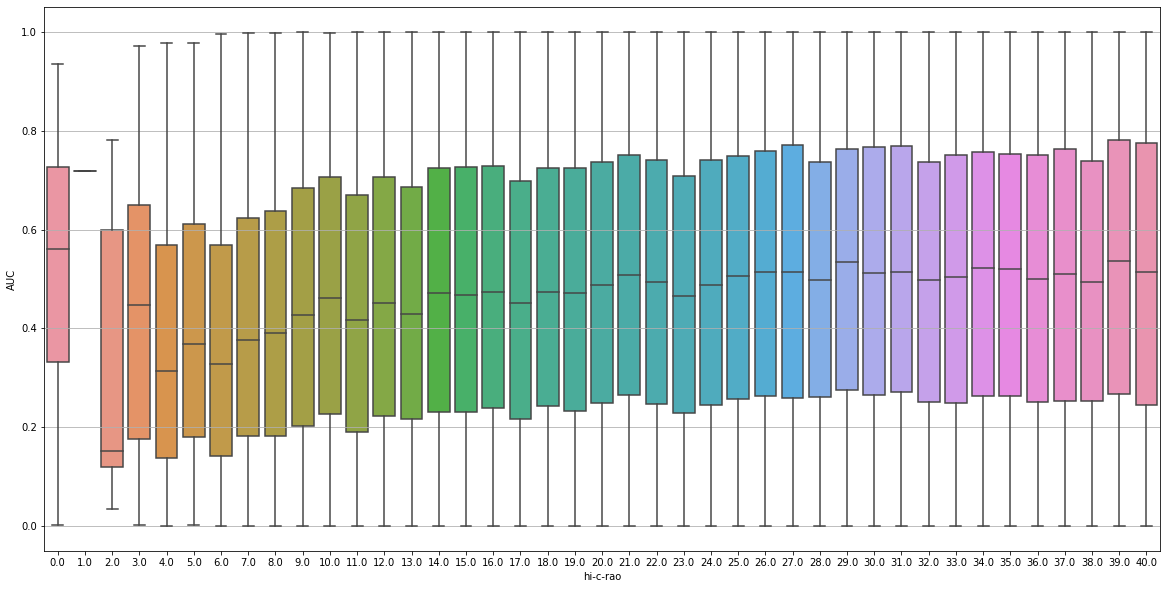

In [1143]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#p = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='exp', x='hi-c-rao', 
                 data=df_2_or[df_2_or['hi-c-rao']<=40] 
                 #,palette="colorblind"
                 #,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
#axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

In [1170]:
df_2_or['exp'] = df_2_or['exp'].round(2)

In [1057]:
df_2_or['tss_tss'] = df_2_or['tss_tss'].round(2)

In [1056]:
df_2_or['tss_tss'] = df_2_or['tss_tss']/df_2_or['tss_tss'].max()

Text(0, 0.5, 'AUC')

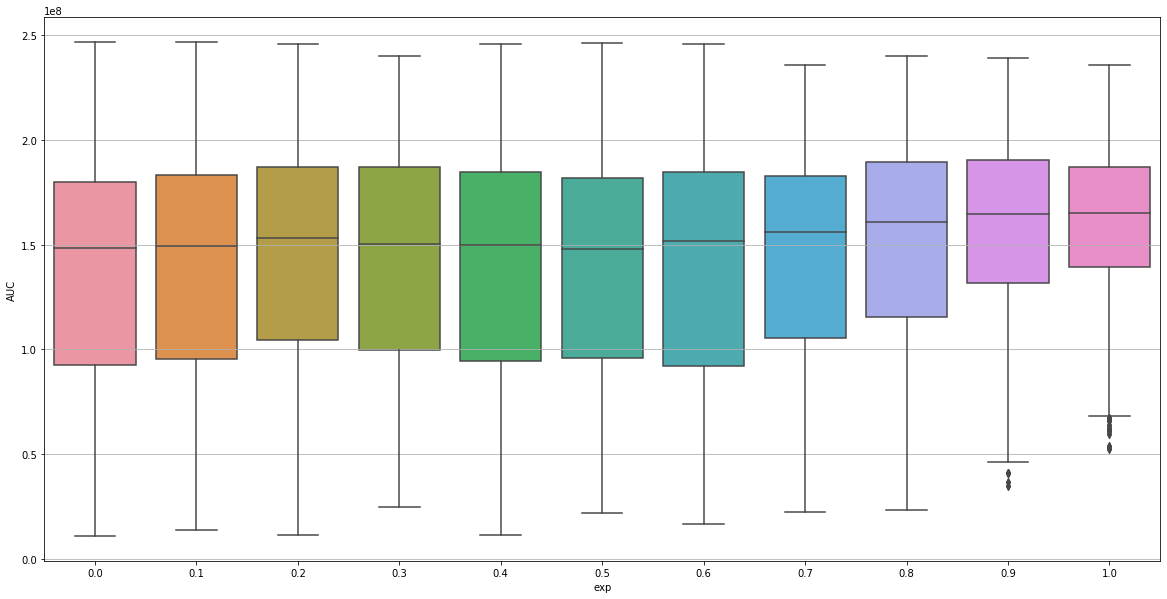

In [1020]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#p = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(x='exp', y='tss_tss', 
                 data=df_2_or[df_2_or['hi-c-rao']<=0] 
                 #,palette="colorblind"
                 #,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
#axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

In [1006]:
df_2_or

tss_tss       exp  exp_georg  hi-c-rao  hi-c-rao-common_elements  \
1         72050381  0.122194        NaN       3.0                       3.0   
2         16027556  0.178424        NaN      20.0                       4.0   
3         77436353  0.061727        NaN       1.0                       3.0   
4        117251428  0.056937        NaN       1.0                       3.0   
5         72758307  0.196935        NaN       1.0                       2.0   
...            ...       ...        ...       ...                       ...   
3261627   69438229  0.806037        NaN       8.0                       4.0   
3261631  111087060  0.277369        NaN       6.0                       3.0   
3261632   91258483  0.779141        NaN       2.0                       4.0   
3261633   66060614  0.526012        NaN       3.0                       4.0   
3261634   59544041  0.116555        NaN       3.0                       3.0   

           tes_tes strand_x  gene_order_tss_x  gene_order_tes_x  \
1         72322032        -              3445              3445   
2         15874301        -              1947              1945   
3         77163358        -               247               247   
4        117463736        -              4361              4360   
5         73049950        +              3487              3487   
...            ...      ...               ...               ...   
3261627   69701689        +              3760              3766   
3261631  110988571        -              4540              4539   
3261632   91223771        +              4204              4204   
3261633   65973702        -              3680              3679   
3261634   59602279        +              1159              1160   

        Gene stable ID_x  ... gene_order_tss_y gene_order_tes_y  \
1        ENSG00000143622  ...             2135             2134   
2        ENSG00000172380  ...             2135             2134   
3        ENSG00000069812  ...             2135             2134   
4        ENSG00000081248  ...             2135             2134   
5        ENSG00000132702  ...             2135             2134   
...                  ...  ...              ...              ...   
3261627  ENSG00000185630  ...             2360             2363   
3261631  ENSG00000196550  ...             2360             2363   
3261632  ENSG00000157181  ...             2360             2363   
3261633  ENSG00000158850  ...             2360             2363   
3261634  ENSG00000116819  ...             2360             2363   

         Gene stable ID_y     Gene type_y Uniprot_dc_y  dc_y seq_length_y  \
1         ENSG00000233008             NaN          NaN   NaN          NaN   
2         ENSG00000233008             NaN          NaN   NaN          NaN   
3         ENSG00000233008             NaN          NaN   NaN          NaN   
4         ENSG00000233008             NaN          NaN   NaN          NaN   
5         ENSG00000233008             NaN          NaN   NaN          NaN   
...                   ...             ...          ...   ...          ...   
3261627   ENSG00000152078  protein_coding       Q96MV1   0.0        263.0   
3261631   ENSG00000152078  protein_coding       Q96MV1   0.0        263.0   
3261632   ENSG00000152078  protein_coding       Q96MV1   0.0        263.0   
3261633   ENSG00000152078  protein_coding       Q96MV1   0.0        263.0   
3261634   ENSG00000152078  protein_coding       Q96MV1   0.0        263.0   

         chrom_y  gene_occurence_frequency_y gene_freq  
1           chr1                        7321     15163  
2           chr1                        7321     15836  
3           chr1                        7321     15498  
4           chr1                        7321     15825  
5           chr1                        7321     15631  
...          ...                         ...       ...  
3261627     chr1                        8386     16750  
3261631     chr1                        8386     16032  
3261632     ch

In [1003]:
df_2_or.columns

Index(['tss_tss', 'exp', 'exp_georg', 'hi-c-rao', 'hi-c-rao-common_elements',
       'tes_tes', 'strand_x', 'gene_order_tss_x', 'gene_order_tes_x',
       'Gene stable ID_x', 'Gene type_x', 'Uniprot_dc_x', 'dc_x',
       'seq_length_x', 'chrom_x', 'gene_occurence_frequency_x', 'strand_y',
       'gene_order_tss_y', 'gene_order_tes_y', 'Gene stable ID_y',
       'Gene type_y', 'Uniprot_dc_y', 'dc_y', 'seq_length_y', 'chrom_y',
       'gene_occurence_frequency_y', 'gene_freq'],
      dtype='object')

In [1037]:
sns.scatterplot(data=df_2_or[df_2_or['hi-c-rao']<=0 ], x='exp', y='tss_tss')

AttributeError: module 'seaborn' has no attribute 'plt'

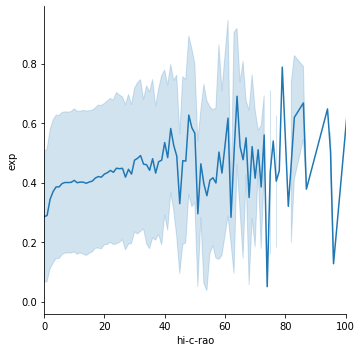

In [1286]:
ax = sns.relplot(y="exp", x="hi-c-rao", kind="line", data=df_2_or, ci='sd');
ax.set(xlim=(0, 100))

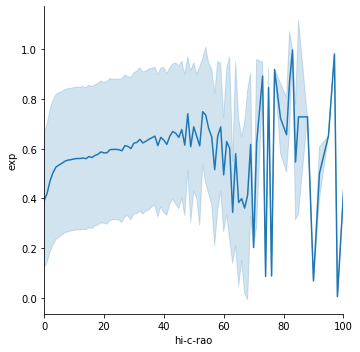

In [1280]:
ax = sns.relplot(y="exp", x="hi-c-rao", kind="line", data=df_2_or, ci='sd');
ax.set(xlim=(0, 100))

KeyboardInterrupt: 

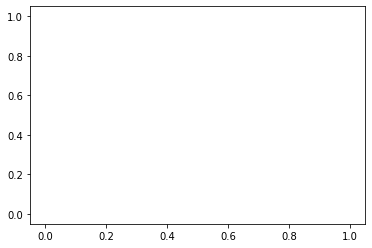

In [1039]:
ax = sns.lineplot(x="tss_tss", y="exp", data=df_2_or);
#ax.set(xlim=(0, 100))

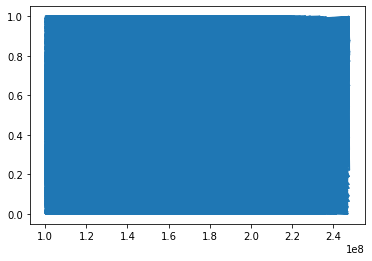

In [1041]:
plt.plot(df_2_or["tss_tss"],df_2_or["exp"])

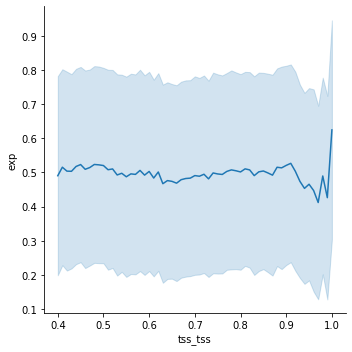

In [1049]:
ax = sns.relplot(y="exp", x="tss_tss", kind="line", data=df_2_or, ci='sd');
#ax.set(xlim=(0, 100))

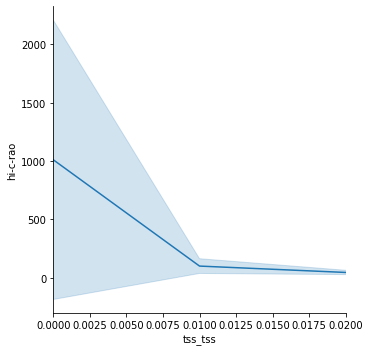

In [1060]:
ax = sns.relplot(y="hi-c-rao", x="tss_tss", kind="line", data=df_2_or, ci='sd');
ax.set(xlim=(0, 0.02))

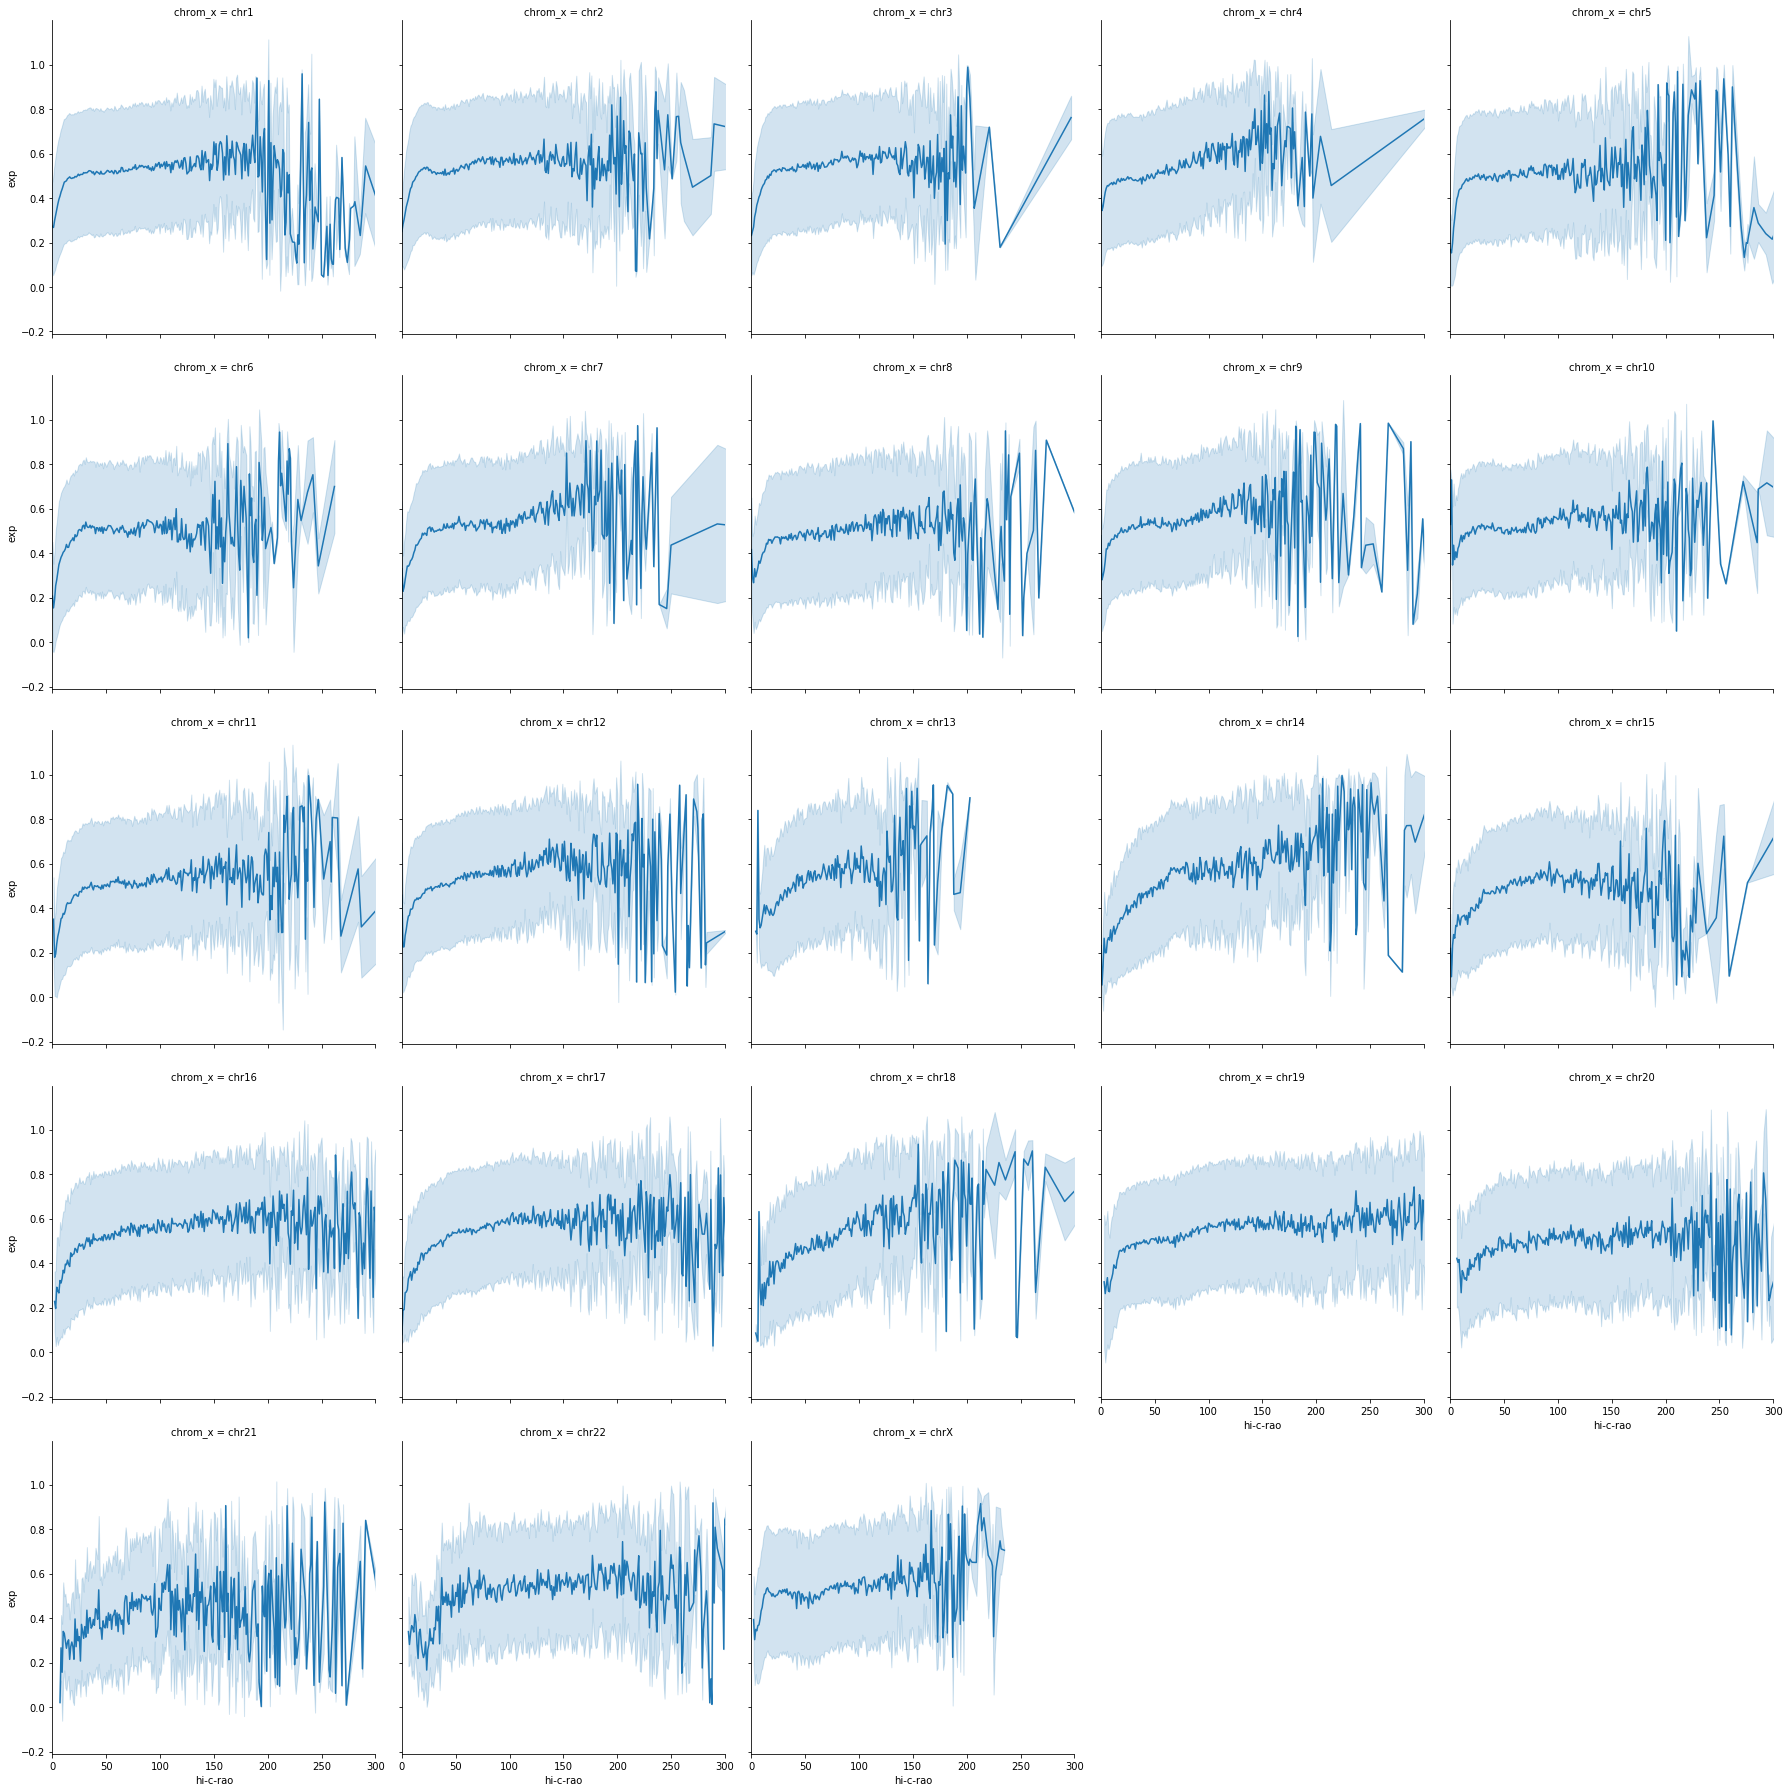

In [774]:
ax = sns.relplot(y="exp", x="hi-c-rao", kind="line", data=df_2_or, ci='sd',col="chrom_x", col_wrap=5);
ax.set(xlim=(0, 300))

In [ ]:
import seaborn as sns
ax = sns.distplot(df_2_or['hi-c-rao'], bins=100, hist=True, kde=False, hist_kws={"range":(1, 300)})
#ax.set_xlim(0, 500)
#ax.set_xlim(0, 50)

In [776]:
df_2_or.set_index(['Gene stable ID_x'], inplace=True)

In [777]:
df_scores = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_%s_%s_%s_%s.h5' %(100, 'tn', 'hi-c-rao','exp'))

In [778]:
df_scores.set_index(['Gene stable ID'], inplace=True)

In [779]:
df_2_or =  df_2_or.join(df_scores[['auc']], how='left')    #merging on the index of the two dataframe

In [781]:
df_2_or.reset_index(inplace=True)

In [792]:
df_2_or_p=df_2_or[df_2_or['auc'] <0.3]

In [785]:
df_2_or_p['index']

2127       ENSG00000002919
3528       ENSG00000002919
3531       ENSG00000002919
3534       ENSG00000002919
3537       ENSG00000002919
                ...       
2249259    ENSG00000271605
2249262    ENSG00000271605
2249265    ENSG00000271605
2249661    ENSG00000271605
2250909    ENSG00000271605
Name: index, Length: 407403, dtype: object

In [783]:
df_2_or_p.sort_values(by=['index'],inplace=True).head(1000)

AttributeError: 'NoneType' object has no attribute 'head'

In [616]:
df_2_or['gene_len'] = abs(df_2_or['tss_tss'] - df_2_or['tes_tes'])

In [706]:
df_2_or_p.reset_index(inplace=True)

In [788]:
df_2_or_p

index   tss_tss       exp  exp_georg  hi-c-rao  \
2127     ENSG00000002919  26363042  0.755927   0.687850      76.0   
3528     ENSG00000002919  31664590  0.742490        NaN      36.0   
3531     ENSG00000002919  39984309  0.153997        NaN      53.0   
3534     ENSG00000002919  33788230  0.926757   0.276618      45.0   
3537     ENSG00000002919  40064323  0.423555        NaN      39.0   
...                  ...       ...       ...        ...       ...   
2249259  ENSG00000271605  17525962  0.572308        NaN      74.0   
2249262  ENSG00000271605  56446443  0.268160        NaN      49.0   
2249265  ENSG00000271605  52850567  0.063841        NaN      13.0   
2249661  ENSG00000271605  55483324  0.806578        NaN      40.0   
2250909  ENSG00000271605  57892481  0.212853        NaN      34.0   

         hi-c-rao-common_elements   tes_tes strand_x  gene_order_tss_x  \
2127                          4.0  26361720        +              1964   
3528                          4.0  31644396        +              1964   
3531                          4.0  40027175        +              1964   
3534                          4.0  33764760        +              1964   
3537                          4.0  40073940        +              1964   
...                           ...       ...      ...               ...   
2249259                       4.0  17493119        +              2444   
2249262                       4.0  56448304        +              2444   
2249265                       4.0  52498895        +              2444   
2249661                       4.0  55589733        +              2444   
2250909                       4.0  58017381        +              2444   

         gene_order_tes_x  ... gene_order_tes_y Gene stable ID_y  \
2127                 1964  ...             2646  ENSG00000167851   
3528                 1964  ...              608  ENSG00000175061   
3531                 1964  ...              394  ENSG00000179148   
3534                 1964  ...             2977  ENSG00000183684   
3537                 1964  ...              388  ENSG00000179593   
...                   ...  ...              ...              ...   
2249259              2444  ...             1913  ENSG00000108433   
2249262              2444  ...              387  ENSG00000132518   
2249265              2444  ...              496  ENSG00000007174   
2249661              2444  ...              434  ENSG00000141506   
2250909              2444  ...              262  ENSG00000091622   

            Gene type_y  Uniprot_dc_y      dc_y  seq_length_y chrom_y  \
2127     protein_coding        Q9UGN4  0.073579         299.0   chr17   
3528                NaN           NaN       NaN           NaN   chr17   
3531     protein_coding        J3KPH2  0.113033         867.0   chr17   
3534     protein_coding        E9PB61  0.621212         264.0   chr17   
3537     protein_coding        O15296  0.000000         676.0   chr17   
...                 ...           ...       ...           ...     ...   
2249259  protein_coding        I3NI02  0.077821         257.0   chr17   
2249262  protein_coding        Q02846  0.035358        1103.0   chr17   
2249265  protein_coding        Q9NYC9  0.000000        4486.0   chr17   
2249661  protein_coding        Q8WYR1  0.167045         880.0   chr17   
2250909  protein_coding        Q9BZ71  0.142710         974.0   chr17   

         gene_occurence_frequency_y  gene_freq       auc  
2127                           1562       3122  0.973126  
3528                           1563       3123  0.973126  
3531                           1562       3122  0.973126  
3534                           1562       3122  0.973126  
3537                           1562       3122  0.973126  
...                             ...        ...       ...  
2249259                        1561       3120  0.986747  
2249262                        1562       3121  0.986747  
2249265                        1558       3117  0.986747  
2249661          

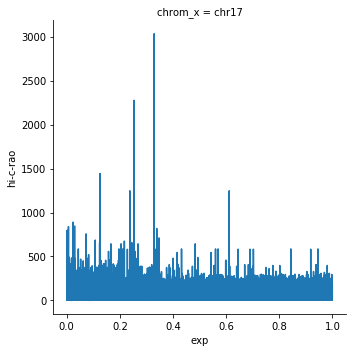

In [662]:
#g = sns.FacetGrid(df_2_or, col="chrom_x")
sns.relplot(x="exp", y="hi-c-rao", kind="line", data=df_2_or, ci=None, col="chrom_x")

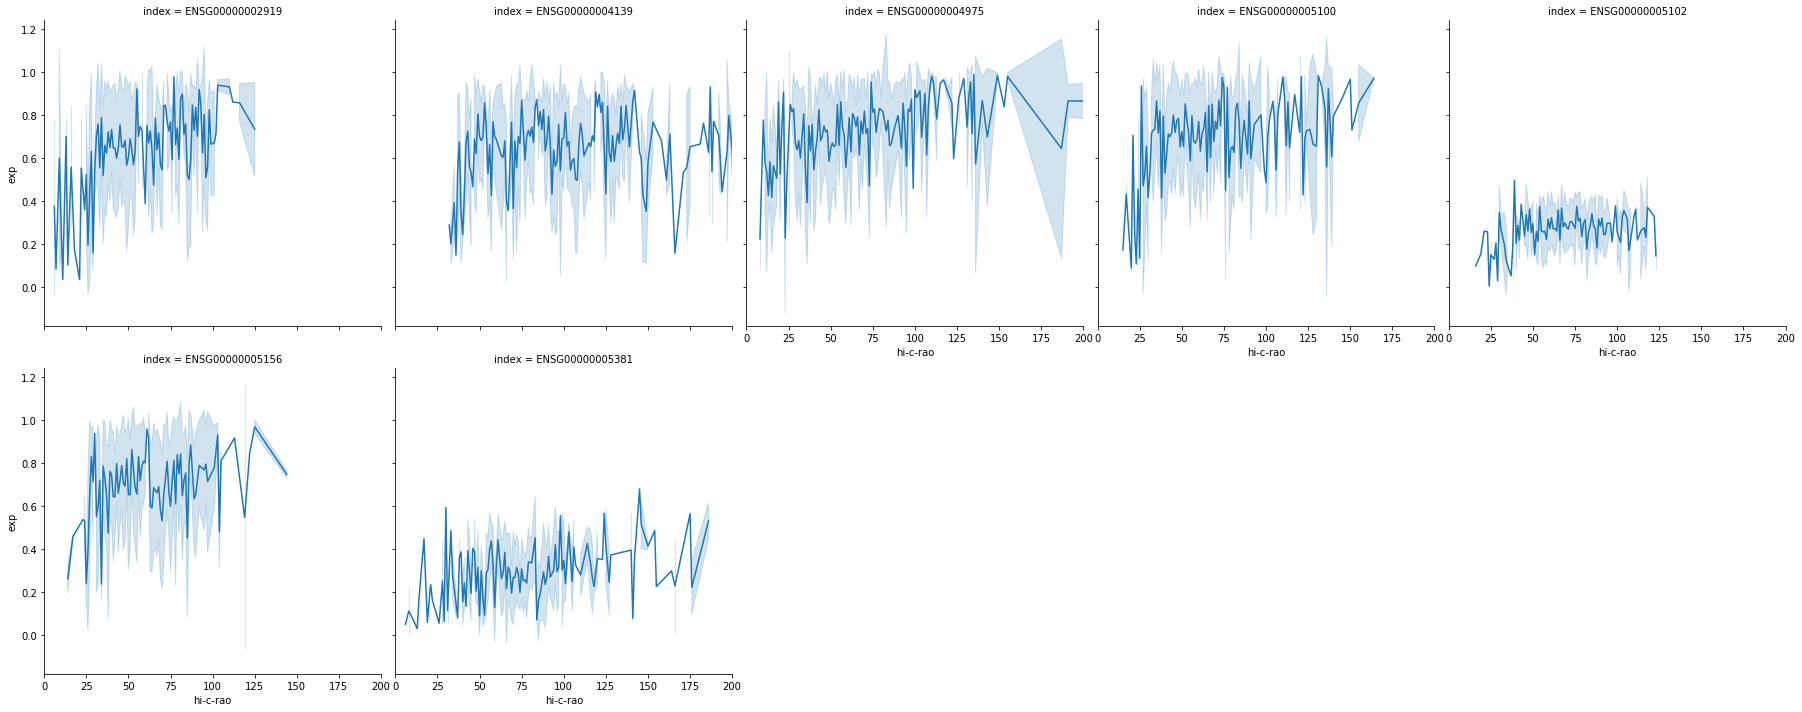

In [791]:
ax = sns.relplot(y="exp", x="hi-c-rao", kind="line", data=df_2_or_p.head(5000), ci='sd',col="index", col_wrap=5);
ax.set(xlim=(0, 200))

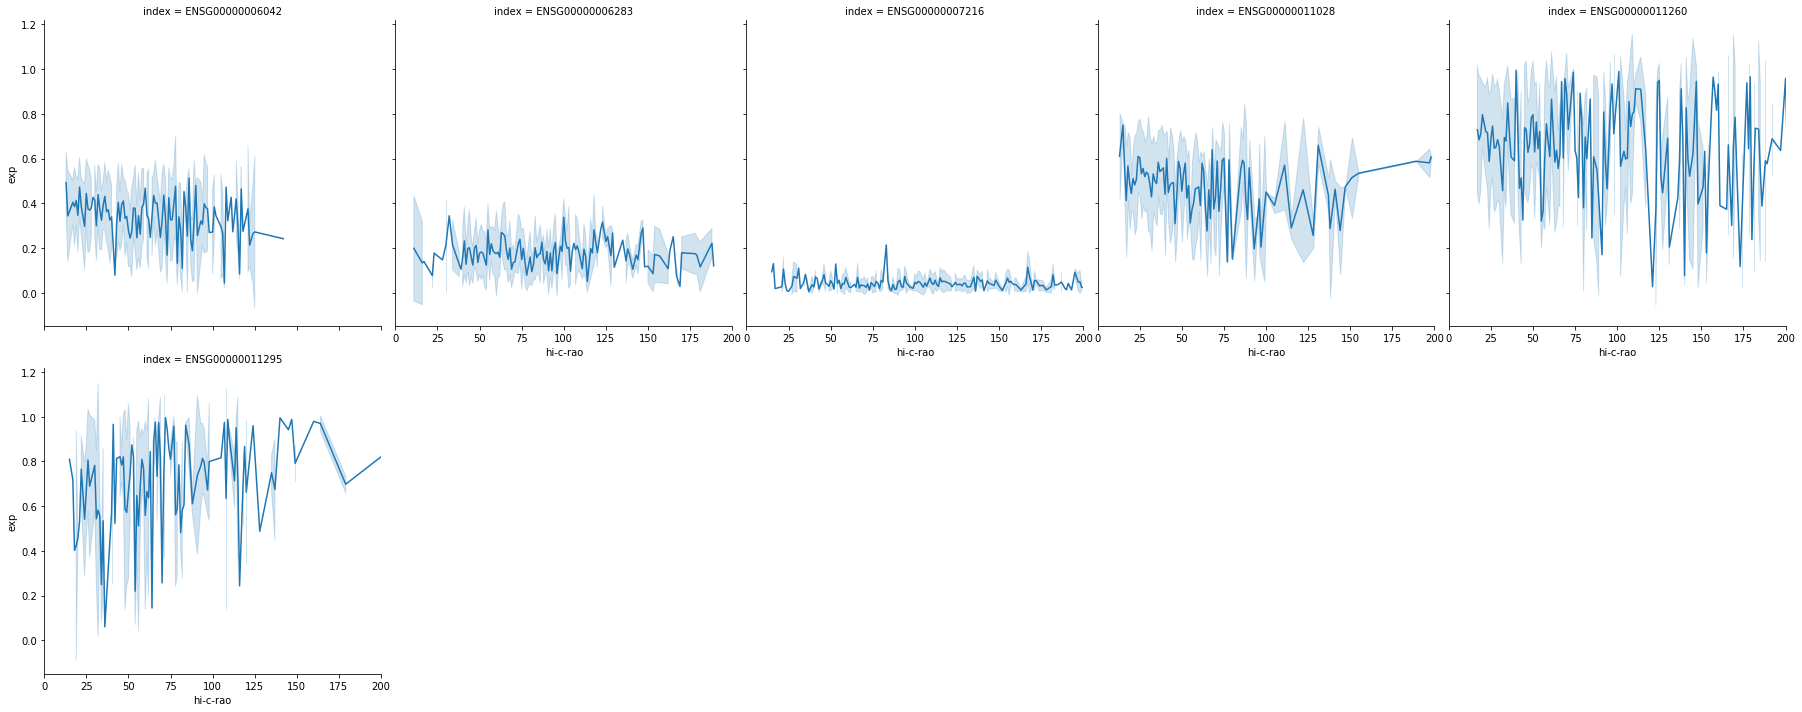

In [793]:
ax = sns.relplot(y="exp", x="hi-c-rao", kind="line", data=df_2_or_p.head(5000), ci='sd',col="index", col_wrap=5);
ax.set(xlim=(0, 200))

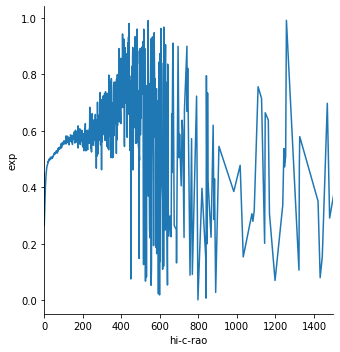

In [651]:
ax = sns.relplot(y="exp", x="hi-c-rao", kind="line", data=df_2_or, ci=None);
ax.set(xlim=(0, 1500))

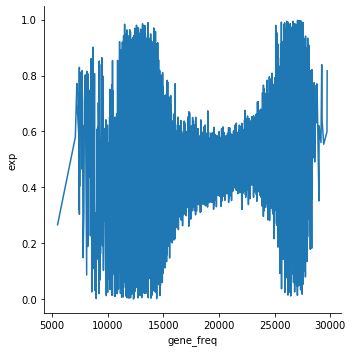

In [509]:
import seaborn as sns
#sns.set_theme(style="darkgrid")
sns.relplot(x="gene_freq", y="exp", kind="line", data=df_2_or, ci=None);

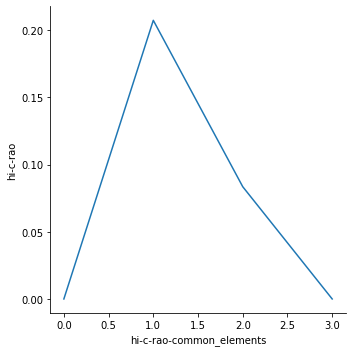

In [511]:
import seaborn as sns
#sns.set_theme(style="darkgrid")
sns.relplot(x="hi-c-rao-common_elements", y="hi-c-rao", kind="line", data=df_2_or, ci=None);

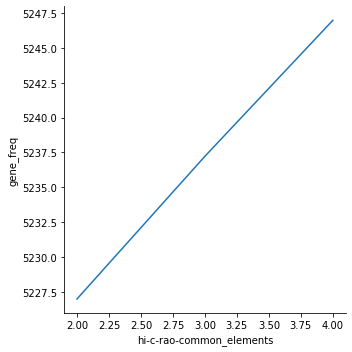

In [514]:
import seaborn as sns
#sns.set_theme(style="darkgrid")
sns.relplot(x="hi-c-rao-common_elements", y="gene_freq", kind="line", data=df_2_or, ci=None);

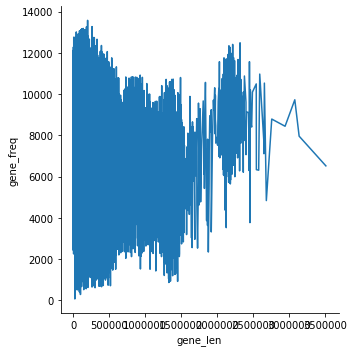

In [422]:
import seaborn as sns
#sns.set_theme(style="darkgrid")
sns.relplot(x="gene_len", y="gene_freq", kind="line", data=df_2_or, ci=None);

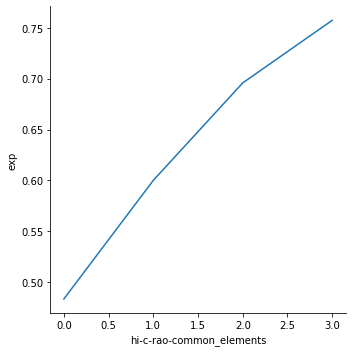

In [517]:
import seaborn as sns
#sns.set_theme(style="darkgrid")
sns.relplot(x="hi-c-rao-common_elements", y="exp", kind="line", data=df_2_or, ci=None);

(0, 500)

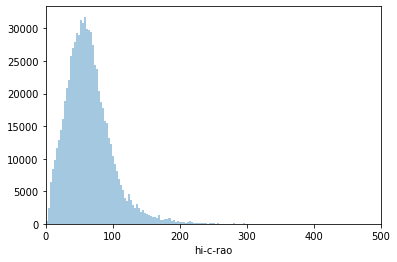

In [674]:
import seaborn as sns
ax = sns.distplot(df_2_or['hi-c-rao'], bins=100, hist=True, kde=False, hist_kws={"range":(1, 300)})
ax.set_xlim(0, 500)
#ax.set_xlim(0, 50)

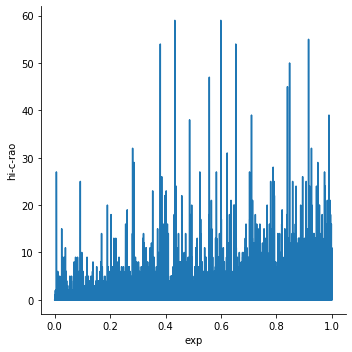

In [378]:
import seaborn as sns
#sns.set_theme(style="darkgrid")
ax = sns.relplot(x="exp", y="hi-c-rao", kind="line", data=df_2_or, ci=None);
#ax.set(xlim=(0, 4000))

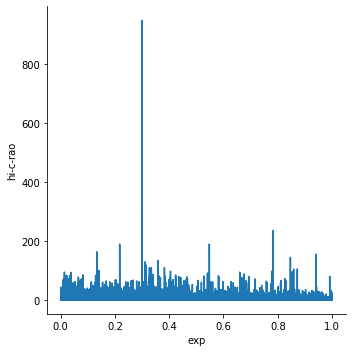

In [575]:
import seaborn as sns
#sns.set_theme(style="darkgrid")
ax = sns.relplot(x="exp", y="hi-c-rao", kind="line", data=df_2_or, ci=None);
#ax.set(xlim=(0, 0.02))

In [306]:
df_2_or.head(100)

tss_tss       exp  exp_georg  hi-c-rao strand_x  gene_order_tss_x  \
0           0  1.000000   0.851248       0.0        +              2806   
1     5904646  0.525548        NaN       0.0        -              2943   
2    50482554  0.131419        NaN       NaN        -              1517   
3    26341905  0.971394        NaN       0.0        -              2344   
4   105765008  0.316229        NaN       0.0        +               370   
..        ...       ...        ...       ...      ...               ...   
95   37036535  0.972983        NaN       0.0        +              2164   
96   21507706  0.415434        NaN       0.0        -              3328   
97   44706943  0.894939        NaN       0.0        +              1875   
98   49412048  0.818587   0.194414       0.0        -              1567   
99   37713173  0.690144        NaN       0.0        -              2136   

    gene_order_tes_x Gene stable ID_x     Gene type_x Uniprot_dc_x  ...  \
0               2810  ENSG00000150768  protein_coding       P10515  ...   
1               2943  ENSG00000137747  protein_coding       Q9BYE2  ...   
2               1518  ENSG00000256443             NaN          NaN  ...   
3               2344  ENSG00000137504  protein_coding       E9PIM0  ...   
4                370  ENSG00000110148  protein_coding       P32239  ...   
..               ...              ...             ...          ...  ...   
95              2164  ENSG00000162139  protein_coding       Q9UQ49  ...   
96              3321  ENSG00000183715  protein_coding       Q14982  ...   
97              1883  ENSG00000172613  protein_coding       Q99638  ...   
98              1565  ENSG00000149499  protein_coding       H0Y3M3  ...   
99              2133  ENSG00000149380  protein_coding       Q7Z4N8  ...   

    chrom_x  strand_y gene_order_tss_y gene_order_tes_y  Gene stable ID_y  \
0     chr11         +             2806             2810   ENSG00000150768   
1     chr11         +             2806             2810   ENSG00000150768   
2     chr11         +             2806             2810   ENSG00000150768   
3     chr11         +             2806             2810   ENSG00000150768   
4     chr11         +             2806             2810   ENSG00000150768   
..      ...       ...              ...              ...               ...   
95    chr11         +             2806             2810   ENSG00000150768   
96    chr11         +             2806             2810   ENSG00000150768   
97    chr11         +             2806             2810   ENSG00000150768   
98    chr11         +             2806             2810   ENSG00000150768   
99    chr11         +             2806             2810   ENSG00000150768   

       Gene type_y Uniprot_dc_y      dc_y seq_length_y  chrom_y  
0   protein_coding       P10515  0.142195        647.0    chr11  
1   protein_coding       P10515  0.142195        647.0    chr11  
2   protein_coding       P10515  0.142195        647.0    chr11  
3   protein_coding       P10515  0.142195        647.0    chr11  
4   protein_coding       P10515  0.142195        647.0    chr11  
..             ...          ...       ...          ...      ...  
95  protein_coding       P10515  0.142195        647.0    chr11  
96  protein_coding       P10515  0.142195        647.0    chr11  
97  protein_coding       P10515  0.142195        647.0    chr11  
98  protein_coding       P10515  0.142195        647.0    chr11  
99  protein_coding       P10515  0.142195        647.0    chr11  

[100 rows x 22 columns]

In [256]:
df_2_or

tss_tss       exp  exp_georg  hi-c-rao strand_x  gene_order_tss_x  \
0                0  0.999501   0.851248       0.0        +              2806   
1          5904646  0.390949        NaN       0.0        -              2943   
3         26341905  0.944702        NaN       0.0        -              2344   
4        105765008  0.224094        NaN       0.0        +               370   
5         46940649  0.859582        NaN       0.0        -              1719   
...            ...       ...        ...       ...      ...               ...   
1679611     949262  0.949299   0.825583       0.0        +              1656   
1679612   53896373  0.608669        NaN       0.0        -              3004   
1679613   28597041  0.464279        NaN       0.0        -              2526   
1679614     246237  0.910353   0.892779       1.0        -              1701   
1679615          0  0.999501   0.851248       0.0        -              1731   

         gene_order_tes_x Gene stable ID_x     Gene type_x Uniprot_dc_x  ...  \
0                    2810  ENSG00000150768  protein_coding       P10515  ...   
1                    2943  ENSG00000137747  protein_coding       Q9BYE2  ...   
3                    2344  ENSG00000137504  protein_coding       E9PIM0  ...   
4                     370  ENSG00000110148  protein_coding       P32239  ...   
5                    1719  ENSG00000146670  protein_coding       B5MBX0  ...   
...                   ...              ...             ...          ...  ...   
1679611              1656  ENSG00000168439  protein_coding       P31948  ...   
1679612              3003  ENSG00000137700  protein_coding       U3KQS2  ...   
1679613              2527  ENSG00000202314             NaN          NaN  ...   
1679614              1700  ENSG00000110047  protein_coding   A0A024R571  ...   
1679615              1729  ENSG00000162298  protein_coding       Q86TM6  ...   

         chrom_x  strand_y gene_order_tss_y gene_order_tes_y  \
0          chr11         +             2806             2810   
1          chr11         +             2806             2810   
3          chr11         +             2806             2810   
4          chr11         +             2806             2810   
5          chr11         +             2806             2810   
...          ...       ...              ...              ...   
1679611    chr11         -             1731             1729   
1679612    chr11         -             1731             1729   
1679613    chr11         -             1731             1729   
1679614    chr11         -             1731             1729   
1679615    chr11         -             1731             1729   

         Gene stable ID_y     Gene type_y Uniprot_dc_y      dc_y seq_length_y  \
0         ENSG00000150768  protein_coding       P10515  0.142195        647.0   
1         ENSG00000150768  protein_coding       P10515  0.142195        647.0   
3         ENSG00000150768  protein_coding       P10515  0.142195        647.0   
4         ENSG00000150768  protein_coding       P10515  0.142195        647.0   
5         ENSG00000150768  protein_coding       P10515  0.142195        647.0   
...                   ...             ...          ...       ...          ...   
1679611   ENSG00000162298  protein_coding       Q86TM6  0.296596        617.0   
1679612   ENSG00000162298  protein_coding       Q86TM6  0.296596        617.0   
1679613   ENSG00000162298  protein_coding       Q86TM6  0.296596        617.0   
1679614   ENSG00000162298  protein_coding       Q86TM6  0.296596        617.0   
1679615   ENSG00000162298  protein_coding       Q86TM6  0.296596        617.0   

         chrom_y  
0          chr11  
1          chr11  
3          chr11  
4          chr11  
5          chr11  
...          ...  
1679611    chr11  
1679612    chr11  
1679613    chr11  
1679614    chr11  
1679615    chr11  

[1008016 rows x 22 columns]

In [135]:
(df_2_or == 0).sum().sum()*100 / (df_2_or.shape[0] * df_2_or.shape[1])

98.33900502349701

In [78]:
df_2_or

Gene stable ID  ENSG00000173876  ENSG00000015171  ENSG00000151240  \
0    ENSG00000173876              0.0            127.0             32.0   
1    ENSG00000015171            127.0              0.0             32.0   
2    ENSG00000151240             32.0             32.0              0.0   
3    ENSG00000201861             62.0            114.0             43.0   
4    ENSG00000263511             35.0             35.0            233.0   
..               ...              ...              ...              ...   
963  ENSG00000254536              3.0              2.0              1.0   
964  ENSG00000214279              6.0              2.0              1.0   
965  ENSG00000130649              6.0              2.0              1.0   
966  ENSG00000171772              7.0              2.0              3.0   
967  ENSG00000225899             11.0              6.0              3.0   

     ENSG00000201861  ENSG00000263511  ENSG00000180525  ENSG00000107929  \
0               62.0             35.0             34.0             17.0   
1              114.0             35.0             37.0             31.0   
2               43.0            233.0            262.0             42.0   
3                0.0             49.0             49.0             26.0   
4               49.0              0.0              1.0             40.0   
..               ...              ...              ...              ...   
963              0.0              1.0              1.0              2.0   
964              1.0              2.0              2.0              0.0   
965              2.0              1.0              2.0              1.0   
966              2.0              2.0              2.0              2.0   
967              2.0              3.0              3.0              2.0   

     ENSG00000107937  ENSG00000148377  ...  ENSG00000127884  ENSG00000265395  \
0               13.0             12.0  ...              3.0              3.0   
1               30.0             28.0  ...              2.0              2.0   
2               31.0             37.0  ...              1.0              1.0   
3               22.0             23.0  ...              0.0              0.0   
4               29.0             33.0  ...              1.0              1.0   
..               ...              ...  ...              ...              ...   
963              2.0              2.0  ...              1.0              1.0   
964              0.0              0.0  ...            139.0            139.0   
965              1.0              1.0  ...             71.0             71.0   
966              1.0              1.0  ...             67.0             67.0   
967              3.0              2.0  ...             51.0             51.0   

     ENSG00000148832  ENSG00000203772  ENSG00000148824  ENSG00000254536  \
0                3.0              4.0              3.0              3.0   
1                3.0              3.0              2.0              2.0   
2                1.0              1.0              1.0              1.0   
3                0.0              2.0              0.0              0.0   
4                1.0              1.0              1.0              1.0   
..               ...              ...              ...              ...   
963              1.0              1.0              1.0              0.0   
964            151.0              1.0            182.0            182.0   
965             76.0            168.0             87.0             87.0   
966             66.0            173.0             66.0             66.0   
967             50.0             88.0             55.0             55.0   

     ENSG00000214279  ENSG00000130649  ENSG00000171772  ENSG00000225899  
0                6.0              6.0              7.0             11.0  
1                2.0              2.0              2.0              6.0  
2                1.0              1.0              3.0              3.0  
3                1.0              2.0         

In [34]:
(df_2_or.max()).max

<bound method Series.max of Unnamed: 0                             1029
Gene stable ID              ENSG00000272080
gene_occurence_frequency               1030
dtype: object>

In [735]:
df_2_or_nan = pd.read_csv('/data/lohia/gene_distance_expresseion/gene_contact_map_rao/x_t_0_less_way/chrX_tss_tss_500.csv')

In [736]:
df_2_or_nan

Gene stable ID  ENSG00000182378  ENSG00000178605  ENSG00000167393  \
0     ENSG00000182378              0.0           1286.0           1286.0   
1     ENSG00000178605           1286.0              0.0           1286.0   
2     ENSG00000167393           1286.0           1286.0              0.0   
3     ENSG00000185960           1286.0           1286.0           1286.0   
4     ENSG00000205755           1296.0           1296.0           1296.0   
...               ...              ...              ...              ...   
1025  ENSG00000224533              NaN              NaN              NaN   
1026  ENSG00000168939              NaN              NaN              NaN   
1027  ENSG00000124333              NaN              NaN              NaN   
1028  ENSG00000124334              NaN              NaN              NaN   
1029  ENSG00000227159              NaN              NaN              NaN   

      ENSG00000185960  ENSG00000205755  ENSG00000265658  ENSG00000198223  \
0              1286.0           1296.0           1296.0           1296.0   
1              1286.0           1296.0           1296.0           1296.0   
2              1286.0           1296.0           1296.0           1296.0   
3                 0.0           1300.0           1300.0           1300.0   
4              1300.0              0.0           1353.0           1353.0   
...               ...              ...              ...              ...   
1025              NaN              NaN              NaN              NaN   
1026              NaN              NaN              NaN              NaN   
1027              NaN              NaN              NaN              NaN   
1028              NaN              NaN              NaN              NaN   
1029              NaN              NaN              NaN              NaN   

      ENSG00000185291  ENSG00000169100  ...  ENSG00000185990  ENSG00000221603  \
0              1298.0           1341.0  ...              NaN              NaN   
1              1298.0           1341.0  ...              NaN              NaN   
2              1298.0           1341.0  ...              NaN              NaN   
3              1302.0           1341.0  ...              NaN              NaN   
4              1353.0           1406.0  ...              NaN              NaN   
...               ...              ...  ...              ...              ...   
1025              NaN              NaN  ...              NaN              NaN   
1026              NaN              NaN  ...              NaN              NaN   
1027              NaN              NaN  ...              NaN              NaN   
1028              NaN              NaN  ...              NaN              NaN   
1029              NaN              NaN  ...              NaN              NaN   

      ENSG00000185978  ENSG00000225393  ENSG00000185973  ENSG00000224533  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   
...               ...              ...              ...              ...   
1025              NaN              NaN              NaN              0.0   
1026              NaN              NaN              NaN              NaN   
1027              NaN              NaN              NaN              NaN   
1028              NaN              NaN              NaN              NaN   
1029              NaN              NaN              NaN              NaN   

      ENSG00000168939  ENSG00000124333  ENSG00000124334  ENSG00000227159  
0                 NaN              NaN              NaN              NaN  
1                 NaN              NaN              NaN              NaN  
2                 NaN              NaN              NaN              N

In [382]:
#merges DE prior genes
ensg_gene_name = pd.read_csv("/data/lohia/gene_distance_expresseion/biomart_mapping_files/ENSG_gene_name.txt", sep='\t')
mg_de_prior = pd.read_csv("/data/lohia/gene_distance_expresseion/mc_predictability/pnas.1802973116.sd02.txt", sep='\t')
ensg_gene_name = ensg_gene_name.drop_duplicates('Gene name')
ensg_gene_name_mg_prior = ensg_gene_name.merge(right= mg_de_prior[['Gene_Name','DE_Prior_Rank', 'Gene_Order']], left_on='Gene name', right_on='Gene_Name')

ensg_gene_name_mg_prior.rename(columns={"Gene stable ID": "Gene stable ID_x"}, inplace=True)
df_2_or = df_2_or.merge(right=ensg_gene_name_mg_prior, on='Gene stable ID_x', how='left')
ensg_gene_name_mg_prior.rename(columns={"Gene stable ID_x": "Gene stable ID_y"}, inplace=True)
df_2_or = df_2_or.merge(right=ensg_gene_name_mg_prior, on='Gene stable ID_y', how='left')

In [386]:
df_2_or['DE_tot_rank'] = df_2_or['DE_Prior_Rank_x'] + df_2_or['DE_Prior_Rank_y']

In [520]:
df_2_or

tss_tss       exp  exp_georg  hi-c-rao  \
pairs                                                                      
ENSG00000174669_ENSG00000174669         0  1.000000        NaN       0.0   
ENSG00000174669_ENSG00000183340  30017774  0.863495        NaN     274.0   
ENSG00000174669_ENSG00000182791    220849  0.688515        NaN     401.0   
ENSG00000174669_ENSG00000132275  59768598  0.939615        NaN     404.0   
ENSG00000174669_ENSG00000168496   4579304  0.887136        NaN    4489.0   
...                                   ...       ...        ...       ...   
ENSG00000239306_ENSG00000267940  60413328  0.860745        NaN       NaN   
ENSG00000239306_ENSG00000254694  59592446  0.722093        NaN       NaN   
ENSG00000239306_ENSG00000173715    127869  0.934376        NaN     446.0   
ENSG00000239306_ENSG00000166086  67452489  0.909951        NaN     403.0   
ENSG00000239306_ENSG00000239306         0  1.000000        NaN       0.0   

                                strand_x  gene_order_tss_x  gene_order_tes_x  \
pairs                                                                          
ENSG00000174669_ENSG00000174669        -              1828              1827   
ENSG00000174669_ENSG00000183340        +              2591              2593   
ENSG00000174669_ENSG00000182791        -              1847              1847   
ENSG00000174669_ENSG00000132275        -               384               384   
ENSG00000174669_ENSG00000168496        +              1527              1527   
...                                  ...               ...               ...   
ENSG00000239306_ENSG00000267940        -               366               366   
ENSG00000239306_ENSG00000254694        -              3224              3225   
ENSG00000239306_ENSG00000173715        +              1856              1858   
ENSG00000239306_ENSG00000166086        +              3337              3339   
ENSG00000239306_ENSG00000239306        +              1850              1850   

                                Gene stable ID_x     Gene type_x Uniprot_dc_x  \
pairs                                                                           
ENSG00000174669_ENSG00000174669  ENSG00000174669  protein_coding       Q14542   
ENSG00000174669_ENSG00000183340  ENSG00000183340  protein_coding       Q9Y4A0   
ENSG00000174669_ENSG00000182791  ENSG00000182791  protein_coding       Q9NVE4   
ENSG00000174669_ENSG00000132275  ENSG00000132275  protein_coding       O43159   
ENSG00000174669_ENSG00000168496  ENSG00000168496  protein_coding       P39748   
...                                          ...             ...          ...   
ENSG00000239306_ENSG00000267940  ENSG00000267940             NaN          NaN   
ENSG00000239306_ENSG00000254694  ENSG00000254694             NaN          NaN   
ENSG00000239306_ENSG00000173715  ENSG00000173715  protein_coding   A0A2U3TZP7   
ENSG00000239306_ENSG00000166086  ENSG00000166086  protein_coding       Q9BX67   
ENSG00000239306_ENSG00000239306  ENSG00000239306  protein_coding       Q96PK6   

                                 ...  chrom_x  strand_y gene_order_tss_y  \
pairs                            ...                                       
ENSG00000174669_ENSG00000174669  ...    chr11         -             1828   
ENSG00000174669_ENSG00000183340  ...    chr11         -             1828   
ENSG00000174669_ENSG00000182791  ...    chr11         -             1828   
ENSG00000174669_ENSG00000132275  ...    chr11         -             1828   
ENSG00000174669_ENSG00000168496  ...    chr11         -             1828   
...                              ...      ...       ...              ...   
ENSG00000239306_ENSG00000267940  ...    chr11         +             1850   
ENSG00000239306_ENSG00000254694  ...    chr11         +             1850   
ENSG00000239306_ENSG00000173715  ...    chr11         +             1850   
ENSG00000239306_ENSG00000166086  ...    chr11         +             1850   
ENSG00000239306_ENSG00000239306  ...  

In [546]:
df_2_or[(df_2_or['Gene stable ID_x'] == 'ENSG00000183340') & (df_2_or['tss_tss'] <=500000)]

tss_tss       exp  exp_georg  hi-c-rao  \
pairs                                                                     
ENSG00000183340_ENSG00000183340        0  1.000000        NaN       0.0   
ENSG00000149231_ENSG00000183340       32  0.996508        NaN     785.0   
ENSG00000184384_ENSG00000183340    46793  0.935457        NaN     785.0   
ENSG00000087053_ENSG00000183340   464673  0.983718        NaN     774.0   

                                strand_x  gene_order_tss_x  gene_order_tes_x  \
pairs                                                                          
ENSG00000183340_ENSG00000183340        +              2591              2593   
ENSG00000149231_ENSG00000183340        +              2591              2593   
ENSG00000184384_ENSG00000183340        +              2591              2593   
ENSG00000087053_ENSG00000183340        +              2591              2593   

                                Gene stable ID_x     Gene type_x Uniprot_dc_x  \
pairs                                                                           
ENSG00000183340_ENSG00000183340  ENSG00000183340  protein_coding       Q9Y4A0   
ENSG00000149231_ENSG00000183340  ENSG00000183340  protein_coding       Q9Y4A0   
ENSG00000184384_ENSG00000183340  ENSG00000183340  protein_coding       Q9Y4A0   
ENSG00000087053_ENSG00000183340  ENSG00000183340  protein_coding       Q9Y4A0   

                                 ...  chrom_x  strand_y gene_order_tss_y  \
pairs                            ...                                       
ENSG00000183340_ENSG00000183340  ...    chr11         +             2591   
ENSG00000149231_ENSG00000183340  ...    chr11         -             2590   
ENSG00000184384_ENSG00000183340  ...    chr11         -             2589   
ENSG00000087053_ENSG00000183340  ...    chr11         -             2585   

                                gene_order_tes_y  Gene stable ID_y  \
pairs                                                                
ENSG00000183340_ENSG00000183340             2593   ENSG00000183340   
ENSG00000149231_ENSG00000183340             2590   ENSG00000149231   
ENSG00000184384_ENSG00000183340             2587   ENSG00000184384   
ENSG00000087053_ENSG00000183340             2584   ENSG00000087053   

                                    Gene type_y Uniprot_dc_y      dc_y  \
pairs                                                                    
ENSG00000183340_ENSG00000183340  protein_coding       Q9Y4A0  0.000000   
ENSG00000149231_ENSG00000183340  protein_coding       Q8N4S0  0.540441   
ENSG00000184384_ENSG00000183340  protein_coding       Q8IZL2  0.416955   
ENSG00000087053_ENSG00000183340  protein_coding       Q13614  0.132193   

                                seq_length_y  chrom_y  
pairs                                                  
ENSG00000183340_ENSG00000183340        524.0    chr11  
ENSG00000149231_ENSG00000183340        544.0    chr11  
ENSG00000184384_ENSG00000183340       1156.0    chr11  
ENSG00000087053_ENSG00000183340        643.0    chr11  

[4 rows x 22 columns]

In [543]:
import itertools
y = [r[0]+ '_' + r[1] for r in itertools.product(['ENSG00000183340', 'ENSG00000149231'], ['ENSG00000183340', 'ENSG00000149231'])] 

In [576]:
for r in itertools.product(['ENSG00000183340', 'ENSG00000149231'], ['ENSG00000183340', 'ENSG00000149231']):
                           print (r)
                           print ("v")
        

('ENSG00000183340', 'ENSG00000183340')
v
('ENSG00000183340', 'ENSG00000149231')
v
('ENSG00000149231', 'ENSG00000183340')
v
('ENSG00000149231', 'ENSG00000149231')
v


In [552]:
df_2_or['exp_mean'] = df_2_or.loc[y,:]['exp'].mean()

In [581]:
df_2_or['exp_mean'] = 1

In [ ]:
for r in itertools.product(unique_genes, unique_genes):

In [319]:
df_2_or = df_2_or[df_2_or['exp_georg'] >= 0] # liming the matrix to only chosen values for rank standerization

In [623]:
df_2_or_u = df_2_or[df_2_or['Gene stable ID_x'] != df_2_or['Gene stable ID_y']]

In [627]:
df_2_or_u['hi-c-rao'].isnull().astype(int).sum() / df_2_or_u.shape[0]

0.39998808332141667

In [189]:
h = df_2_or_uf.groupby(['hi-c-rao']).count()

(0, 50)

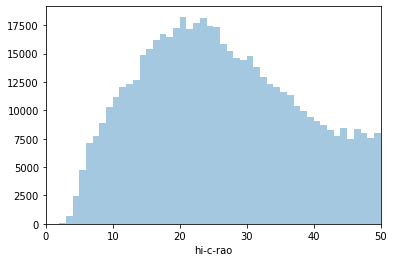

In [628]:
import seaborn as sns
ax = sns.distplot(df_2_or_u['hi-c-rao'], bins=10000, hist=True, kde=False, hist_kws={"range":(1, 10000)})
#ax.set_ylim(0, 500)
ax.set_xlim(0, 50)

In [18]:
import numpy as np
z = np.array([1, 0], [0])

TypeError: data type not understood

In [42]:
z.astype(float)  

array([1., 0.])

In [12]:
z = z.astype(dtype='int8')  

In [678]:
z.astype(dtype='float')

array([  1.,   2.,   3.,   4., -12.,   0.])

In [14]:
z

array([1, 0], dtype=int8)

In [45]:
d = dict(enumerate(z, 0)) 

In [46]:
d

{0: 1, 1: 0}

In [683]:
z.shape

(6,)

In [8]:
zb1 = np.array([True, False])

In [719]:
zb2 = np.array([True, False])

In [720]:
zb1*zb2

array([ True, False])

In [13]:
print (z.size * z.itemsize)

2


In [9]:
print (zb1.size * zb1.itemsize)

2


In [724]:
zt = np.array([[True, False], [True, False]])

In [725]:
zt

array([[ True, False],
       [ True, False]])

In [722]:
z[np.nonzero(zb1*zb2)]

array([1.0034])

In [727]:
import scipy.spatial.distance as ssd
ssd.pdist(zt, lambda u, v: np.median( (z)[np.nonzero(u*v)] ))

array([1.0034])

In [662]:
np.nanmedian(z)

7.96

In [625]:
df_2_or_u['hi-c-rao'].min()

2.0

In [622]:
df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/11_dist_with_georg_hic_sub_median_hic_100.h5')

In [621]:
df_2_or

tss_tss       exp  exp_georg  hi-c-rao strand_x  gene_order_tss_x  \
0               0  1.000000        NaN       0.0        +              1996   
1        13917823  0.617675        NaN       NaN        +              2163   
2        87442348  0.217594        NaN       NaN        +              3558   
3        85979439  0.388890        NaN       NaN        -              3511   
4        44254636  0.197412        NaN       NaN        +               889   
...           ...       ...        ...       ...      ...               ...   
597524   71670055  0.618089        NaN       6.0        -               861   
597525    4005672  0.119630        NaN     112.0        +              1872   
597526  113259670  0.042676        NaN       3.0        +               142   
597527   76893236  0.260073        NaN       NaN        +               708   
597528          0  1.000000        NaN       0.0        -              1829   

        gene_order_tes_x Gene stable ID_x     Gene type_x Uniprot_dc_x  ...  \
0                   1998  ENSG00000229956             NaN          NaN  ...   
1                   2164  ENSG00000162643  protein_coding       Q8IWG1  ...   
2                   3558  ENSG00000231434             NaN          NaN  ...   
3                   3511  ENSG00000237842             NaN          NaN  ...   
4                    889  ENSG00000204160  protein_coding       Q9NUE0  ...   
...                  ...              ...             ...          ...  ...   
597524               860  ENSG00000102302  protein_coding       P98174  ...   
597525              1872  ENSG00000134594  protein_coding       Q14088  ...   
597526               143  ENSG00000101916  protein_coding       Q9NR97  ...   
597527               707  ENSG00000270012             NaN          NaN  ...   
597528              1829  ENSG00000198354  protein_coding       Q5VW00  ...   

        chrom_x  strand_y gene_order_tss_y gene_order_tes_y  Gene stable ID_y  \
0          chr1         +             1996             1998   ENSG00000229956   
1          chr1         +             1996             1998   ENSG00000229956   
2          chr1         +             1996             1998   ENSG00000229956   
3          chr1         +             1996             1998   ENSG00000229956   
4          chr1         +             1996             1998   ENSG00000229956   
...         ...       ...              ...              ...               ...   
597524     chrX         -             1829             1829   ENSG00000198354   
597525     chrX         -             1829             1829   ENSG00000198354   
597526     chrX         -             1829             1829   ENSG00000198354   
597527     chrX         -             1829             1829   ENSG00000198354   
597528     chrX         -             1829             1829   ENSG00000198354   

           Gene type_y Uniprot_dc_y      dc_y seq_length_y  chrom_y  
0                  NaN          NaN       NaN          NaN     chr1  
1                  NaN          NaN       NaN          NaN     chr1  
2                  NaN          NaN       NaN          NaN     chr1  
3                  NaN          NaN       NaN          NaN     chr1  
4                  NaN          NaN       NaN          NaN     chr1  
...                ...          ...       ...          ...      ...  
597524  protein_coding       Q5VW00  0.103672        463.0     chrX  
597525  protein_coding       Q5VW00  0.103672        463.0     chrX  
597526  protein_coding       Q5VW00  0.103672        463.0     chrX  
597527  protein_coding       Q5VW00  0.103672        463.0     chrX  
597528  protein_coding       Q5VW00  0.103672        463.0     chrX  

[30288333 rows x 22 columns]

In [136]:
df_2_or_u

tss_tss       exp  exp_georg  hi-c-rao strand_x  gene_order_tss_x  \
342895   105160442  0.950081   0.051895     119.0        -                76   
343297   105838535  0.980966   0.774490     119.0        +                15   
1275528  105328086  0.856056   0.106404     119.0        +              2699   
343381   105232971  0.889197   0.070446     119.0        -                73   
343326   105867990  0.981978   0.226579     119.0        +                12   
...            ...       ...        ...       ...      ...               ...   
355214     1066522  0.936410   0.991767   47941.0        +               146   
469661     1090177  0.993863   0.884164   53696.0        +               509   
470153     1032482  0.994699   0.938420   53696.0        -               511   
1297658    1032482  0.994699   0.938420   53696.0        +               530   
660026     1090177  0.993863   0.884164   53696.0        +               530   

         gene_order_tes_x Gene stable ID_x     Gene type_x Uniprot_dc_x  ...  \
342895                 76  ENSG00000177830  protein_coding       Q9BWS9  ...   
343297                 16  ENSG00000185627  protein_coding   A0A087WUL9  ...   
1275528              2701  ENSG00000149313  protein_coding       Q9NRN7  ...   
343381                 72  ENSG00000177700  protein_coding       P62875  ...   
343326                 14  ENSG00000177963  protein_coding       Q9NPQ8  ...   
...                   ...              ...             ...          ...  ...   
355214                147  ENSG00000110651  protein_coding       A6NMH8  ...   
469661                511  ENSG00000198730  protein_coding       Q6PD62  ...   
470153                509  ENSG00000110321  protein_coding       D3DQV9  ...   
1297658               532  ENSG00000170242  protein_coding       Q96K76  ...   
660026                532  ENSG00000170242  protein_coding       Q96K76  ...   

         chrom_x  strand_y gene_order_tss_y gene_order_tes_y  \
342895     chr11         +             2699             2701   
343297     chr11         +             2699             2701   
1275528    chr11         +               59               59   
343381     chr11         +             2699             2701   
343326     chr11         +             2699             2701   
...          ...       ...              ...              ...   
355214     chr11         -               87               87   
469661     chr11         +              530              532   
470153     chr11         +              530              532   
1297658    chr11         -              511              509   
660026     chr11         +              509              511   

         Gene stable ID_y     Gene type_y Uniprot_dc_y      dc_y seq_length_y  \
342895    ENSG00000149313  protein_coding       Q9NRN7  0.000000        309.0   
343297    ENSG00000149313  protein_coding       Q9NRN7  0.000000        309.0   
1275528   ENSG00000177156  protein_coding       P37837  0.000000        337.0   
343381    ENSG00000149313  protein_coding       Q9NRN7  0.000000        309.0   
343326    ENSG00000149313  protein_coding       Q9NRN7  0.000000        309.0   
...                   ...             ...          ...       ...          ...   
355214    ENSG00000078902  protein_coding       Q9H0E2  0.000000        274.0   
469661    ENSG00000170242  protein_coding       Q96K76  0.130182       1375.0   
470153    ENSG00000170242  protein_coding       Q96K76  0.130182       1375.0   
1297658   ENSG00000110321  protein_coding       D3DQV9  0.126792        907.0   
660026    ENSG00000198730  protein_coding       Q6PD62  0.240409       1173.0   

         chrom_y  
342895     chr11  
343297     chr11  
1275528    chr11  
343381     chr11  
343326     chr11  
...          ...  
355214     chr11  
469661     chr11  
470153     chr11  
1297658    chr11  
660026     chr11  

[59780 rows x 22 columns]

In [127]:
df_2_or_u = df_2_or_u.sort_values(by=['hi-c-rao'], ascending=True) 

In [137]:
for i in df_2_or_u.index.values[0:2]:
    print (i)
    long_form_top.at[i]=-1

342895
343297


In [1203]:
# import numpy as np
import pandas as pd
import warnings
from lohia_utilities.calculate_auc import *
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from lohia_utilities.create_corr_network import rank

def calc_auc_hic(resoulution_in_kb, case='simple', dist_tp='exp', prediction='hi-c-rao'):

    df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/1_dist_with_georg_hic_sub_median_hic_%s.h5' %resoulution_in_kb)

    #df_2_or = df_2_or[df_2_or['exp_georg'] >= 0] # liming the matrix to only chosen values for rank standerization
    df_2_or = df_2_or[df_2_or['hi-c-rao'] >= 0] # liming the matrix to only chosen values for rank standerization
    df_2_or_u = df_2_or[df_2_or['Gene stable ID_x'] != df_2_or['Gene stable ID_y']]
    #ranked_matirx = rank(df_2_or['exp_georg'])
    #df_2_or['exp_georg'] = ranked_matirx
    #df_2_or.rename(columns={"exp_georg": "exp (GK)"}, inplace=True)

    ranked_matirx = rank(df_2_or['exp'])
    df_2_or['exp'] = ranked_matirx
    df_2_or['gene_freq'] = df_2_or['gene_occurence_frequency_y'] + df_2_or['gene_occurence_frequency_x']

    #ranked_matirx = rank(df_2_or['hi-c-rao'])
    #df_2_or['hi-c-rao'] = ranked_matirx
    m_l = []
    change_group_level_1 = df_2_or.groupby(['chrom_x'])
    for chrm in change_group_level_1.groups.keys():
        df = change_group_level_1.get_group(chrm)
        num_pairs = df['Gene stable ID_x'].nunique()

        prot_list_sp = np.array_split(df, num_pairs, axis=0)
        for i in range(0,num_pairs):

            long_form_top = prot_list_sp[int(i)]
            long_form_top['dist'] = long_form_top[dist_tp]
            long_form_top = long_form_top[long_form_top['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization

            long_form_top = long_form_top[long_form_top['Gene stable ID_x'] != long_form_top['Gene stable ID_y']] # remove all the self pairs from each set

            mp =  long_form_top['Gene stable ID_y'].values[0]
            #print (long_form_top.shape)
            
            exp_median = long_form_top['exp'].median()
            exp_mean = long_form_top['exp'].mean()
            exp_var = long_form_top['exp'].var()

            long_form_top = long_form_top.reset_index()
            if exp_median >=0:
        
           

                for dist_thresh in [2]:
                #for dist_thresh in [0.5,0.8]:
                #for dist_thresh in [100000,1000000,10000000,100000000]:
                #for dist_thresh in [4000]:
                #for dist_thresh in [df_2_or_u["hi-c-rao"].min(), df_2_or["hi-c-rao"].max()-1, df_2_or["hi-c-rao"].mean(), df_2_or["hi-c-rao"].median()]:
                    if case == 'simple':
                        long_form_top["True_sim"] = [1 if score > dist_thresh else 0 for score in long_form_top["dist"]]
                    elif case == 'tp':
                    
                        long_form_top = long_form_top.sort_values(by=['dist'], ascending=False) 
                        long_form_top["True_sim"] = [0 if score > dist_thresh else 0 for score in long_form_top["dist"]]  
                        for ind_val in long_form_top.index.values[0:dist_thresh]:
                            long_form_top.at[ind_val, 'True_sim'] = 1
                    else:    
                        long_form_top = long_form_top.sort_values(by=['dist'], ascending=True) 
                        long_form_top["True_sim"] = [1 if score > dist_thresh else 1 for score in long_form_top["dist"]]  
                        for ind_val in long_form_top.index.values[0:dist_thresh]:
                            long_form_top.at[ind_val, 'True_sim'] = 0
                    #
                    #long_form_top["True_sim"] = [1 if score <= dist_thresh else 0 for score in long_form_top["dist"]] 
                    #long_form_top["True_sim"] = [1 if score >= dist_thresh else 1 if score2 <= 1000 else 0 for score, score2 in zip(long_form_top["dist"],long_form_top["tss_tss"])]    
                    long_form_top["true_pos"] = [score for score in long_form_top["True_sim"]]
                    long_form_top["true_neg"] = [1 if score==0 else 0 for score in long_form_top["True_sim"]]
                    long_form_top["predicted_sim_from_exp"] = [score for score in long_form_top[prediction]]
                    ca = calc_auroc (long_form_top,predicted_score='predicted_sim_from_exp')
                    m_curve = calc_auc_curve (long_form_top,predicted_score='predicted_sim_from_exp')
                    pr_curve = prec_recall (long_form_top,predicted_score='predicted_sim_from_exp')

                    tpd = pd.DataFrame(m_curve)
                    if m_curve:
                        tpd[0] =  tpd[0].astype(float).round(2)
                        tpd = tpd.groupby([0]).mean()
                        m_curve  = dict(zip(tpd.index, tpd[1]))
                    else:
                        m_curve  = {}
                    tpd = pd.DataFrame(pr_curve)
                    if pr_curve:
                        tpd[0] =  tpd[0].astype(float).round(2)
                        tpd = tpd.groupby([0]).mean()
                        pr_curve  = dict(zip(tpd.index, tpd[1]))
                    else:
                        pr_curve  = {}
                    m_l.append((chrm, num_pairs,dist_thresh, ca, m_curve, pr_curve, long_form_top["true_pos"].sum(), long_form_top["true_neg"].sum(), exp_median, exp_mean, exp_var, mp))
            else:
                pass

    df_scores = pd.DataFrame(m_l, columns =['chrm', 'num_pairs','dist_thresh',  'auc', 'plot', 'pr_curve', 'true_pos', 'true_neg', 'exp_median', 'exp_mean', 'exp_var', 'Gene stable ID'])
    #df_scores.to_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_%s_%s_%s.h5' %(resoulution_in_kb, case, dist_tp), key='df', mode='w')    
    return df_scores

In [1204]:
    for resoultion in [100]:
        for case in ['simple']:
            df_scores = calc_auc_hic(resoultion, case=case, dist_tp='hi-c-rao', prediction='exp')
            

(0, 10)

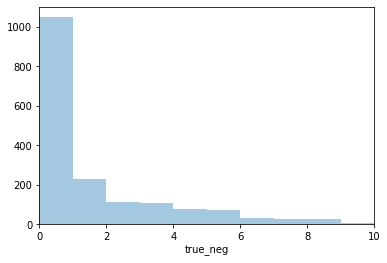

In [1202]:
import seaborn as sns
ax = sns.distplot(df_scores['true_neg'], bins=100, hist=True, kde=False, hist_kws={"range":(0, 100)})
#ax.set_ylim(0, 500)
ax.set_xlim(0, 10)

In [1194]:
df_scores[df_scores['true_neg'] >0]

chrm  num_pairs  dist_thresh       auc  \
1     chr1       1806            1  0.928998   
3     chr1       1806            1  0.862703   
5     chr1       1806            1  0.946183   
6     chr1       1806            1  0.973272   
7     chr1       1806            1  0.083782   
...    ...        ...          ...       ...   
1789  chr1       1806            1  0.738829   
1792  chr1       1806            1  0.953726   
1793  chr1       1806            1  0.789200   
1795  chr1       1806            1  0.913848   
1804  chr1       1806            1  0.825822   

                                                   plot  \
1     {0.0: 0.4647971360381815, 1.0: 0.9644988066825...   
3     {0.0: 0.31741741741741486, 0.2: 0.749249249249...   
5     {0.0: 0.47340425531915775, 1.0: 0.973091364205...   
6     {0.0: 0.4866362451108272, 0.5: 0.9732724902216...   
7     {0.0: 0.04219030520646316, 1.0: 0.541891083183...   
...                                                 ...   
1789  {0.0: 0.36972938955318296, 1.0: 0.869414726242...   
1792  {0.0: 0.4771634615384721, 1.0: 0.9768629807692...   
1793  {0.0: 0.2504879635653869, 0.33: 0.696486662329...   
1795  {0.0: 0.4406509253350428, 0.5: 0.9138481174218...   
1804  {0.0: 0.4132155907429999, 1.0: 0.9129110840438...   

                                               pr_curve  true_pos  true_neg  \
1     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....      1676         1   
3     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....      1665         5   
5     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....      1598         1   
6     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....      1534         2   
7     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....      1671         1   
...                                                 ...       ...       ...   
1789  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....      1589         1   
1792  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....      1664         1   
1793  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....      1537         3   
1795  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....      1567         2   
1804  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....      1642         1   

      exp_median  exp_mean   exp_var   Gene stable ID  
1       0.456546  0.418631  0.047458  ENSG00000116824  
3       0.638139  0.582847  0.083604  ENSG00000175756  
5       0.775577  0.705311  0.067062  ENSG00000116138  
6       0.178618  0.189410  0.012479  ENSG00000188910  
7       0.089721  0.105214  0.006883  ENSG00000198797  
...          ...       ...       ...              ...  
1789    0.701526  0.629293  0.061081  ENSG00000219481  
1792    0.780886  0.693194  0.074586  ENSG00000031698  
1793    0.768836  0.703969  0.072867  ENSG00000060688  
1795    0.294825  0.299675  0.034939  ENSG00000200913  
1804    0.331717  0.322457  0.028867  ENSG00000162383  

[757 rows x 12 columns]

Text(0, 0.5, 'AUC')

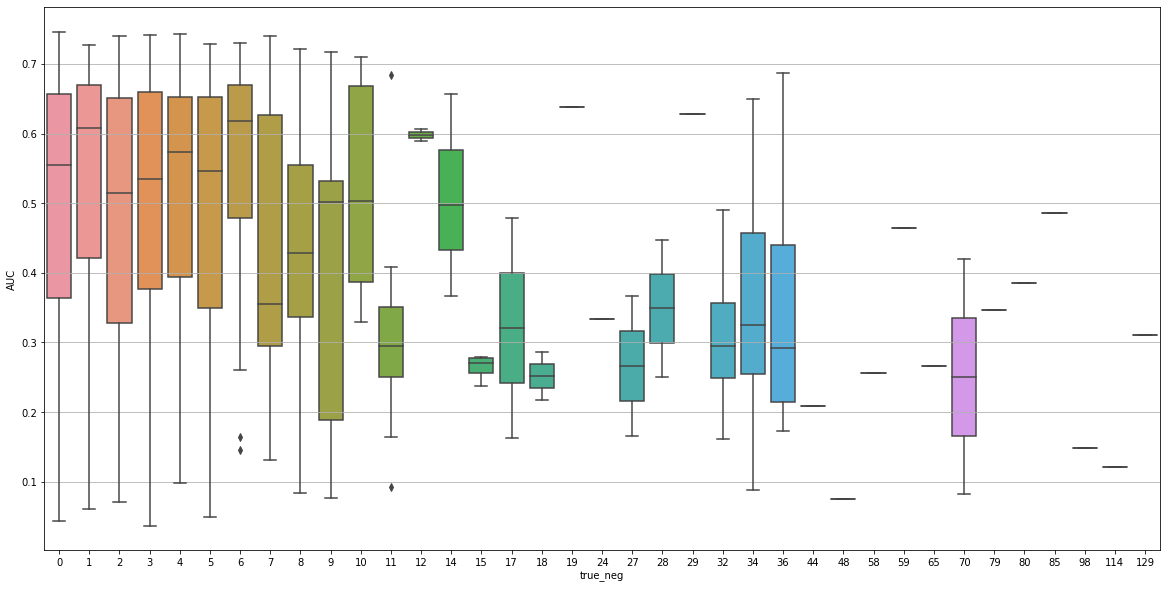

In [1199]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#p = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(x='true_neg', y='exp_mean', 
                 data=df_scores
                 #,palette="colorblind"
                 #,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')

100 simple


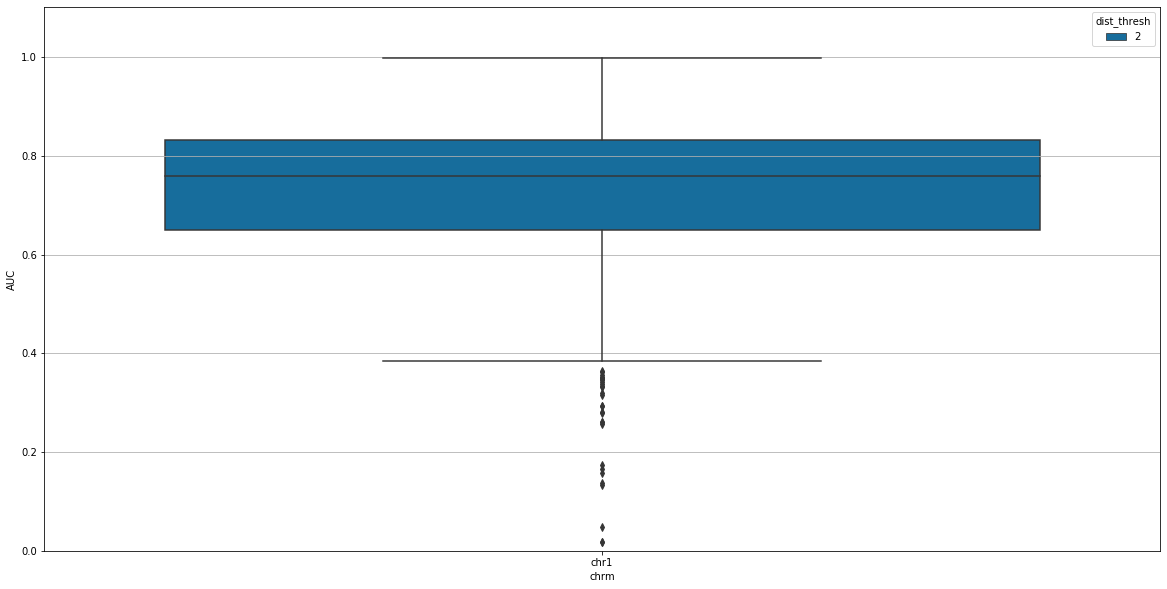

In [1205]:
for resoultion in [100]:
    for case in ['simple']:
        #df_scores = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_%s_%s_%s_%s.h5' %(resoultion, case, 'hi-c-rao','exp'))
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='dist_thresh'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

1 tp


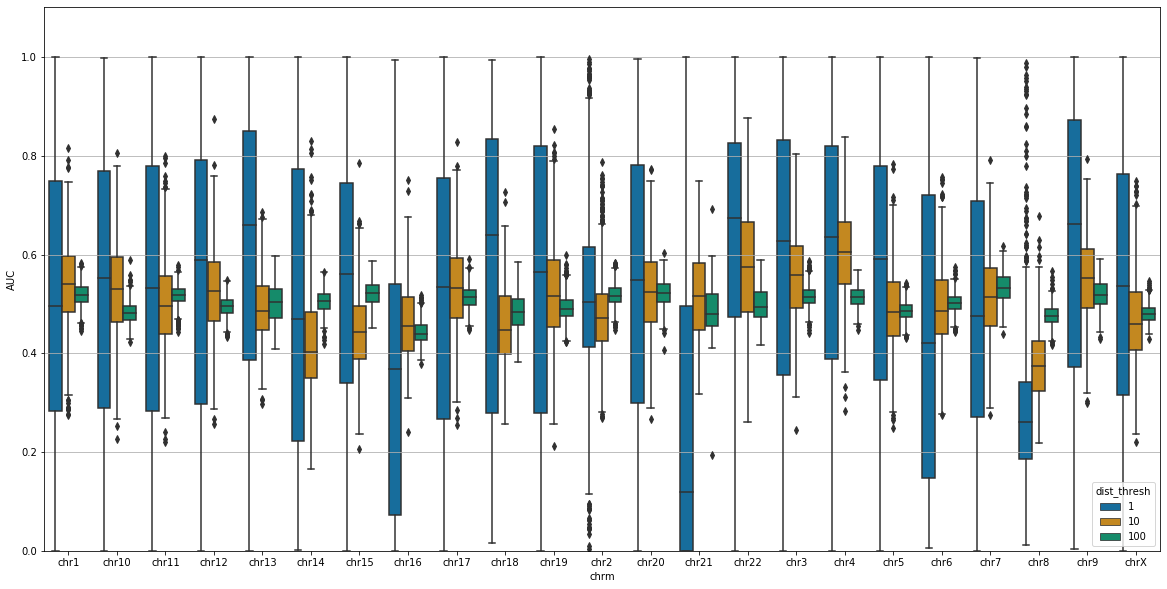

1 tn


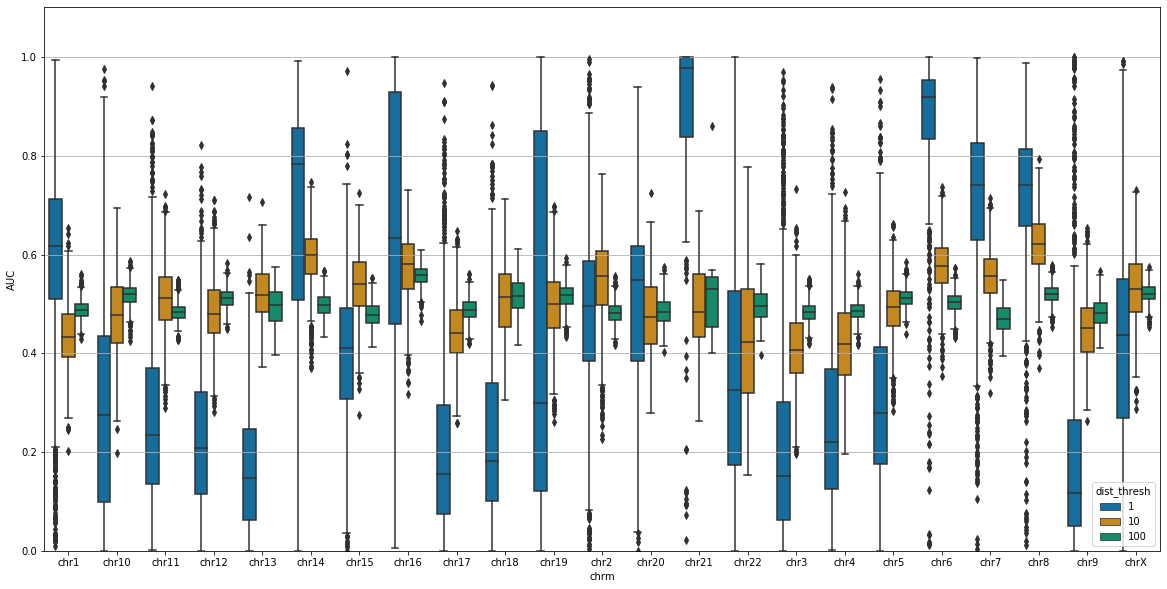

10 tp


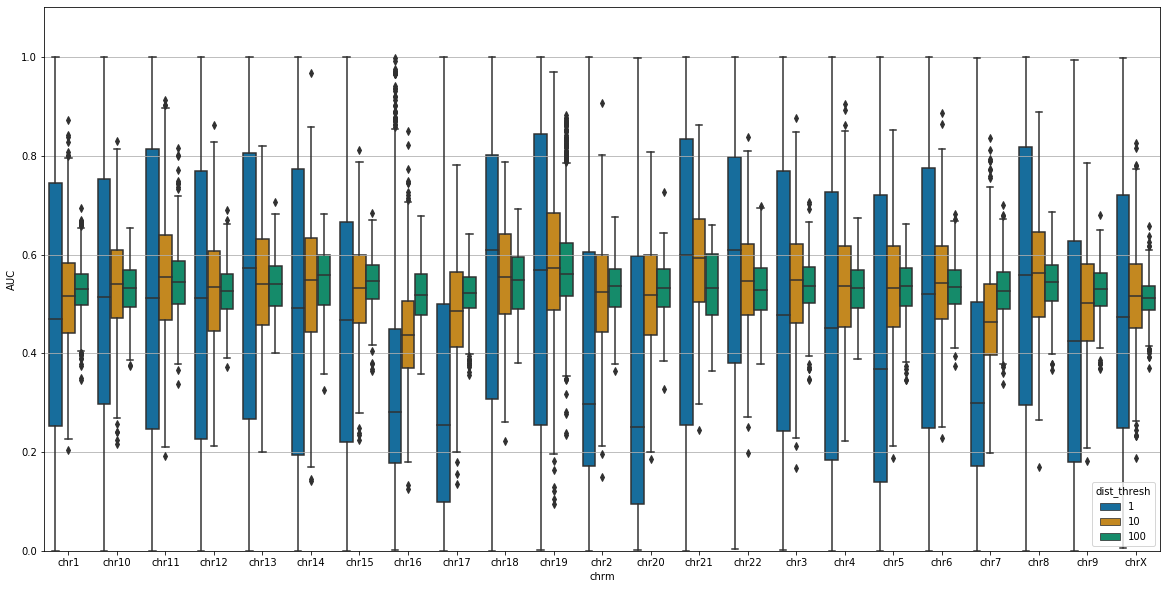

10 tn


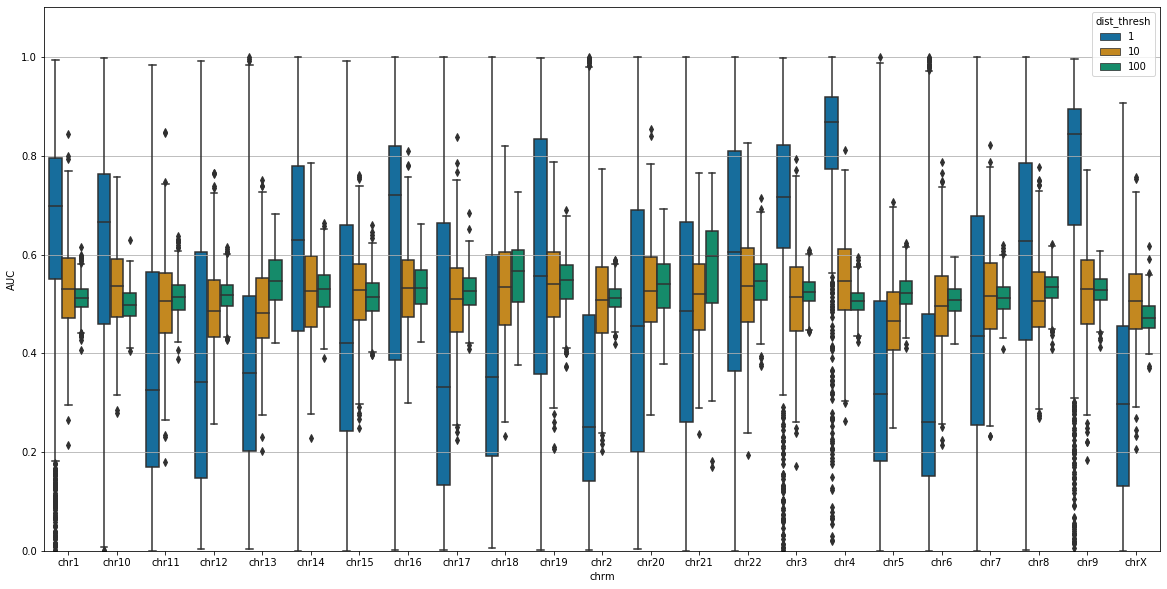

100 tp


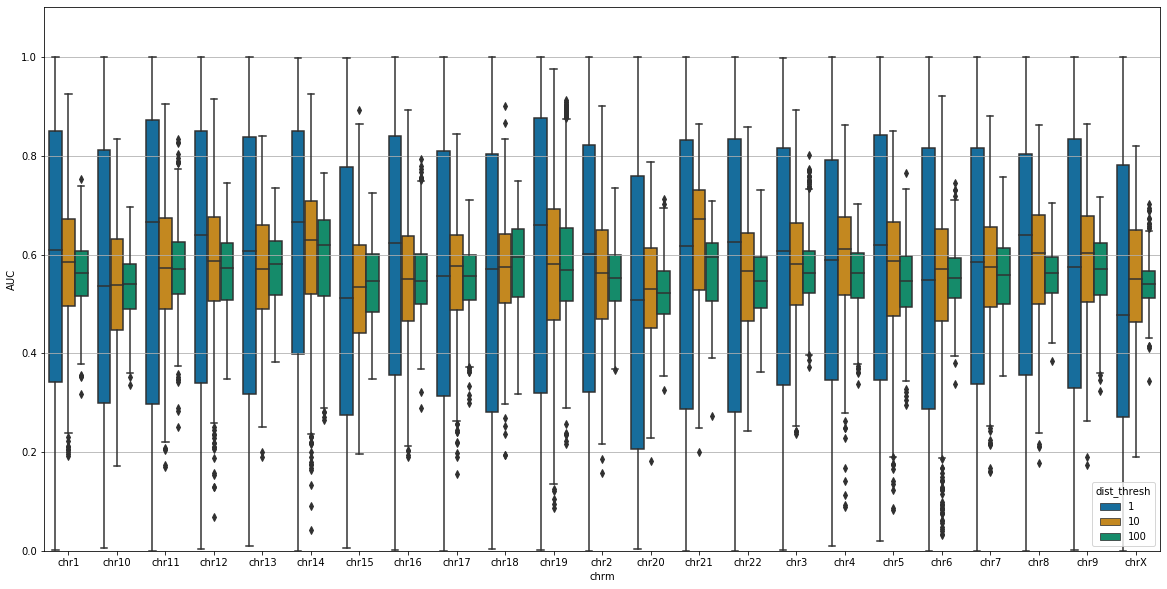

100 tn


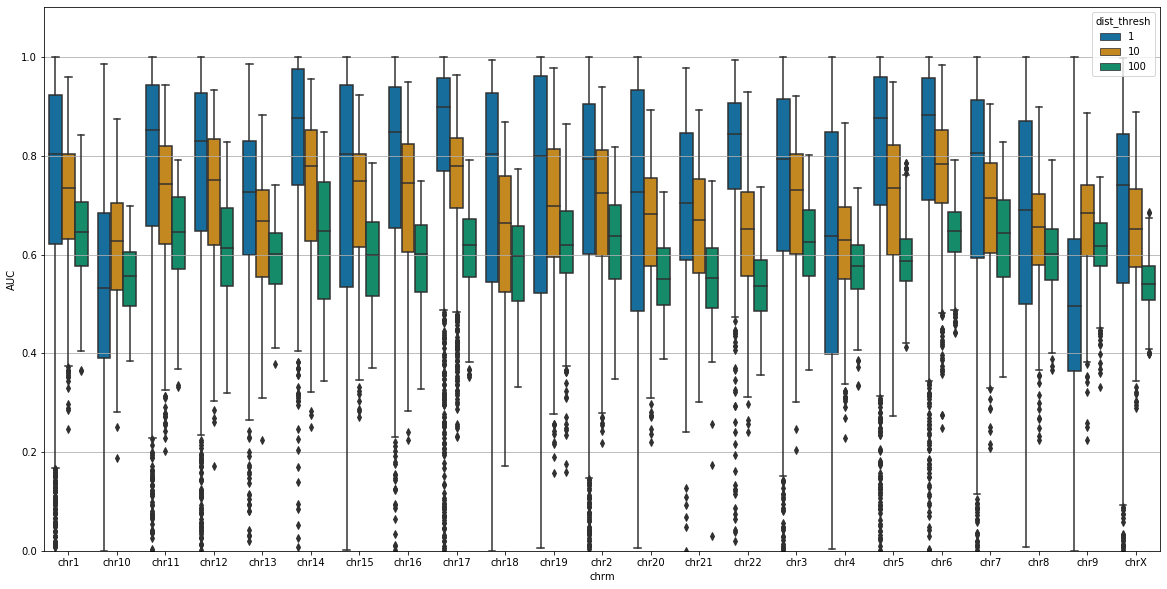

500 tp


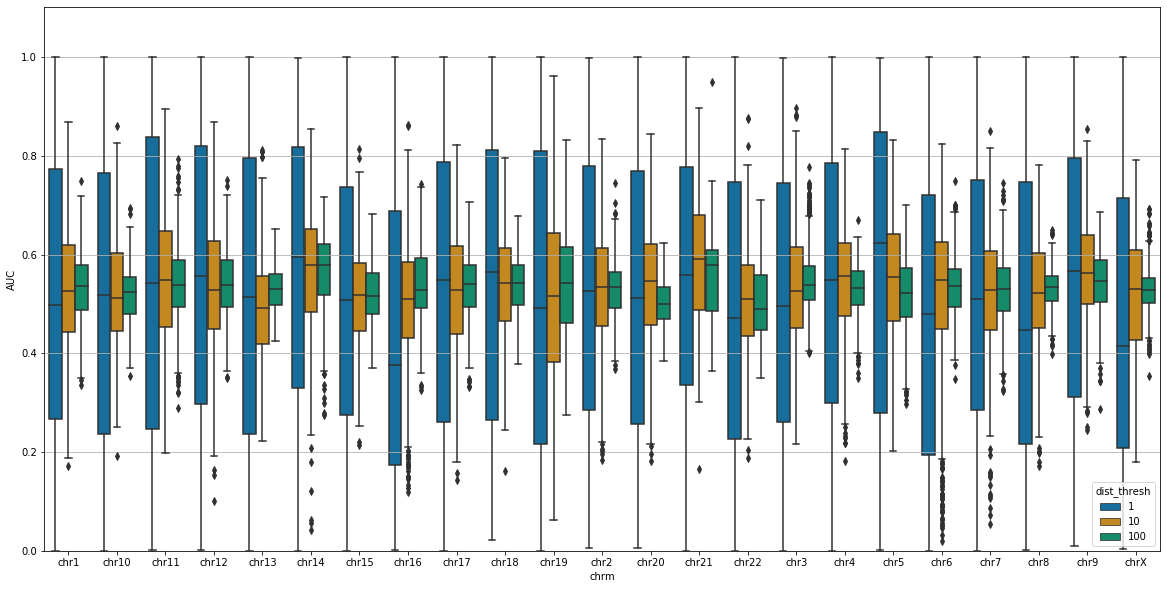

500 tn


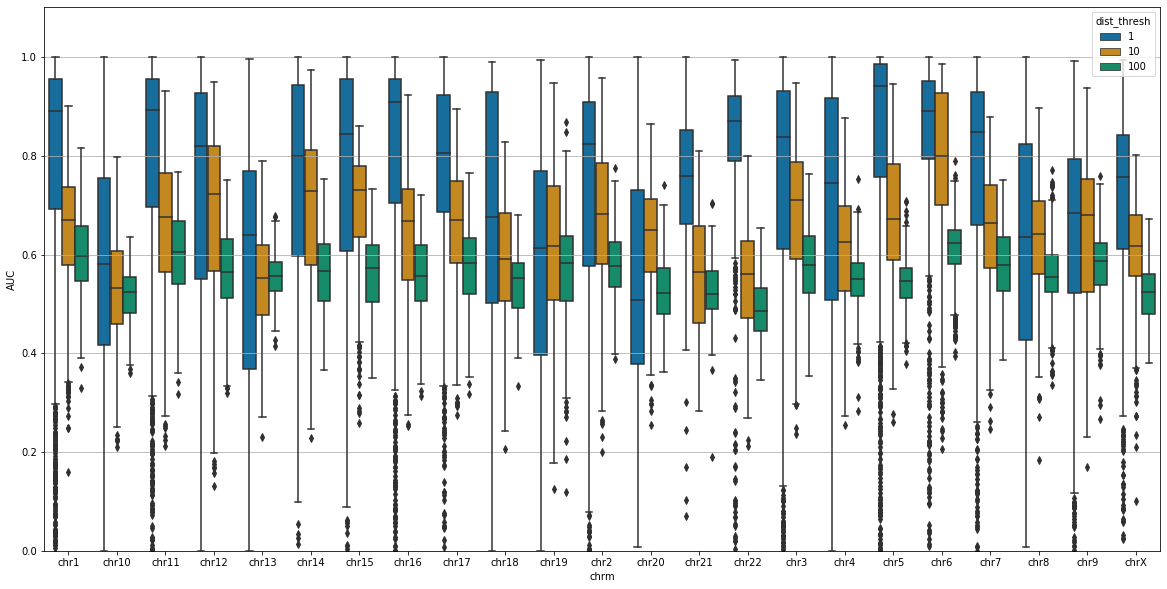

In [728]:
for resoultion in [1, 10, 100,500]:
    for case in ['tp', 'tn']:
        df_scores = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_%s_%s_%s_%s.h5' %(resoultion, case, 'hi-c-rao','exp'))
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='dist_thresh'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

1 tp


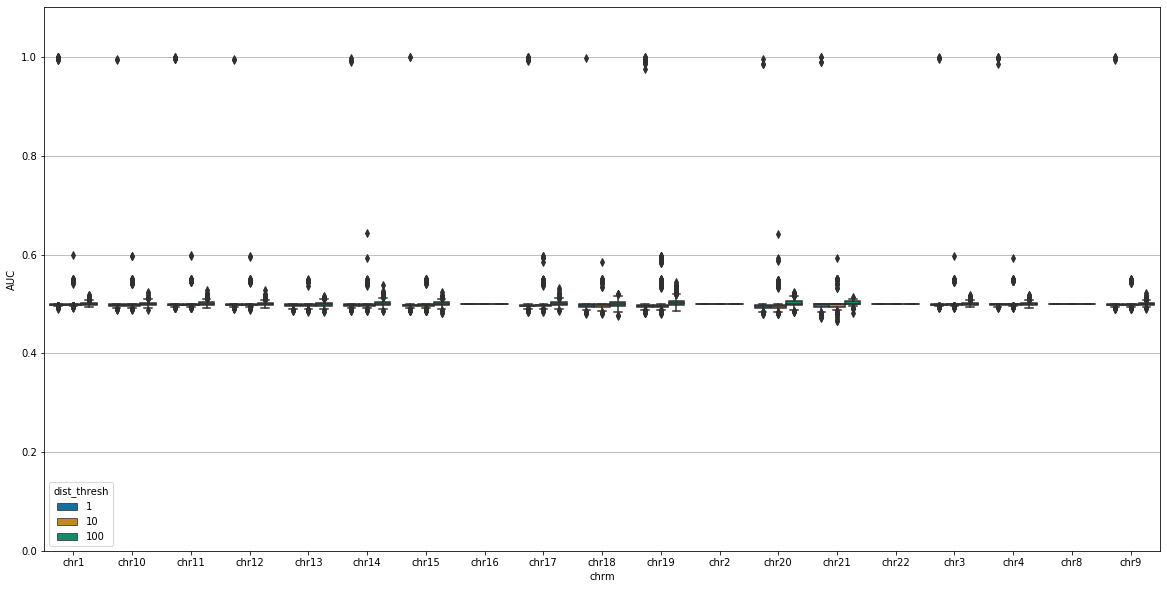

1 tn


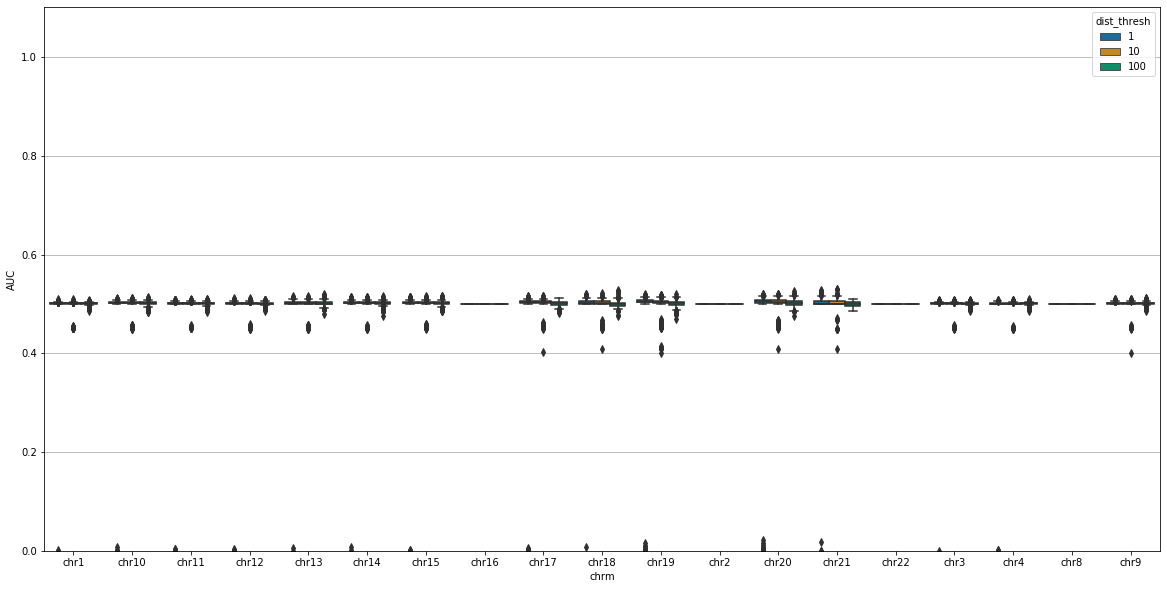

10 tp


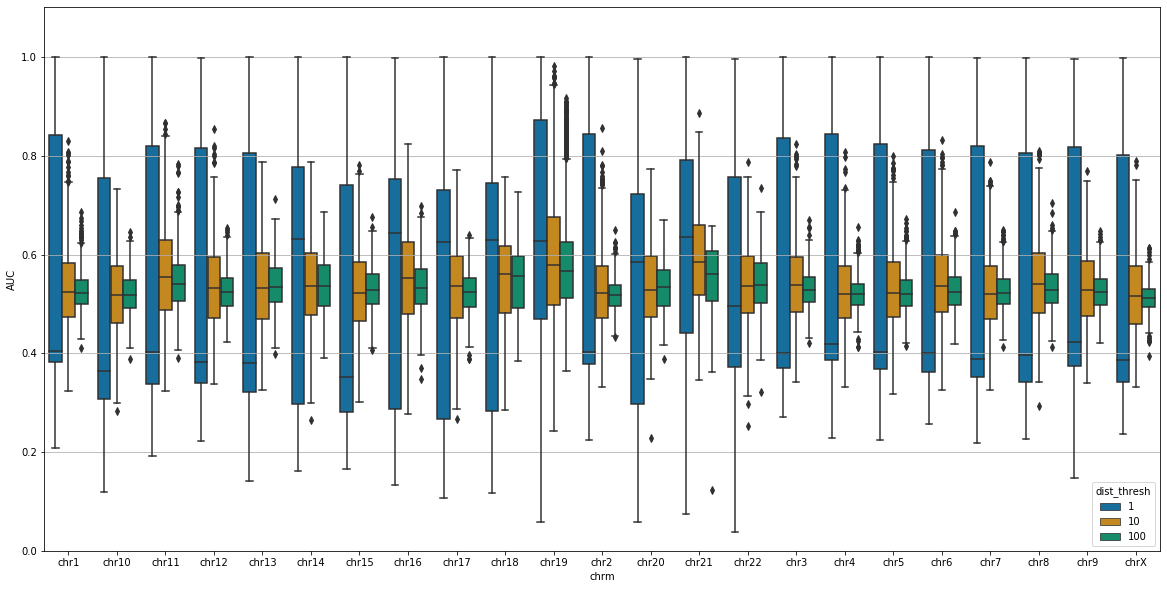

10 tn


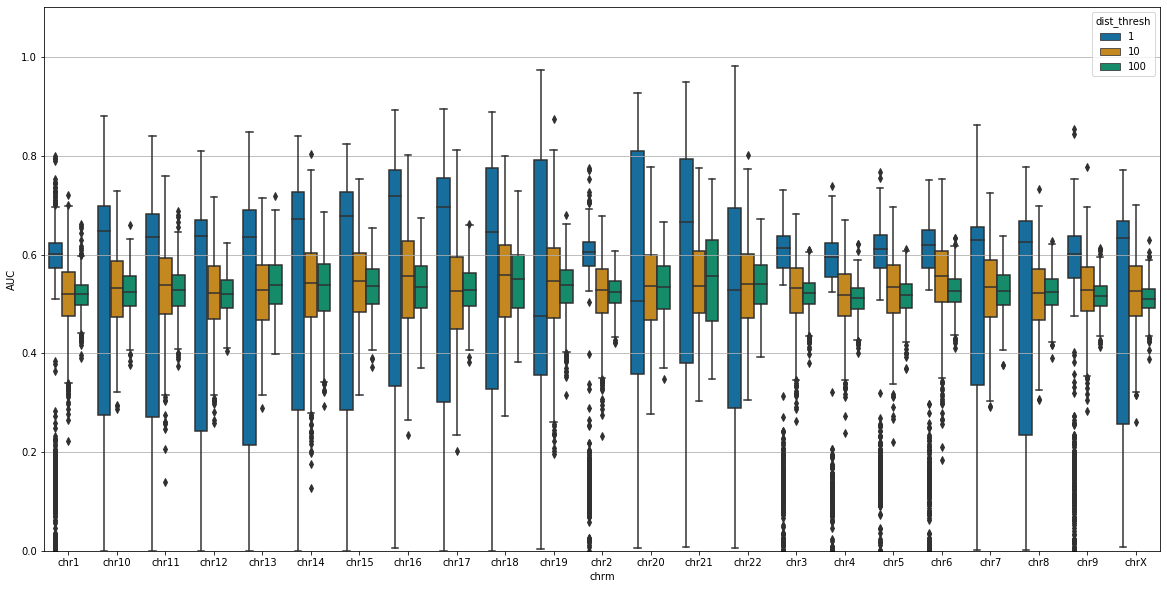

100 tp


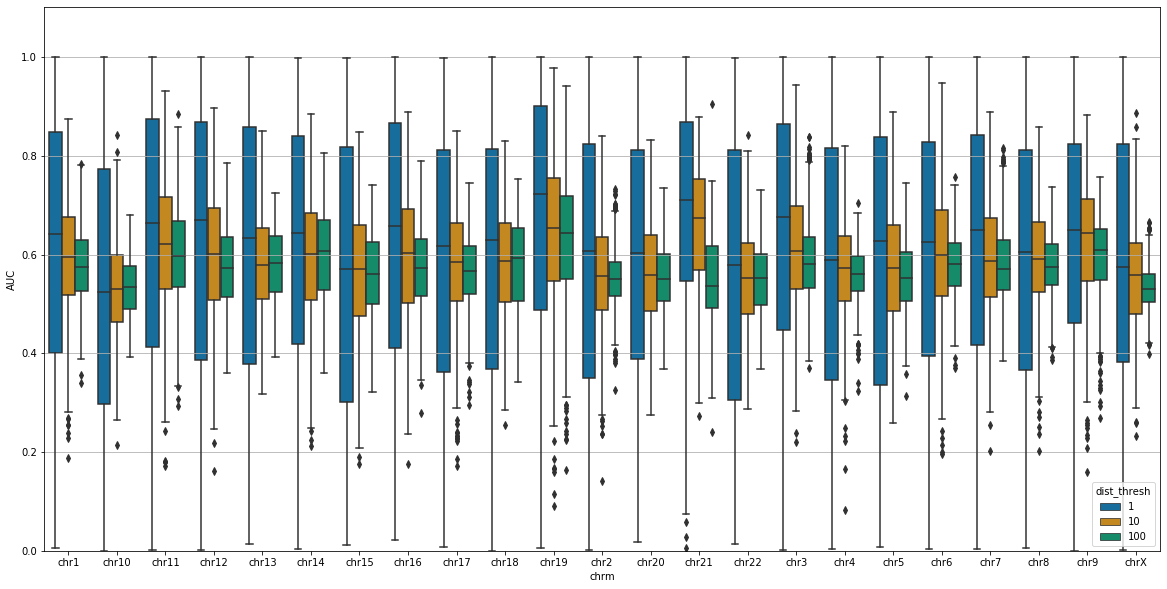

100 tn


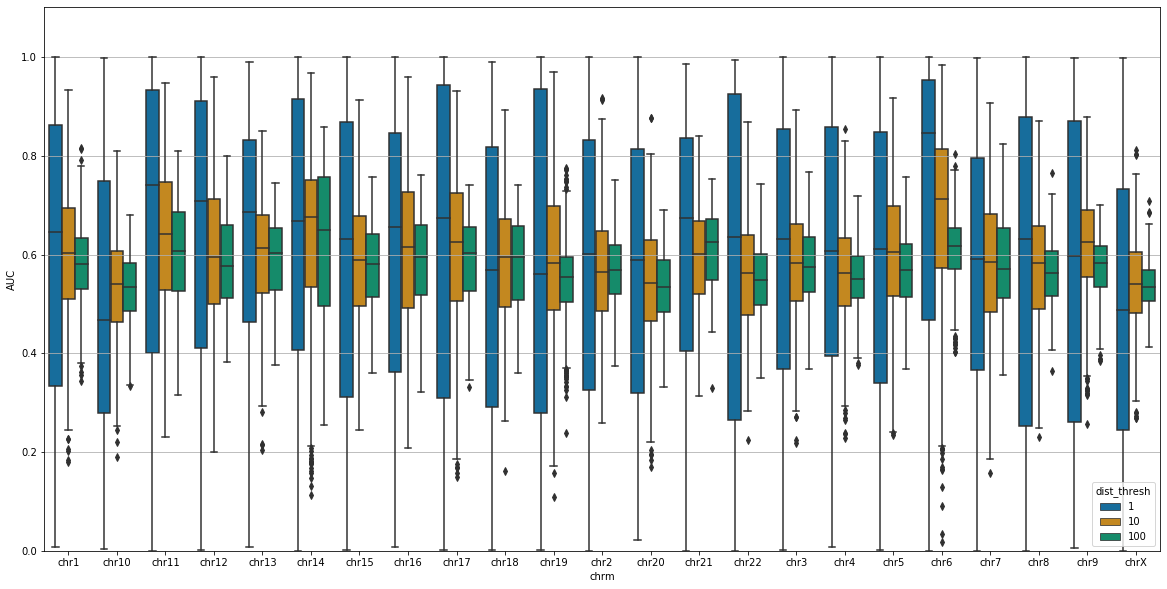

In [553]:
for resoultion in [1, 10, 100]:
    for case in ['tp', 'tn']:
        df_scores = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_%s_%s_%s_%s.h5' %(resoultion, case, 'exp','hi-c-rao'))
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='dist_thresh'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

1 tp


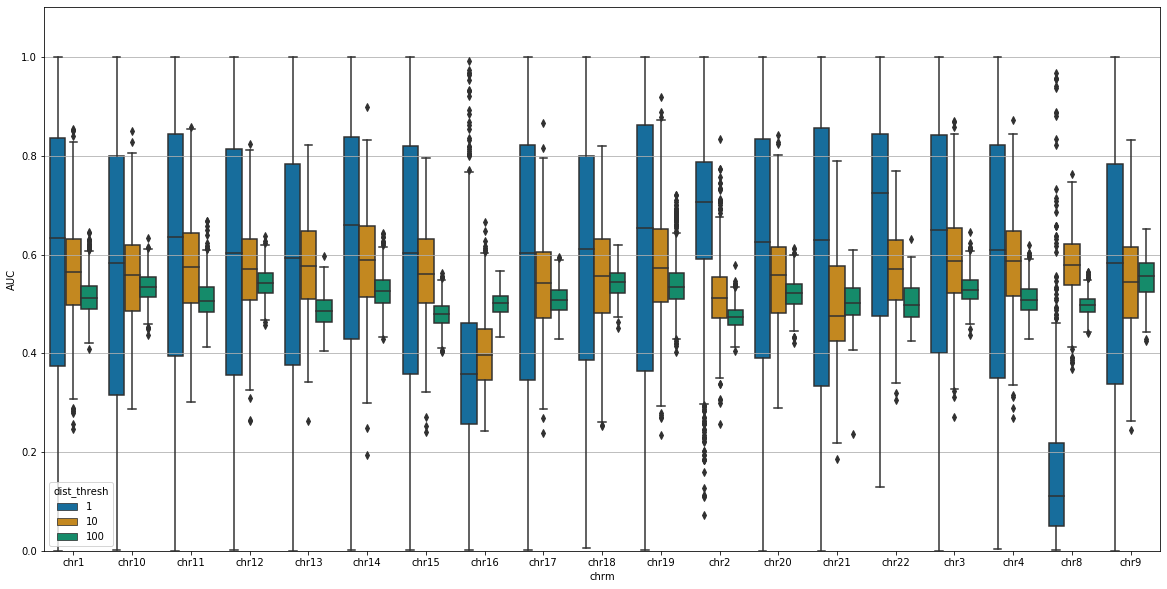

1 tn


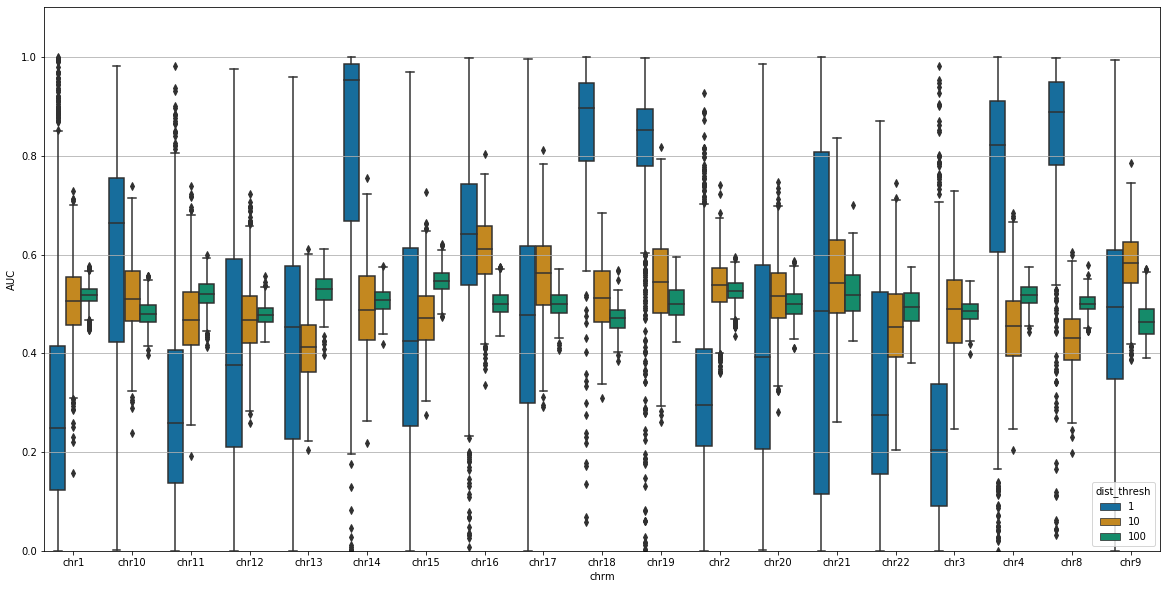

10 tp


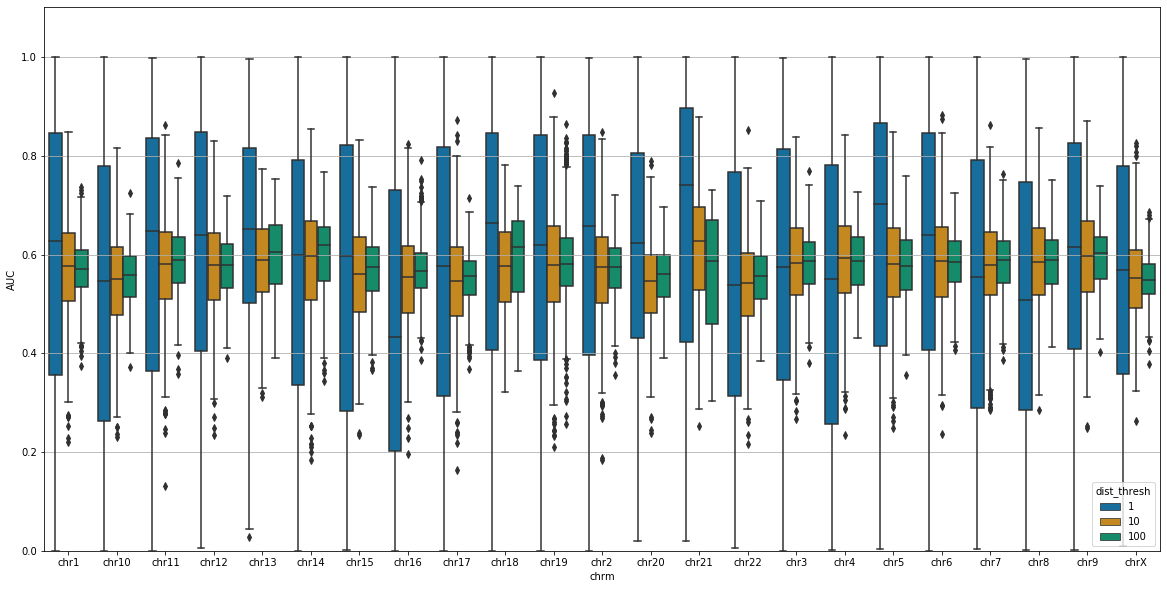

10 tn


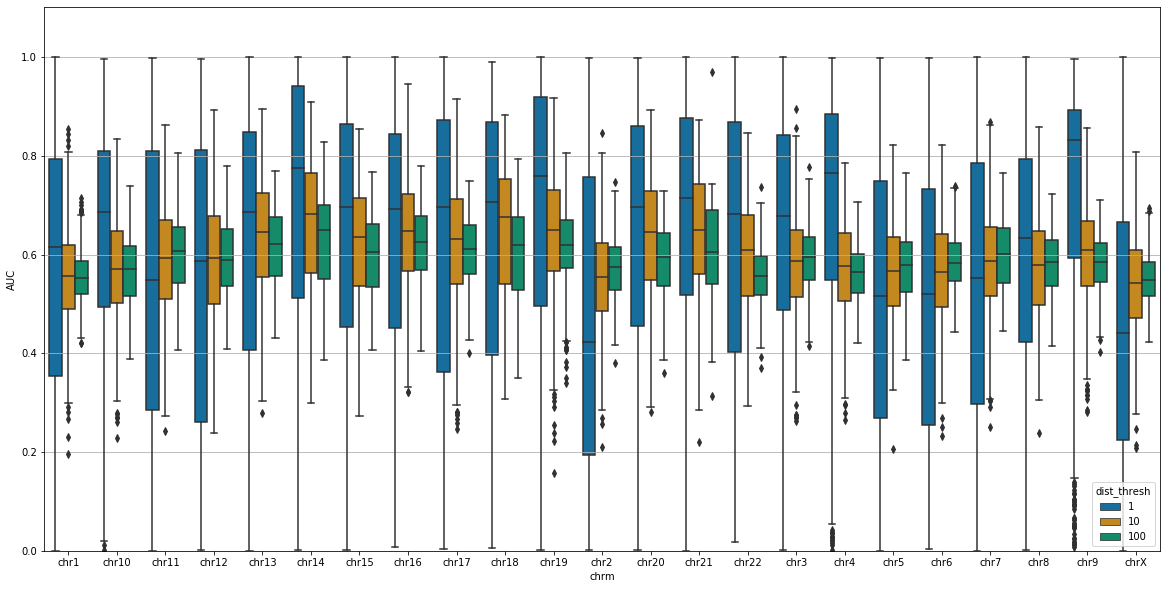

100 tp


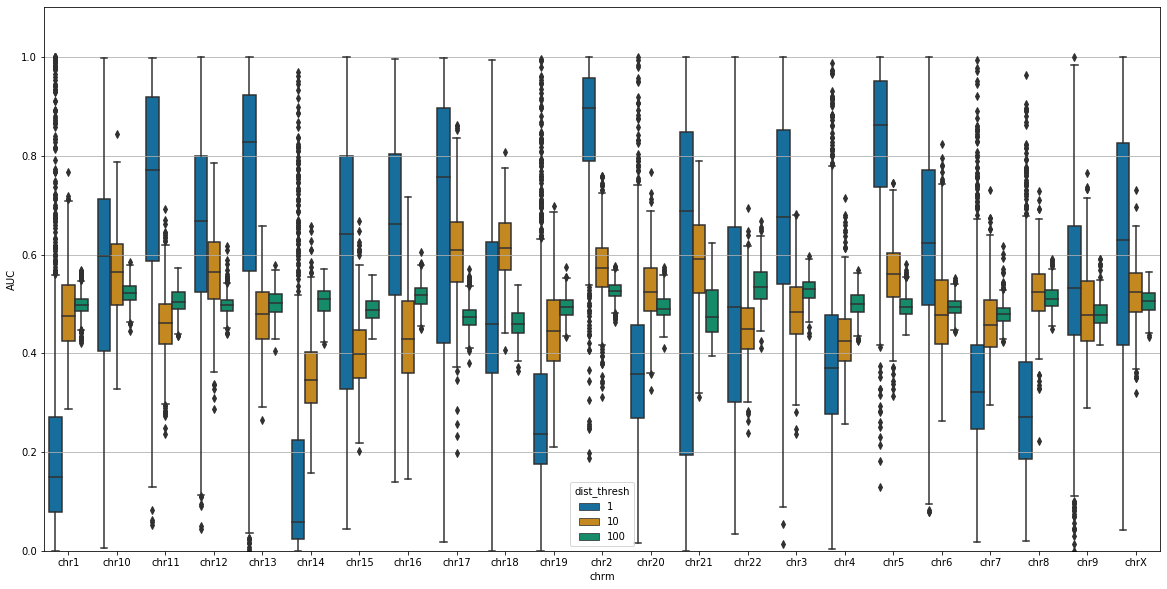

100 tn


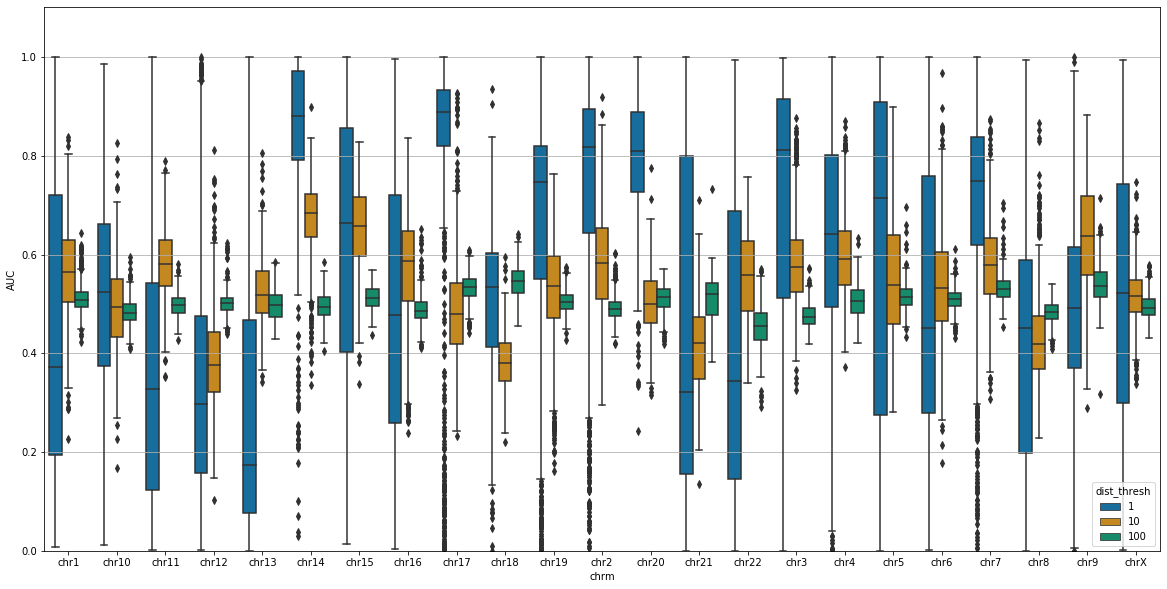

In [554]:
for resoultion in [1, 10, 100]:
    for case in ['tp', 'tn']:
        df_scores = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_%s_%s_%s_%s.h5' %(resoultion, case, 'hi-c-rao-common_elements','exp'))
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='dist_thresh'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

1 tp


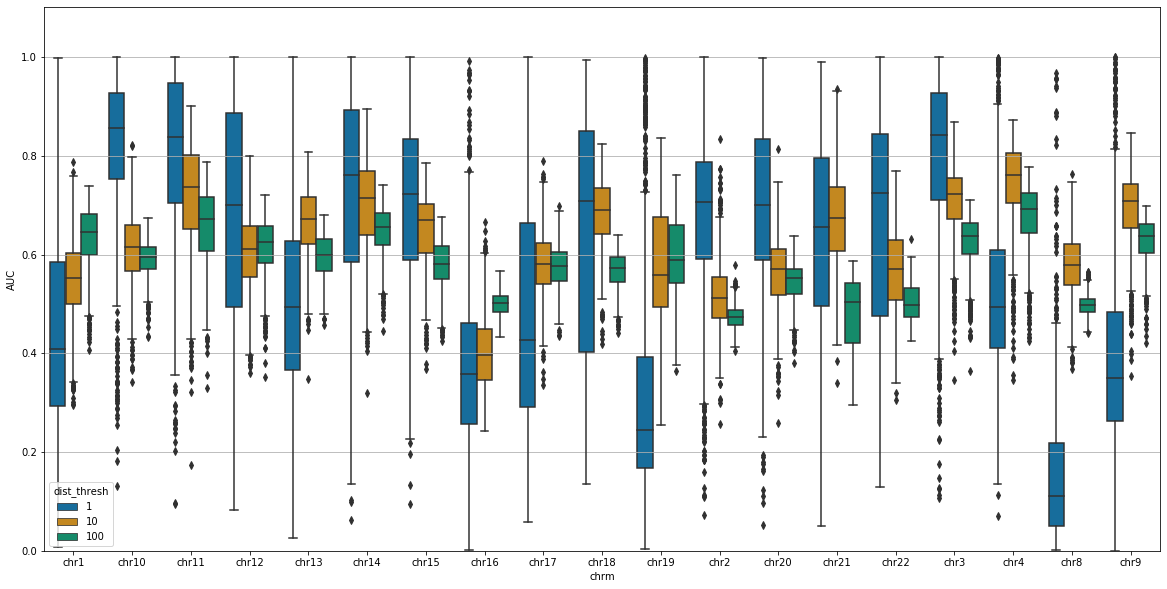

1 tn


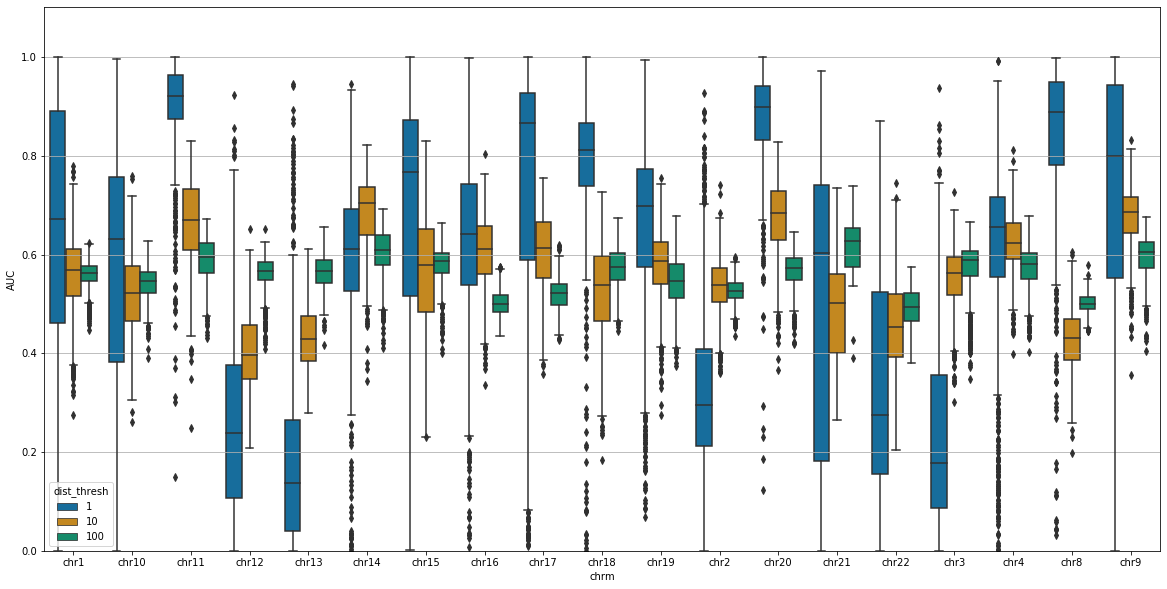

10 tp


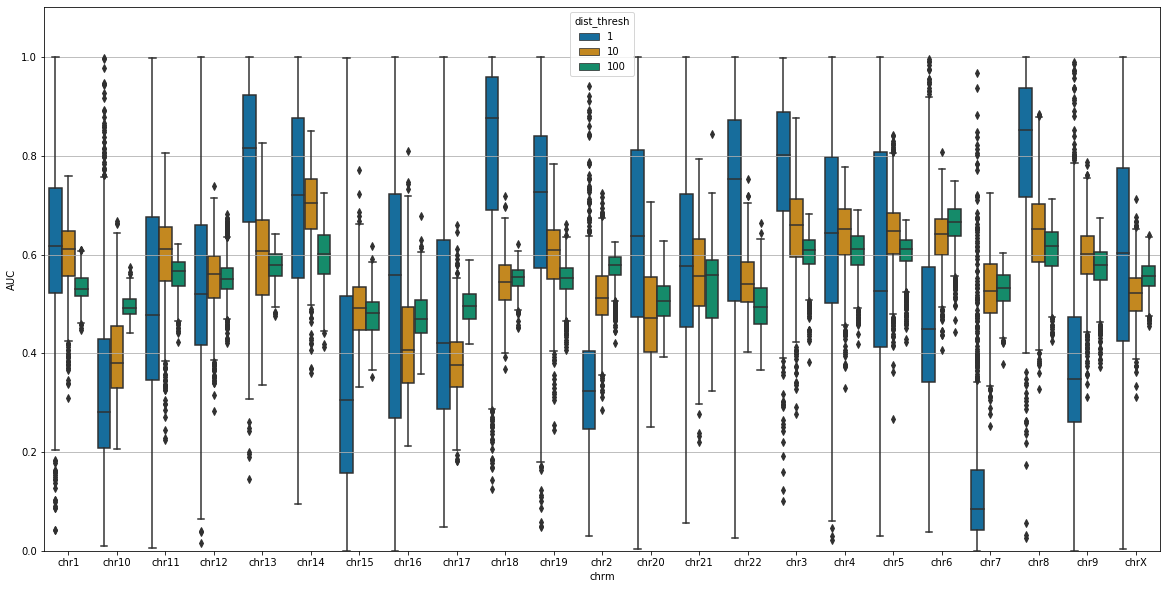

10 tn


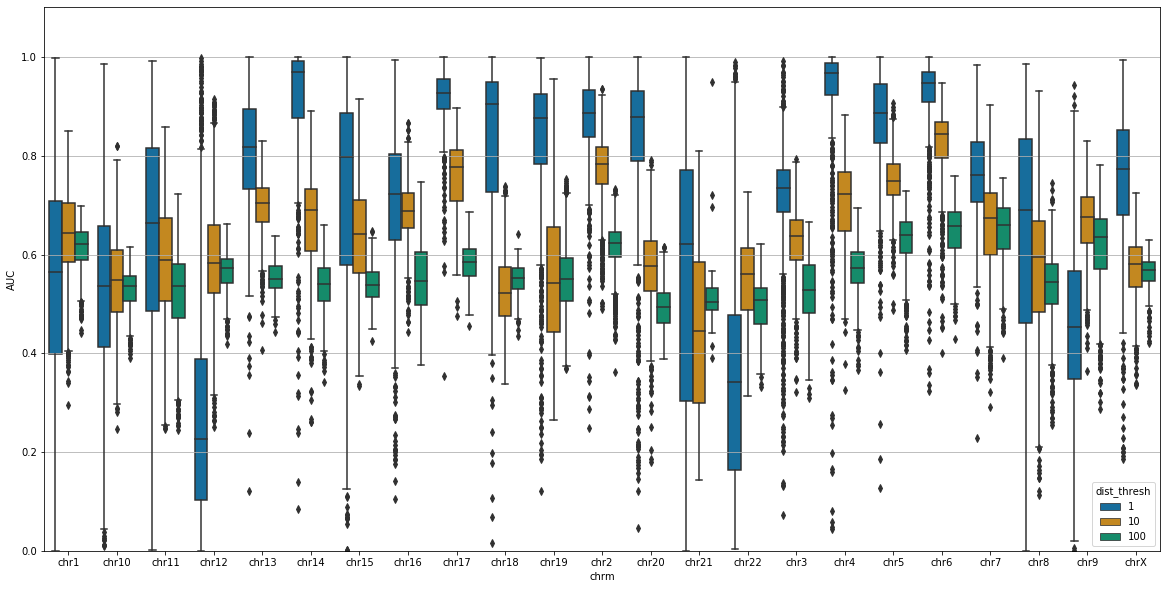

100 tp


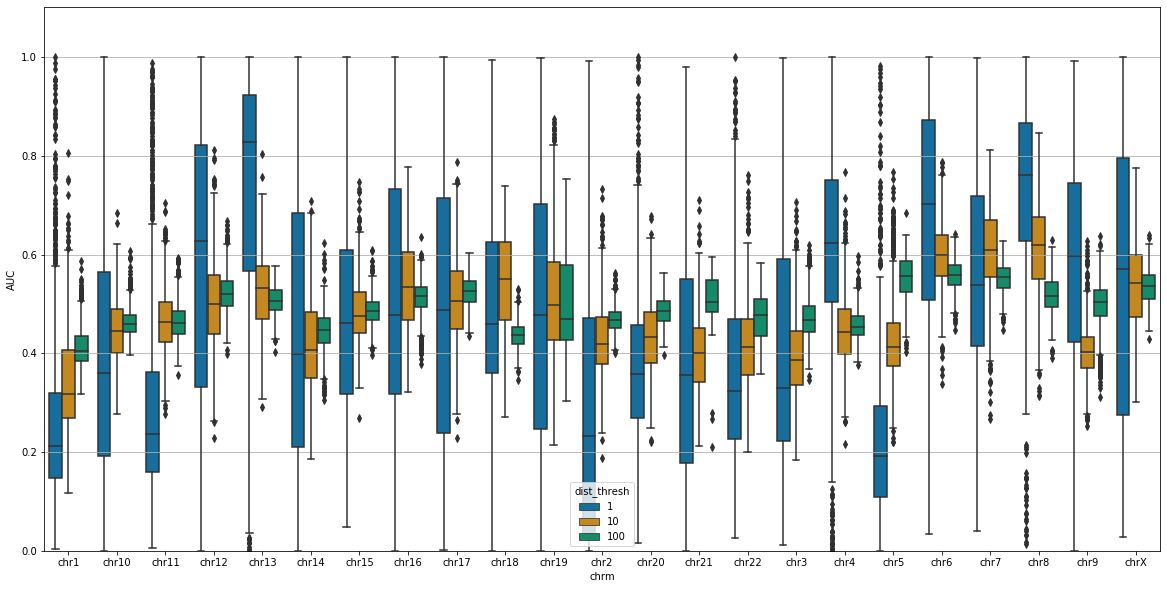

100 tn


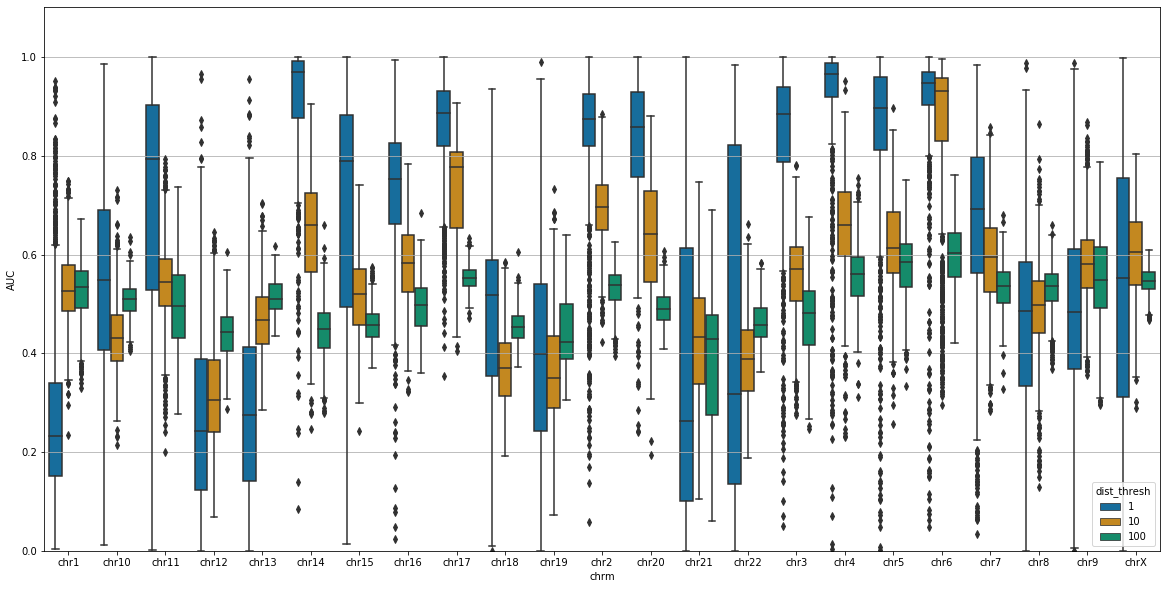

In [555]:
for resoultion in [1, 10, 100]:
    for case in ['tp', 'tn']:
        df_scores = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_%s_%s_%s_%s.h5' %(resoultion, case, 'gene_freq','exp'))
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='dist_thresh'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


1 tp


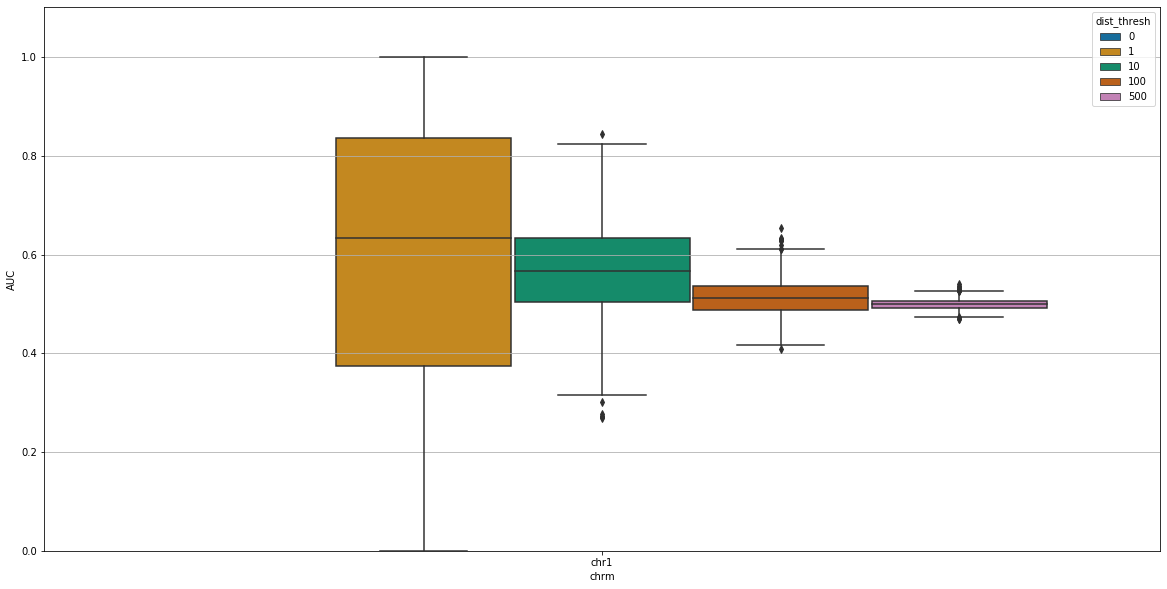

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


1 tn


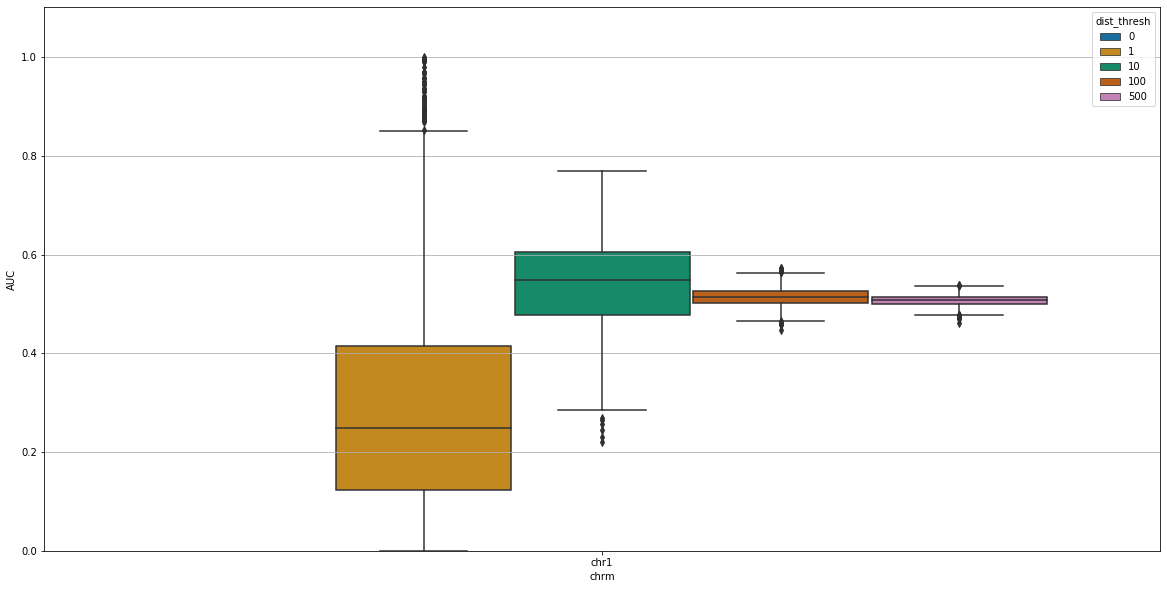

In [546]:
for resoultion in [1]:
    for case in ['tp', 'tn']:
        df_scores = calc_auc_hic(resoultion, case=case, dist_tp='hi-c-rao-common_elements', prediction='exp')
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='dist_thresh'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


1 tp


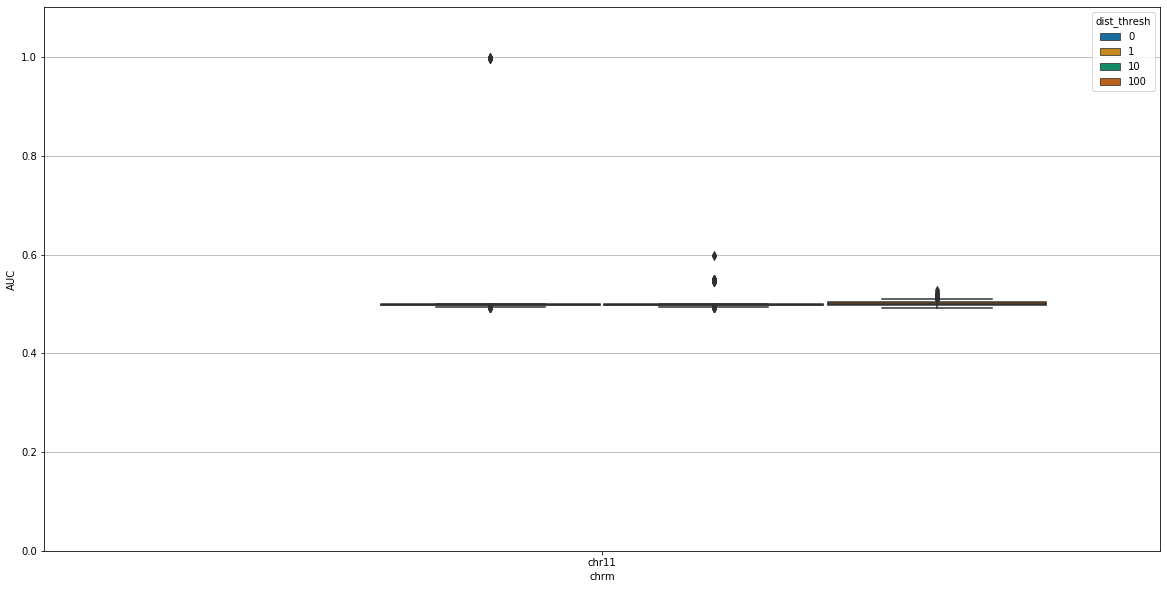

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


1 tn


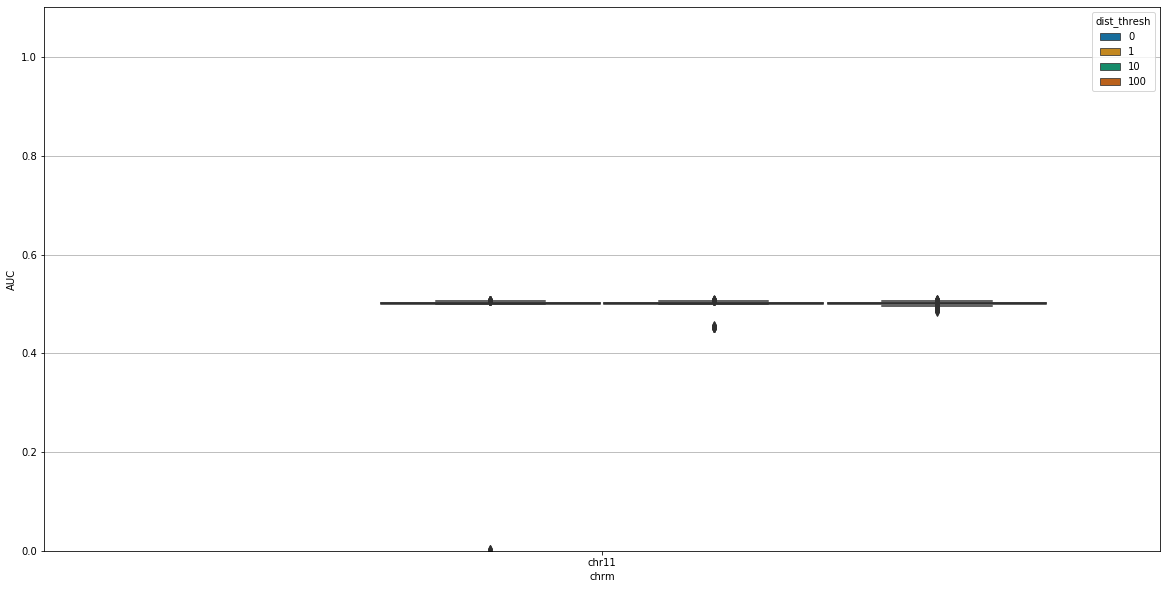

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


10 tp


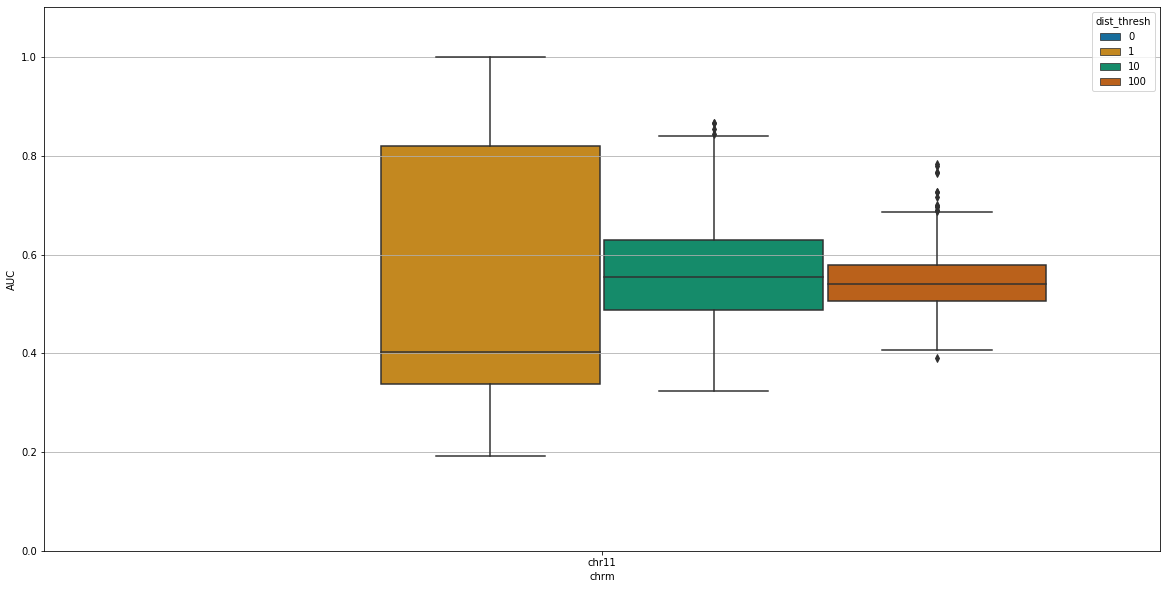

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


10 tn


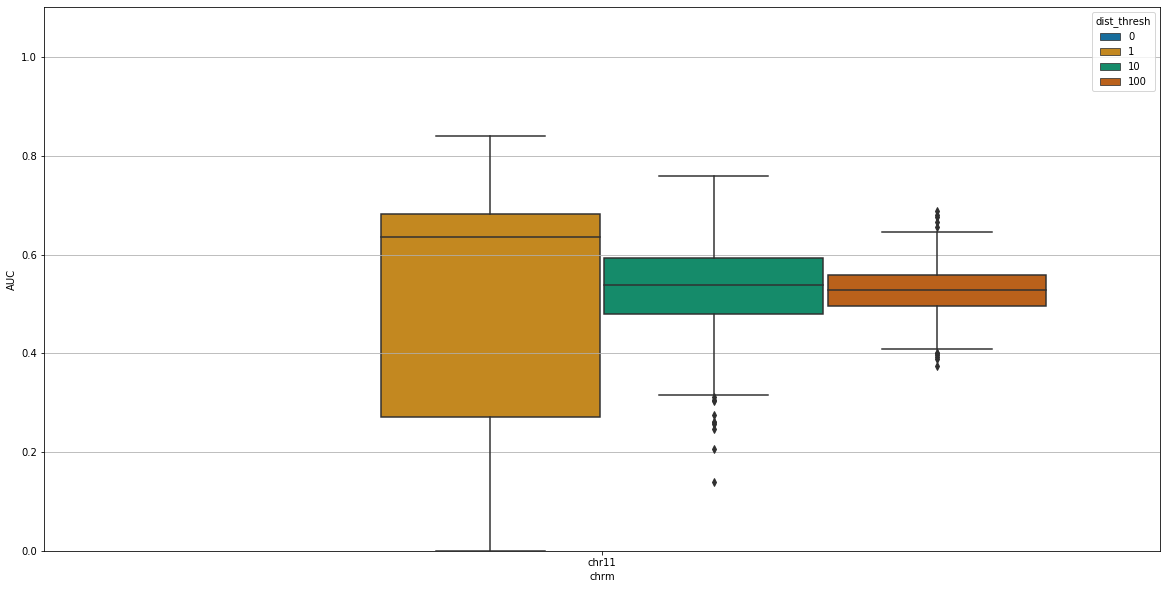

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


100 tp


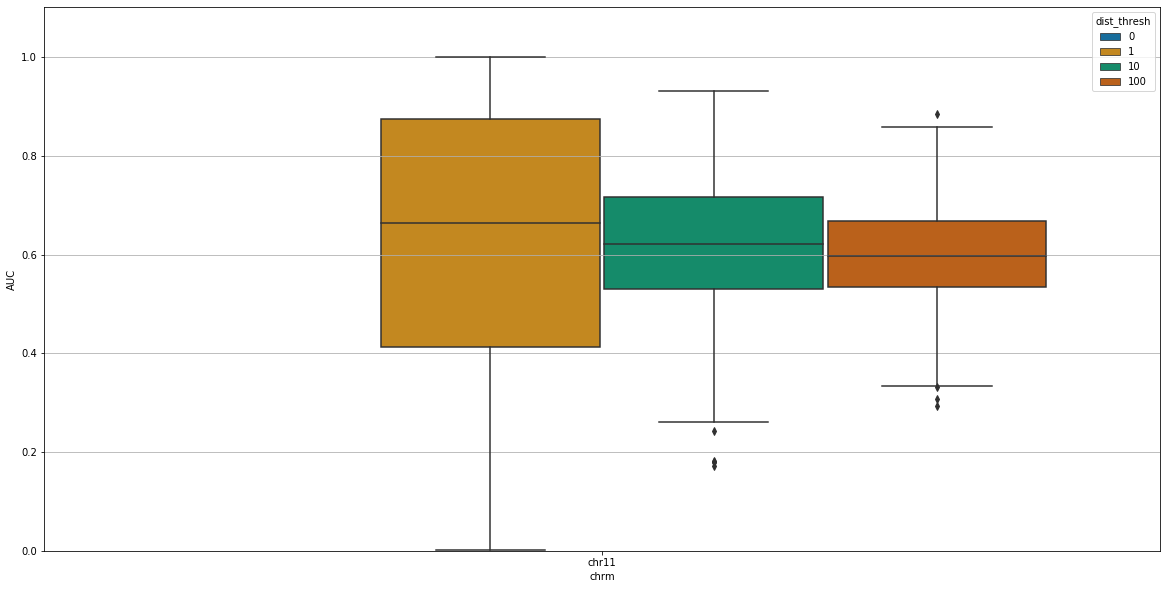

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


100 tn


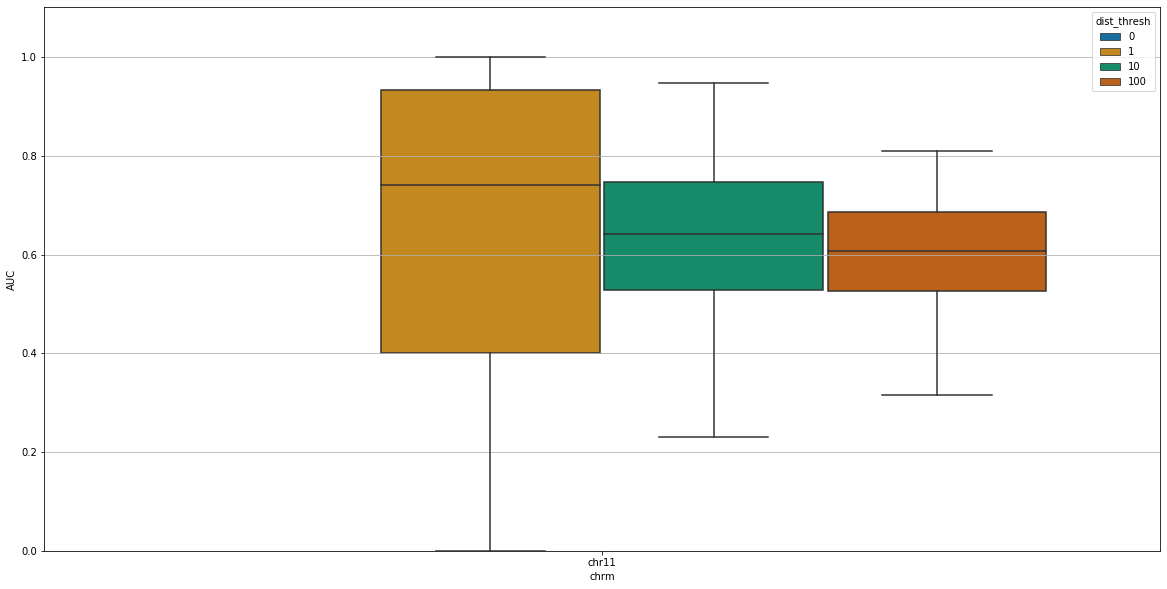

In [282]:
for resoultion in [1,10,100]:
    for case in ['tp', 'tn']:
        df_scores = calc_auc_hic(resoultion, case=case, dist_tp='exp', prediction='hi-c-rao')
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='dist_thresh'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


1 simple


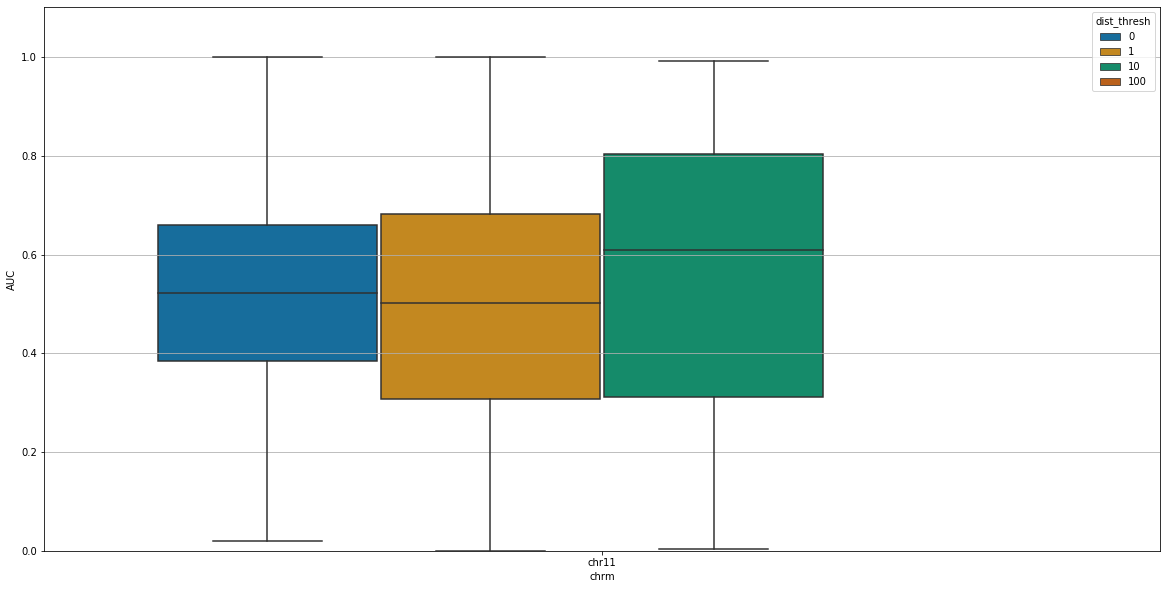

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


1 tp


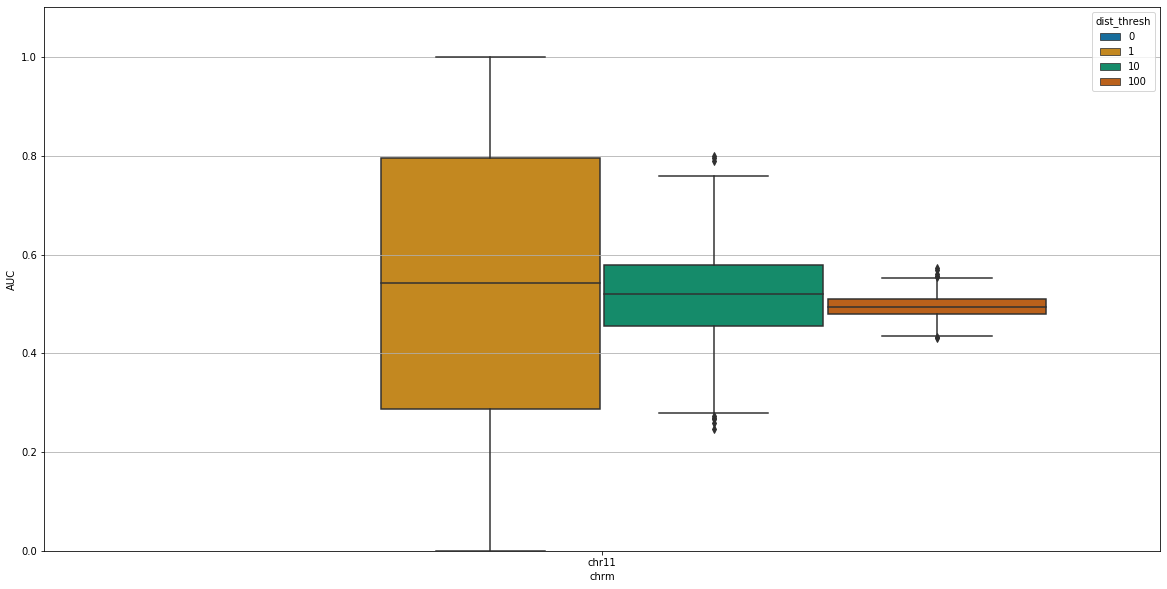

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


1 tn


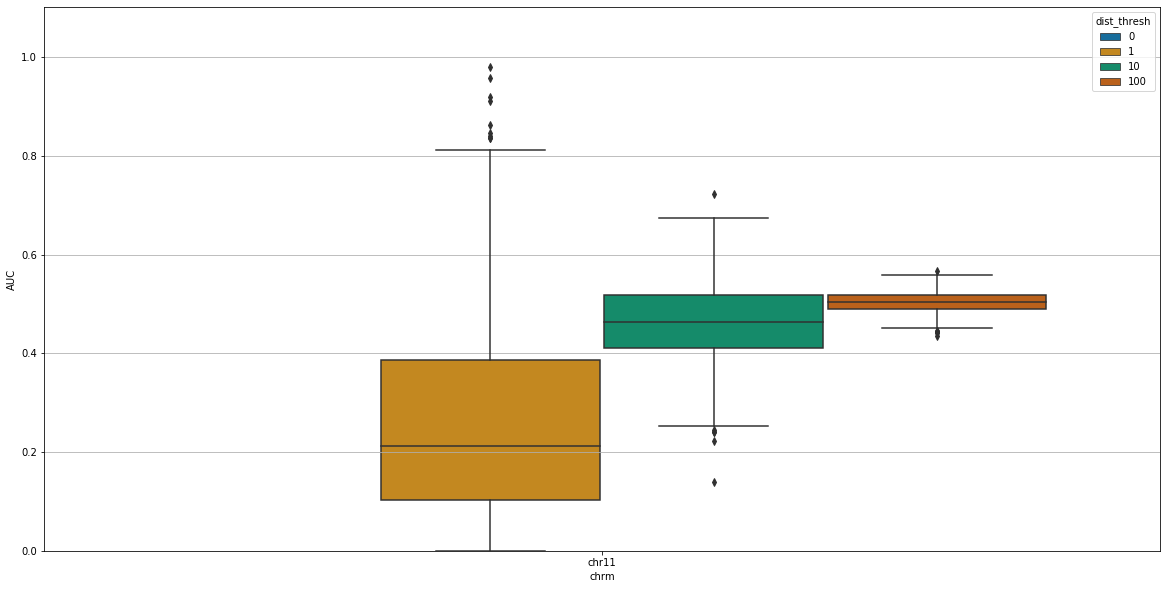

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


10 simple


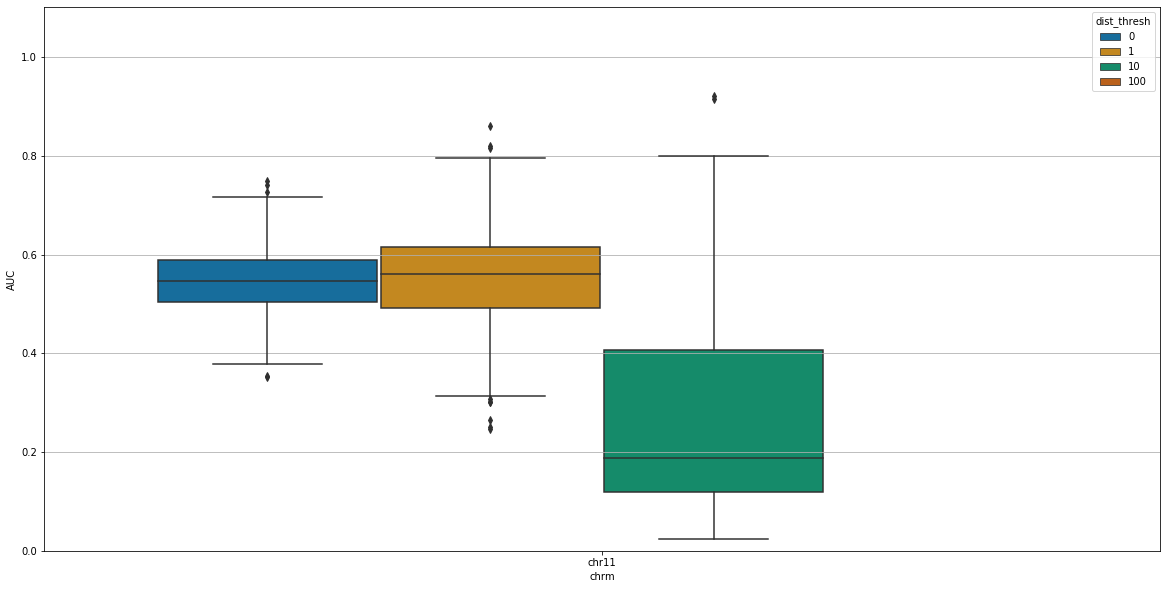

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


10 tp


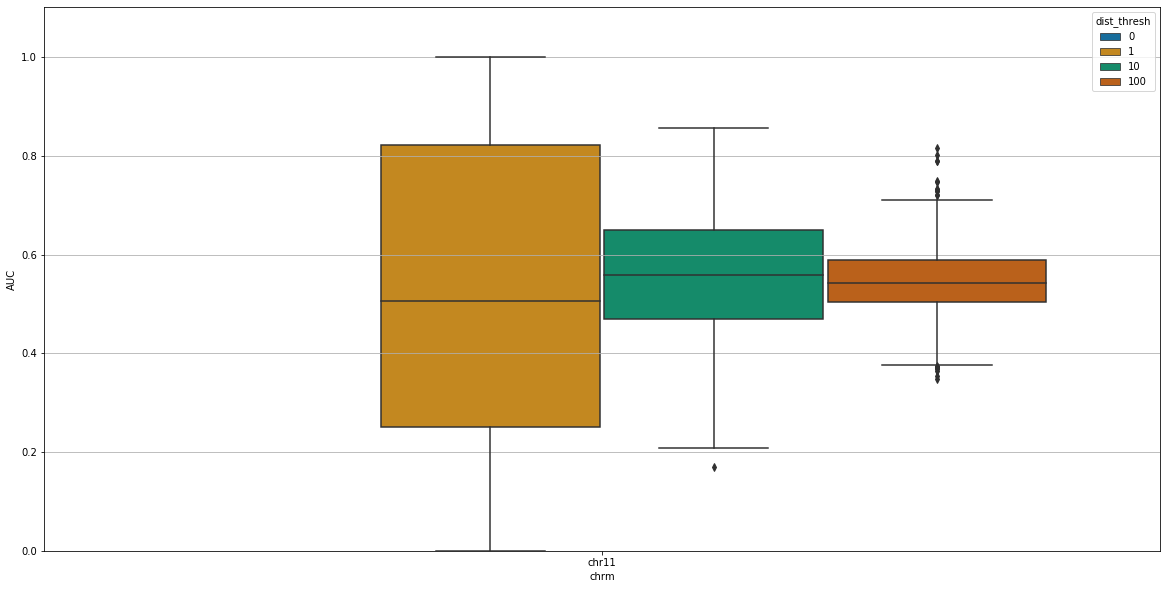

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


10 tn


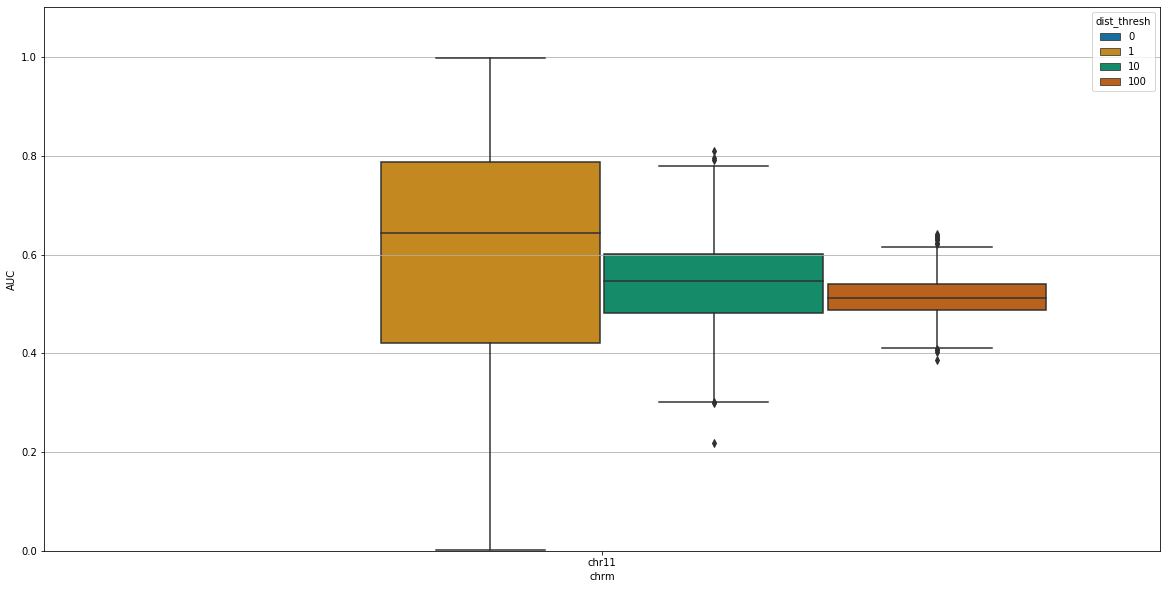

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


100 simple


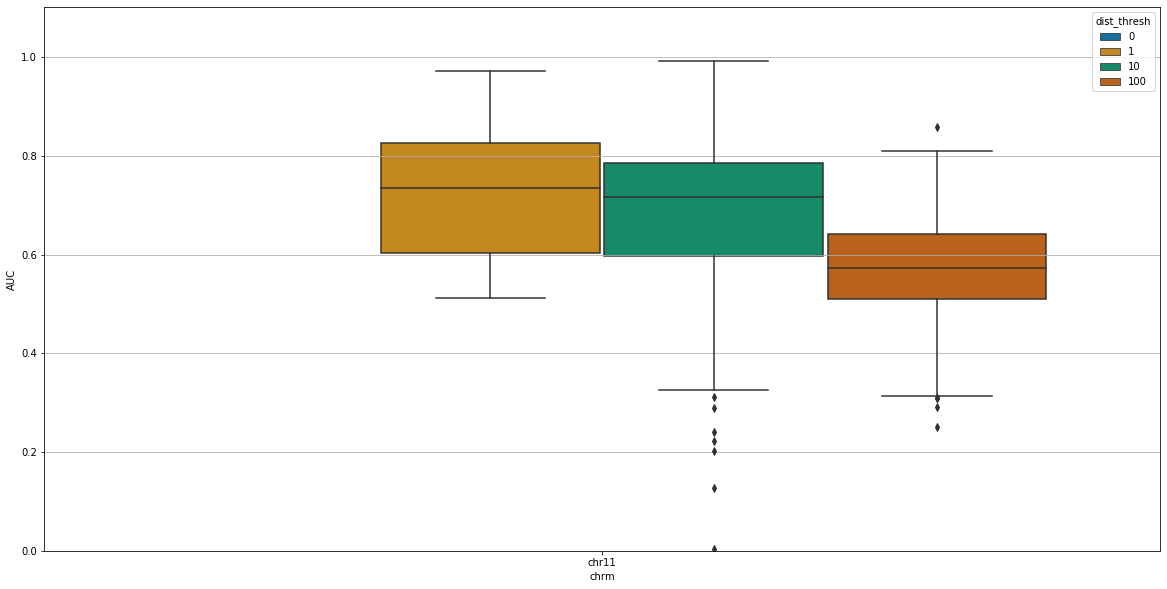

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


100 tp


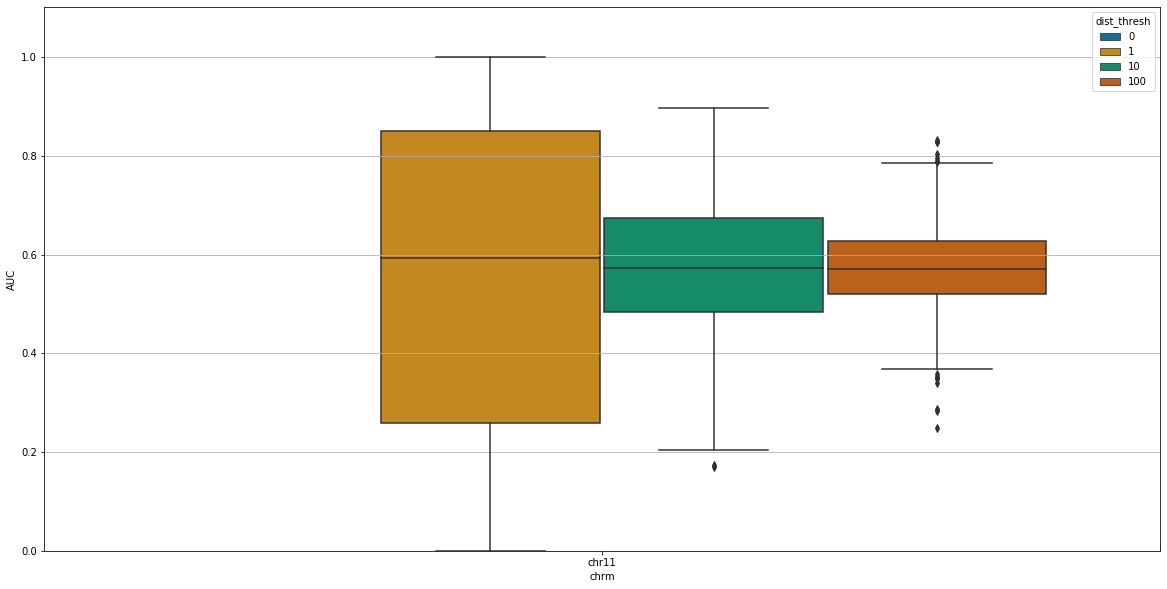

/home/lohia/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2446: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['chrm', 'plot', 'pr_curve', 'Gene stable ID'], dtype='object')]

  encoding=encoding,


100 tn


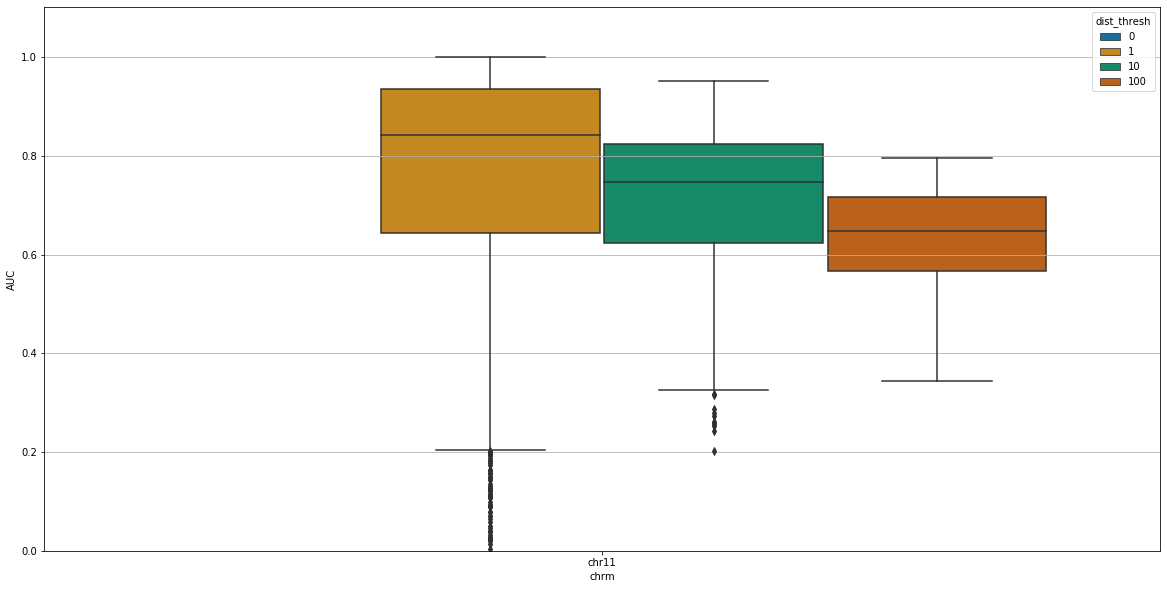

In [284]:
for resoultion in [1,10,100]:
    for case in ['simple', 'tp', 'tn']:
        df_scores = calc_auc_hic(resoultion, case=case, dist_tp='hi-c-rao', prediction='exp')
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='dist_thresh'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

In [271]:
df_scores = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_%s_%s_%s.h5' %(10, 'tp', 'exp'))

In [279]:
df_scores

In [595]:
df_scores[df_scores['dist_thresh'] == 4000]['auc'].isnull().astype(int).sum()

803

In [616]:
df_scores = df_scores[df_scores['dist_thresh'] <= 100]
df_scores = df_scores[df_scores['dist_thresh'] != 89]
df_scores = df_scores.rename(columns={"dist_thresh": "#of TP"})

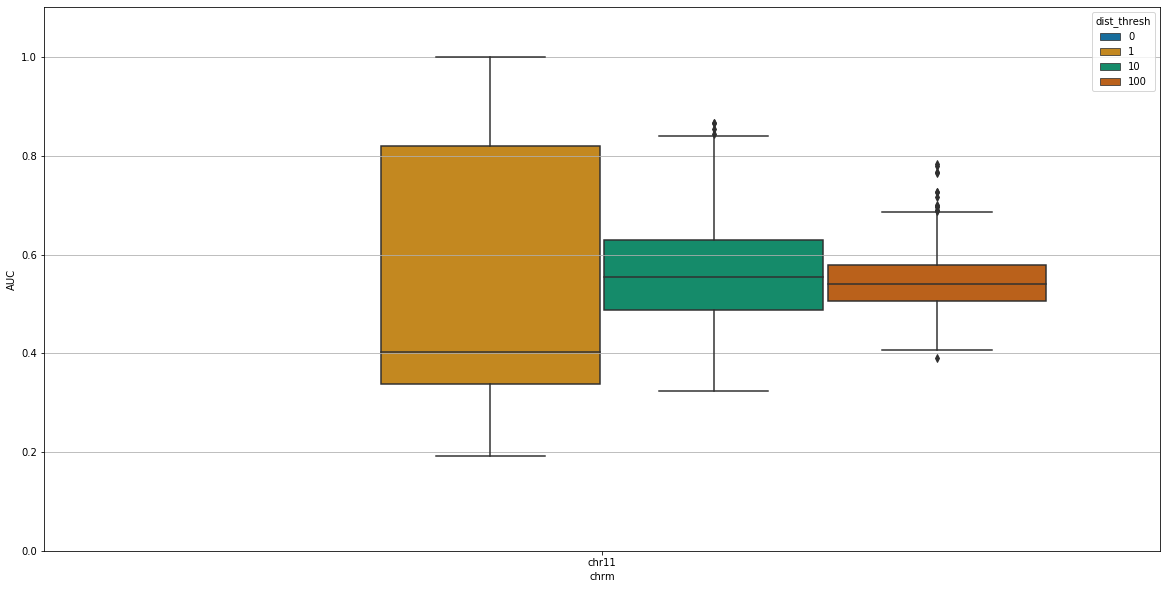

In [272]:
#100 contacts
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind"
                 ,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

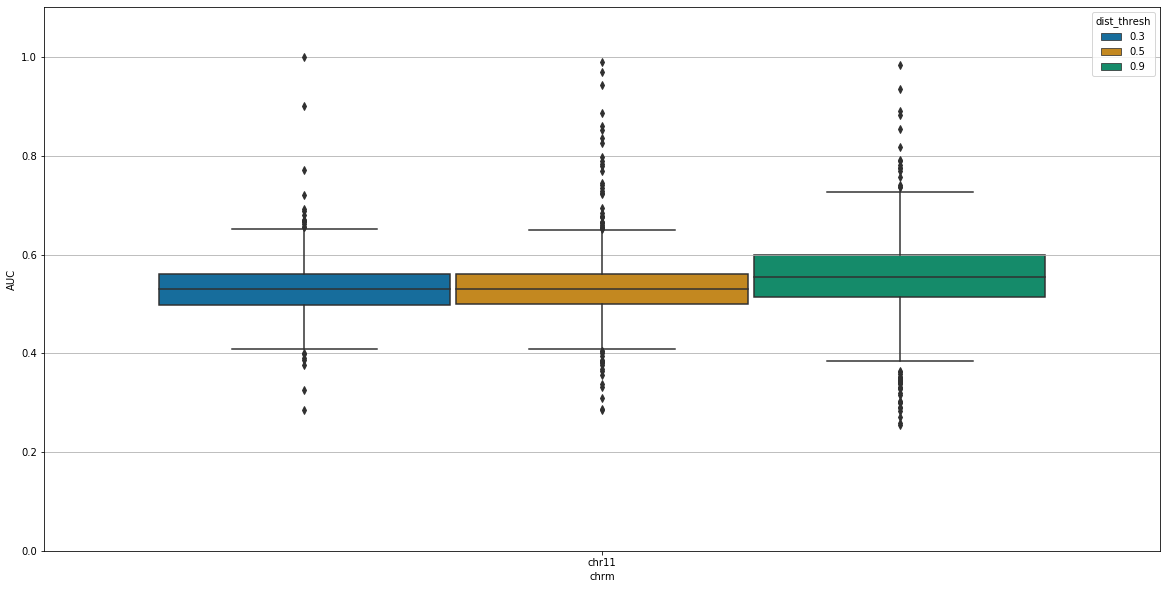

In [238]:
#10 contacts
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind"
                 ,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

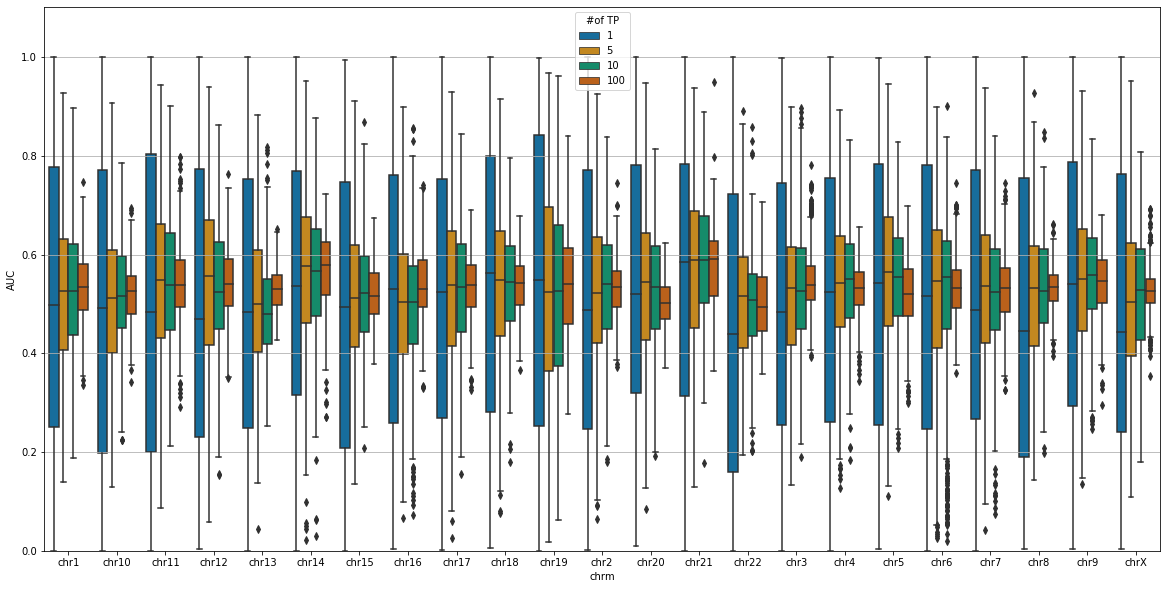

In [618]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind"
                 ,hue='#of TP'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

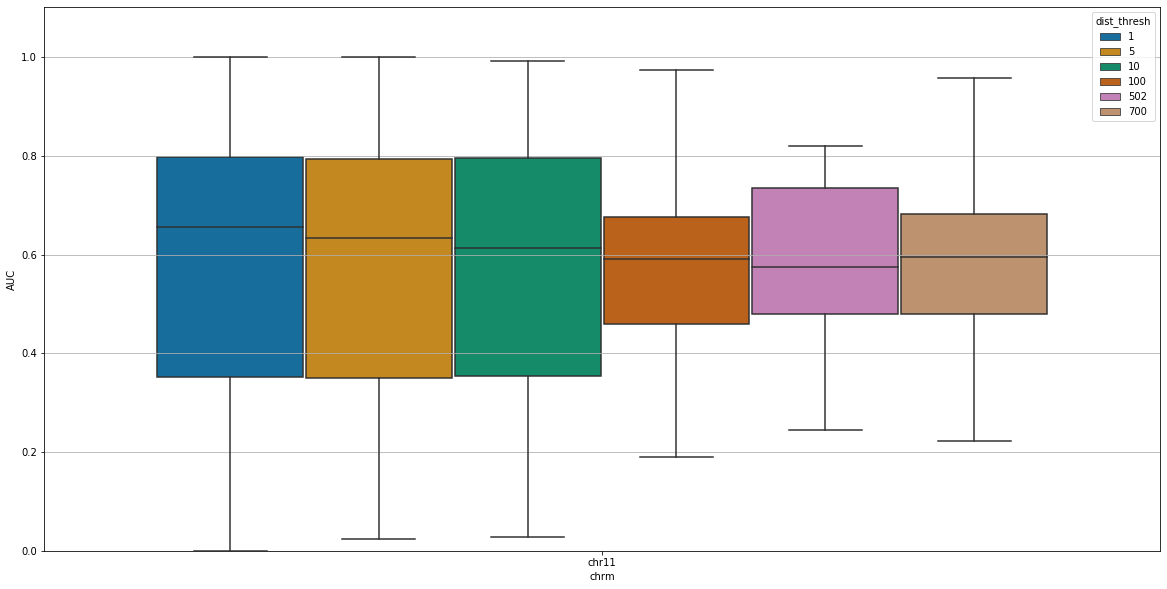

In [602]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind"
                 ,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

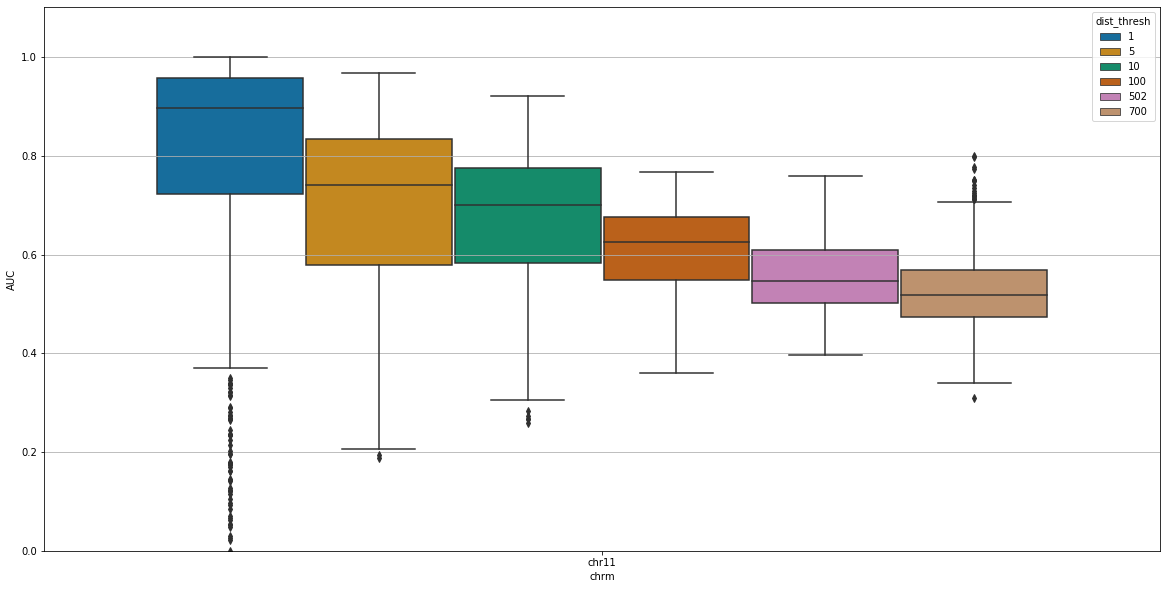

In [414]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind"
                 ,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind"
                 ,hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()

In [149]:
df_scores_plot = pd.concat([df_scores.drop(['plot'], axis=1), df_scores['plot'].apply(pd.Series)], axis=1)
df_plot = df_scores_plot.groupby(['chrm']).median()

In [143]:
df_scores['plot']

0       {0.0: 0.15891472868217105, 0.1: 0.358914728682...
1       {0.0: 0.19172932330827042, 0.1: 0.479591836734...
2       {0.0: 0.027435610302351626, 0.1: 0.14389697648...
3       {0.0: 0.03850267379679142, 0.1: 0.107486631016...
4       {0.0: 0.3575498575498566, 0.1: 0.7236467236467...
                              ...                        
999     {0.0: 0.0858757062146893, 0.1: 0.3598870056497...
1000    {0.0: 0.09021739130434761, 0.1: 0.192391304347...
1001    {0.0: 0.03621346886912323, 0.1: 0.156289707750...
1002    {0.0: 0.09125188536953226, 0.1: 0.208898944193...
1003    {0.0: 0.06352459016393448, 0.1: 0.174863387978...
Name: plot, Length: 1004, dtype: object

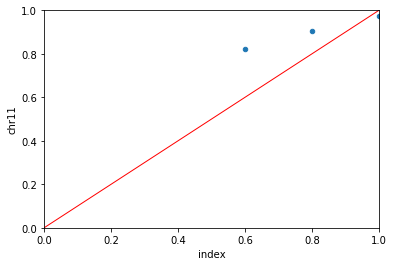

In [150]:
for thresh in df_plot.index.tolist():
    axes = df_plot.T.reset_index()[11::].plot.scatter(x='index', y=thresh)
    #axes = zt.reset_index().plot.scatter(x='x_p', y=0, s=1)
    #axes.plot([0, 1], [0, 1], 'red', linewidth=1)
    #axes = df_plot.T.reset_index().plot(x='index', y=0.3)
    axes.plot([0, 1], [0, 1], 'red', linewidth=1)
    #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
    #axes.set_title('Predicting structure similarity from expression')
    #axes.yaxis.grid(True)
    #axes.set_xlabel('Co-expression')
    #axes.set_ylabel('AUC')
    #axes.set_ylim([0.0,1.101])
    #plt.setp(bp['fliers'], markersize=3.0)
    #0.5
    #fig, axes = plt.subplots()
    #axes.scatter(x, y)
    #axes.plot(x, y)
    axes.set_ylim([0,1])
    axes.set_xlim([0,1])

    #plt.show()
    plt.show()

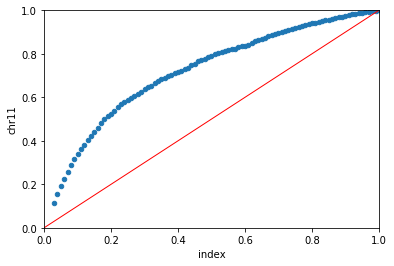

In [258]:
for thresh in df_plot.index.tolist():
    axes = df_plot.T.reset_index()[11::].plot.scatter(x='index', y=thresh)
    #axes = zt.reset_index().plot.scatter(x='x_p', y=0, s=1)
    #axes.plot([0, 1], [0, 1], 'red', linewidth=1)
    #axes = df_plot.T.reset_index().plot(x='index', y=0.3)
    axes.plot([0, 1], [0, 1], 'red', linewidth=1)
    #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
    #axes.set_title('Predicting structure similarity from expression')
    #axes.yaxis.grid(True)
    #axes.set_xlabel('Co-expression')
    #axes.set_ylabel('AUC')
    #axes.set_ylim([0.0,1.101])
    #plt.setp(bp['fliers'], markersize=3.0)
    #0.5
    #fig, axes = plt.subplots()
    #axes.scatter(x, y)
    #axes.plot(x, y)
    axes.set_ylim([0,1])
    axes.set_xlim([0,1])

    #plt.show()
    plt.show()

In [154]:
df_scores_plot

chrm  num_pairs  dist_thresh       auc  \
0     chr11       1004          2.0  0.603357   
1     chr11       1004          1.0  0.950000   
2     chr11       1004          1.0  0.990826   
3     chr11       1004          2.0  0.964930   
4     chr11       1004          5.0  0.937400   
...     ...        ...          ...       ...   
999   chr11       1004          2.0  0.074297   
1000  chr11       1004          6.0  0.426445   
1001  chr11       1004          6.0  0.650485   
1002  chr11       1004          6.0  0.793478   
1003  chr11       1004          6.0  0.855932   

                                               pr_curve  true_pos  true_neg  \
0     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       566         2   
1     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       480         1   
2     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       436         1   
3     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       499         2   
4     {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       623         2   
...                                                 ...       ...       ...   
999   {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       498         1   
1000  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       571         2   
1001  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       618         1   
1002  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       552         3   
1003  {0.0: 1.0, 0.01: 1.0, 0.02: 1.0, 0.03: 1.0, 0....       472         1   

      exp_median  exp_mean   exp_var  ... 0.82  0.83  0.85  0.86  0.88  0.89  \
0       0.818331  0.709948  0.077252  ...  NaN   NaN   NaN   NaN   NaN   NaN   
1       0.711796  0.638367  0.072380  ...  NaN   NaN   NaN   NaN   NaN   NaN   
2       0.680995  0.613632  0.075320  ...  NaN   NaN   NaN   NaN   NaN   NaN   
3       0.690213  0.630627  0.070869  ...  NaN   NaN   NaN   NaN   NaN   NaN   
4       0.712888  0.625489  0.079132  ...  NaN   NaN   NaN   NaN   NaN   NaN   
...          ...       ...       ...  ...  ...   ...   ...   ...   ...   ...   
999     0.061497  0.109356  0.028743  ...  NaN   NaN   NaN   NaN   NaN   NaN   
1000    0.264574  0.274264  0.040111  ...  NaN   NaN   NaN   NaN   NaN   NaN   
1001    0.480949  0.495839  0.064536  ...  NaN   NaN   NaN   NaN   NaN   NaN   
1002    0.684659  0.632675  0.075314  ...  NaN   NaN   NaN   NaN   NaN   NaN   
1003    0.745523  0.660855  0.078882  ...  NaN   NaN   NaN   NaN   NaN   NaN   

      0.9  0.91  0.92       1.0  
0     NaN   NaN   NaN  0.863074  
1     NaN   NaN   NaN  0.975000  
2     NaN   NaN   NaN  0.995413  
3     NaN   NaN   NaN  0.994990  
4     NaN   NaN   NaN  0.981541  
...   ...   ...   ...       ...  
999   NaN   NaN   NaN  0.537149  
1000  NaN   NaN   NaN  0.834501  
1001  NaN   NaN   NaN  0.825243  
1002  NaN   NaN   NaN  0.987319  
1003  NaN   NaN   NaN  0.927966  

[1004 rows x 66 columns]

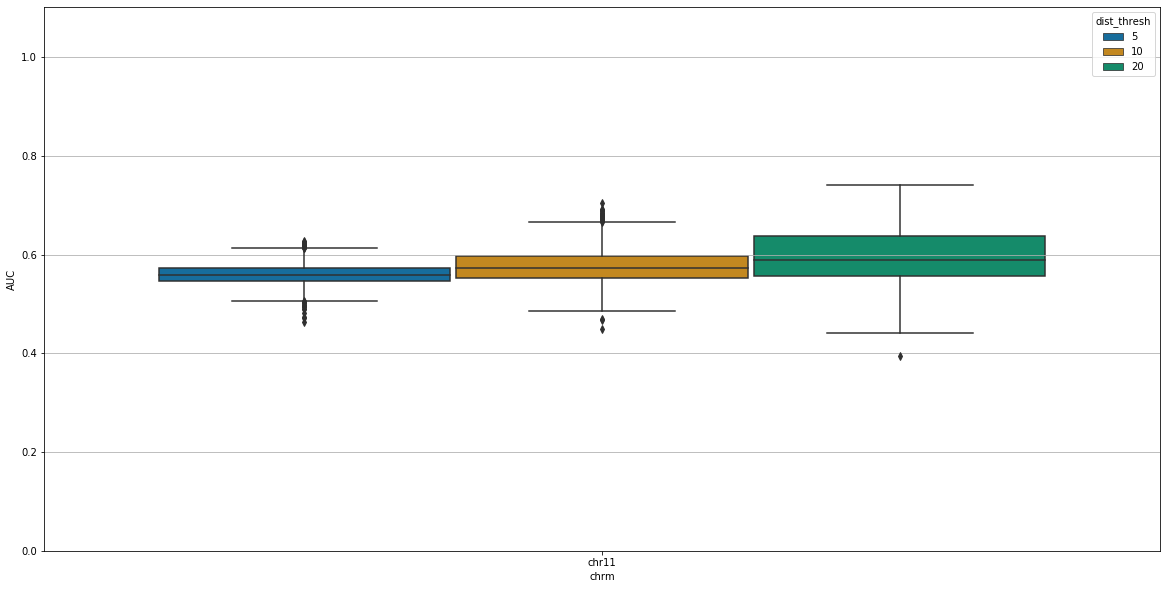

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
#grouped = df_scores.groupby(['threshold'])

#bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
#bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
sns.boxplot(y='auc', x='chrm', 
                 data=df_scores, 
                 palette="colorblind",
                 hue='dist_thresh'
           )
#bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
#axes.set_title('Predicting structure similarity from expression')
axes.yaxis.grid(True)
#axes.set_xlabel('Co-expression')
axes.set_ylabel('AUC')
axes.set_ylim([0.0,1.101])
#plt.setp(bp['fliers'], markersize=3.0)

plt.show()